# **1. Import libraries and functions**


In [1]:
# import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from importlib import reload

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.cm as cm


## **Mount Google Drive**



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
schools = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MIS710/Assignment 2/LA4PSchools.csv")
print(schools)
print('Sample size:', schools.shape[0])
print('Number of columns:', schools.shape[1])

       StudentID  Gender  Year_02  Kinder_Age              Disability  \
0     SN35433053    Male     2020         5.5  Disability_Non-disable   
1     SN71277215  Female     2018         5.8  Disability_Non-disable   
2     SN40883127    Male     2021         5.9  Disability_Non-disable   
3     SN93063777    Male     2021         5.7  Disability_Non-disable   
4     SN84195329    Male     2021         5.8  Disability_Non-disable   
...          ...     ...      ...         ...                     ...   
1995  SN72182891  Female     2016         4.9    Disability_Cognitive   
1996  SN69853705  Female     2021         4.6  Disability_Non-disable   
1997  SN64915269    Male     2016         5.7  Disability_Non-disable   
1998  SN70943748  Female     2021         5.4  Disability_Non-disable   
1999  SN70826435    Male     2017         5.6    Disability_Cognitive   

      NCCD-Funded  01.SES  02.SES  NumSibling  SiblingOrder  ...  \
0               0     104     104           3          

# **2. Data Preparation, Exploration and Visualisation**



## **2.1. Inspect Data**

In [4]:
print(schools.info())
print(schools.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   StudentID                       2000 non-null   object 
 1   Gender                          2000 non-null   object 
 2   Year_02                         2000 non-null   int64  
 3   Kinder_Age                      2000 non-null   float64
 4   Disability                      2000 non-null   object 
 5   NCCD-Funded                     2000 non-null   int64  
 6   01.SES                          2000 non-null   int64  
 7   02.SES                          2000 non-null   int64  
 8   NumSibling                      2000 non-null   int64  
 9   SiblingOrder                    2000 non-null   int64  
 10  NumAbvYear9                     2000 non-null   int64  
 11  NumAbvDiploma                   2000 non-null   int64  
 12  NumProf                         20

In [5]:
print(schools.isnull().sum())

StudentID                         0
Gender                            0
Year_02                           0
Kinder_Age                        0
Disability                        0
NCCD-Funded                       0
01.SES                            0
02.SES                            0
NumSibling                        0
SiblingOrder                      0
NumAbvYear9                       0
NumAbvDiploma                     0
NumProf                           0
Burt-01-SOY                       0
Burt-01-EOY                       0
Clay-01-SOY                       0
Clay-01-EOY                       0
TextLevel-01-SOY                  0
TextLevel-01-MOY                  0
TextLevel-01-EOY                  0
TextLevel-02-SOY                  0
TextLevel-02-MOY                  0
TextLevel-02-EOY                  0
WritingVocab-01-SOY               0
HRSIW-01-SOY                      0
Counting-01                       0
Counting-02                       0
Place Value-01              

In [6]:
# Drop the 'StudentID' column from the 'schools' DataFrame
schools = schools.drop(columns=['StudentID'])

# Alternatively, if you want to drop it in place without creating a new DataFrame
# schools.drop(columns=['StudentID'], inplace=True)

# Check the result to confirm the column is dropped
print(schools.head())  # Display the first few rows of the modified DataFrame

   Gender  Year_02  Kinder_Age              Disability  NCCD-Funded  01.SES  \
0    Male     2020         5.5  Disability_Non-disable            0     104   
1  Female     2018         5.8  Disability_Non-disable            0     112   
2    Male     2021         5.9  Disability_Non-disable            0     120   
3    Male     2021         5.7  Disability_Non-disable            0      95   
4    Male     2021         5.8  Disability_Non-disable            0      98   

   02.SES  NumSibling  SiblingOrder  NumAbvYear9  ...  HRSIW-01-SOY  \
0     104           3             3            2  ...            49   
1     112           2             2            2  ...            37   
2     109           2             2            2  ...            30   
3      93           2             1            0  ...            30   
4      98           1             1            2  ...            32   

   Counting-01  Counting-02  Place Value-01  Place Value-02  \
0            4            5        

## **2.2. Univariate Analysis**


In [7]:
#descriptive stats for numerical variables
schools.describe()

Year_02   Kinder_Age  NCCD-Funded     01.SES       02.SES  \
count  2000.000000  2000.000000  2000.000000  2000.0000  2000.000000   
mean   2018.640000     5.276400     0.089000   102.9415   102.117500   
std       1.664568     0.348129     0.284815     9.3859     9.150167   
min    2016.000000     4.500000     0.000000    78.0000    78.000000   
25%    2017.000000     5.000000     0.000000    95.0000    95.000000   
50%    2018.000000     5.300000     0.000000   101.0000   101.000000   
75%    2020.000000     5.500000     0.000000   113.0000   109.000000   
max    2021.000000     6.500000     1.000000   120.0000   120.000000   

        NumSibling  SiblingOrder  NumAbvYear9  NumAbvDiploma      NumProf  \
count  2000.000000   2000.000000  2000.000000    2000.000000  2000.000000   
mean      2.356500      1.748500     1.564000       0.886500     0.766500   
std       0.993932      0.865229     0.725374       0.837836     0.811977   
min       1.000000      1.000000     0.000000       0.000000     0.000000   
25%       2.000000      1.000000     1.000000       0.000000     0.000000   
50%       2.000000      2.000000     2.000000       1.000000     1.000000   
75%       3.000000      2.000000     2.000000       2.000000     1.000000   
max       7.000000      6.000000     3.000000       2.000000     2.000000   

       ...  WritingVocab-01-SOY  HRSIW-01-SOY  Counting-01  Counting-02  \
count  ...          2000.000000   2000.000000  2000.000000  2000.000000   
mean   ...            22.018500     30.508000     1.758000     2.850500   
std    ...            12.679098     10.020686     0.935881     1.072719   
min    ...             0.000000     -3.000000     0.000000     0.000000   
25%    ...            13.000000     25.000000     1.000000     2.000000   
50%    ...            20.000000     32.000000     2.000000     3.000000   
75%    ...            29.000000     37.000000     2.000000     4.000000   
max    ...            95.000000     58.000000     5.000000     6.000000   

       Place Value-01  Place Value-02  Addition and Subtraction-01  \
count     2000.000000     2000.000000                  2000.000000   
mean         1.028500        1.681500                     1.290500   
std          0.529932        0.639736                     0.935172   
min          0.000000        0.000000                     0.000000   
25%          1.000000        1.000000                     1.000000   
50%          1.000000        2.000000                     1.000000   
75%          1.000000        2.000000                     2.000000   
max          4.000000        5.000000                     5.000000   

       Addition and Subtraction-02  Multiplication and Division-01  \
count                  2000.000000                     2000.000000   
mean                      2.257500                        1.075500   
std                       1.155795                        0.837944   
min                       0.000000                        0.000000   
25%                       2.000000                        0.000000   
50%                       2.000000                        1.000000   
75%                       3.000000                        2.000000   
max                       6.000000                        4.000000   

       Multiplication and Division-02  
count                     2000.000000  
mean                         1.797500  
std                          0.771875  
min                          0.000000  
25%                          2.000000  
50%                          2.000000  
75%                          2.000000  
max                          5.000000  

[8 rows x 30 columns]

In [8]:
columns_of_interest = [
    'Burt-01-SOY', 'Burt-01-EOY',
    'Clay-01-SOY', 'Clay-01-EOY',
    'TextLevel-01-SOY', 'TextLevel-01-MOY', 'TextLevel-01-EOY',
    'TextLevel-02-SOY', 'TextLevel-02-MOY', 'TextLevel-02-EOY'
]

# Generate descriptive statistics for the selected variables
descriptive_stats = schools[columns_of_interest].describe().round(2)

# Display the descriptive statistics
print(descriptive_stats)

       Burt-01-SOY  Burt-01-EOY  Clay-01-SOY  Clay-01-EOY  TextLevel-01-SOY  \
count      2000.00      2000.00      2000.00      2000.00            2000.0   
mean         21.38        36.57         2.14         5.31              10.7   
std          11.18        12.26         3.83         6.83               6.1   
min           0.00         0.00        -4.00        -6.00              -4.0   
25%          14.00        29.00         0.00         0.00               6.0   
50%          21.00        33.00         0.00         2.00              10.0   
75%          28.00        43.00         3.00        13.00              14.0   
max          77.00       101.00        17.00        20.00              34.0   

       TextLevel-01-MOY  TextLevel-01-EOY  TextLevel-02-SOY  TextLevel-02-MOY  \
count           2000.00           2000.00           2000.00           2000.00   
mean              15.00             21.13             21.79             24.07   
std                5.49              4.58    

In [9]:
#set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#summarise categorical columns as well
data_types =['object', 'float', 'int']
schools.describe(include=data_types)

Gender  Year_02  Kinder_Age              Disability  NCCD-Funded  \
count    2000 2000.000    2000.000                    2000     2000.000   
unique      2      NaN         NaN                       5          NaN   
top      Male      NaN         NaN  Disability_Non-disable          NaN   
freq     1018      NaN         NaN                    1381          NaN   
mean      NaN 2018.640       5.276                     NaN        0.089   
std       NaN    1.665       0.348                     NaN        0.285   
min       NaN 2016.000       4.500                     NaN        0.000   
25%       NaN 2017.000       5.000                     NaN        0.000   
50%       NaN 2018.000       5.300                     NaN        0.000   
75%       NaN 2020.000       5.500                     NaN        0.000   
max       NaN 2021.000       6.500                     NaN        1.000   

         01.SES   02.SES  NumSibling  SiblingOrder  NumAbvYear9  ...  \
count  2000.000 2000.000    2000.000      2000.000     2000.000  ...   
unique      NaN      NaN         NaN           NaN          NaN  ...   
top         NaN      NaN         NaN           NaN          NaN  ...   
freq        NaN      NaN         NaN           NaN          NaN  ...   
mean    102.942  102.118       2.357         1.748        1.564  ...   
std       9.386    9.150       0.994         0.865        0.725  ...   
min      78.000   78.000       1.000         1.000        0.000  ...   
25%      95.000   95.000       2.000         1.000        1.000  ...   
50%     101.000  101.000       2.000         2.000        2.000  ...   
75%     113.000  109.000       3.000         2.000        2.000  ...   
max     120.000  120.000       7.000         6.000        3.000  ...   

        WritingVocab-01-SOY  HRSIW-01-SOY  Counting-01  Counting-02  \
count              2000.000      2000.000     2000.000     2000.000   
unique                  NaN           NaN          NaN          NaN   
top                     NaN           NaN          NaN          NaN   
freq                    NaN           NaN          NaN          NaN   
mean                 22.018        30.508        1.758        2.850   
std                  12.679        10.021        0.936        1.073   
min                   0.000        -3.000        0.000        0.000   
25%                  13.000        25.000        1.000        2.000   
50%                  20.000        32.000        2.000        3.000   
75%                  29.000        37.000        2.000        4.000   
max                  95.000        58.000        5.000        6.000   

        Place Value-01  Place Value-02  Addition and Subtraction-01  \
count         2000.000        2000.000                     2000.000   
unique             NaN             NaN                          NaN   
top                NaN             NaN                          NaN   
freq               NaN             NaN                          NaN   
mean             1.028           1.681                        1.290   
std              0.530           0.640                        0.935   
min              0.000           0.000                        0.000   
25%              1.000           1.000                        1.000   
50%              1.000           2.000                        1.000   
75%              1.000           2.000                        2.000   
max              4.000           5.000                        5.000   

        Addition and Subtraction-02  Multiplication and Division-01  \
count                      2000.000                        2000.000   
unique                          NaN                             NaN   
top                             NaN                             NaN   
freq                            NaN                             NaN   
mean                          2.257                           1.075   
std                           1.156                           0.838   
min                           0.000   

In [10]:
mean_value = round(schools[schools['NumAbvYear9'] != 3]['NumAbvYear9'].mean())
schools.loc[schools['NumAbvYear9'] == 3, 'NumAbvYear9'] = mean_value

In [11]:
error_check = schools[schools['NumAbvYear9'] == 3]
if error_check.empty:
    print("The erroneous value has been fixed.")
else:
    print("There are still erroneous values in the dataset:", error_check)

The erroneous value has been fixed.


In [12]:
columns_to_fix = ['Clay-01-SOY', 'Clay-01-EOY', 'TextLevel-01-SOY']

# Replace negative values with 0
for column in columns_to_fix:
    schools.loc[schools[column] < 0, column] = 0

# Check the result
print(schools[columns_to_fix].head())

   Clay-01-SOY  Clay-01-EOY  TextLevel-01-SOY
0            0            0                16
1           12           13                 8
2            4           18                 8
3            0            0                11
4           10           13                 9


In [13]:
columns_of_interest = [
    'Burt-01-SOY', 'Burt-01-EOY',
    'Clay-01-SOY', 'Clay-01-EOY',
    'TextLevel-01-SOY', 'TextLevel-01-MOY', 'TextLevel-01-EOY',
    'TextLevel-02-SOY', 'TextLevel-02-MOY', 'TextLevel-02-EOY'
]

# Generate descriptive statistics for the selected variables
descriptive_stats = schools[columns_of_interest].describe().round(2)

# Display the descriptive statistics
print(descriptive_stats)

       Burt-01-SOY  Burt-01-EOY  Clay-01-SOY  Clay-01-EOY  TextLevel-01-SOY  \
count     2000.000     2000.000     2000.000     2000.000          2000.000   
mean        21.380       36.570        2.300        5.660            10.710   
std         11.180       12.260        3.700        6.470             6.080   
min          0.000        0.000        0.000        0.000             0.000   
25%         14.000       29.000        0.000        0.000             6.000   
50%         21.000       33.000        0.000        2.000            10.000   
75%         28.000       43.000        3.000       13.000            14.000   
max         77.000      101.000       17.000       20.000            34.000   

       TextLevel-01-MOY  TextLevel-01-EOY  TextLevel-02-SOY  TextLevel-02-MOY  \
count          2000.000          2000.000          2000.000          2000.000   
mean             15.000            21.130            21.790            24.070   
std               5.490             4.580    

Year3_Writing_At_Risk  False  True 
Year_02                            
2016                     165     57
2017                     206    173
2018                     316    179
2020                     459    150
2021                     188    107


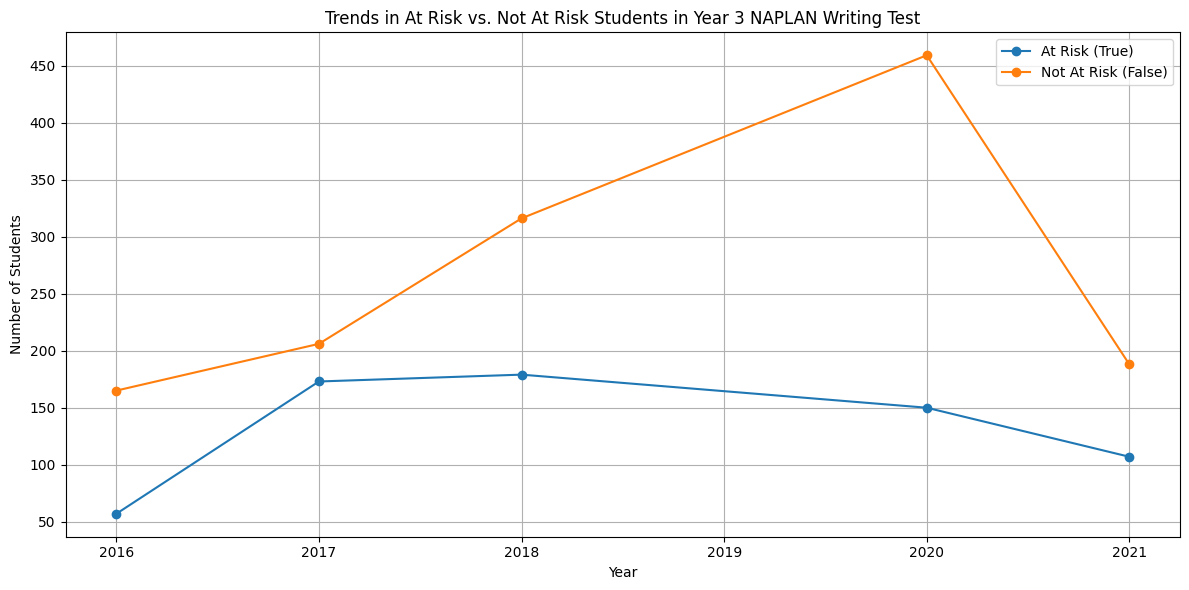

In [14]:
#investigating variable Year3_Writing_At_Risk

# Group by 'Year' and 'Year3_Writing_At_Risk' and count occurrences
counts = schools.groupby(['Year_02', 'Year3_Writing_At_Risk']).size().unstack(fill_value=0)
print(counts)

plt.figure(figsize=(12, 6))

# Plot counts for 'True' and 'False' values
plt.plot(counts.index, counts[True], label='At Risk (True)', marker='o')
plt.plot(counts.index, counts[False], label='Not At Risk (False)', marker='o')

plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.title('Trends in At Risk vs. Not At Risk Students in Year 3 NAPLAN Writing Test')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


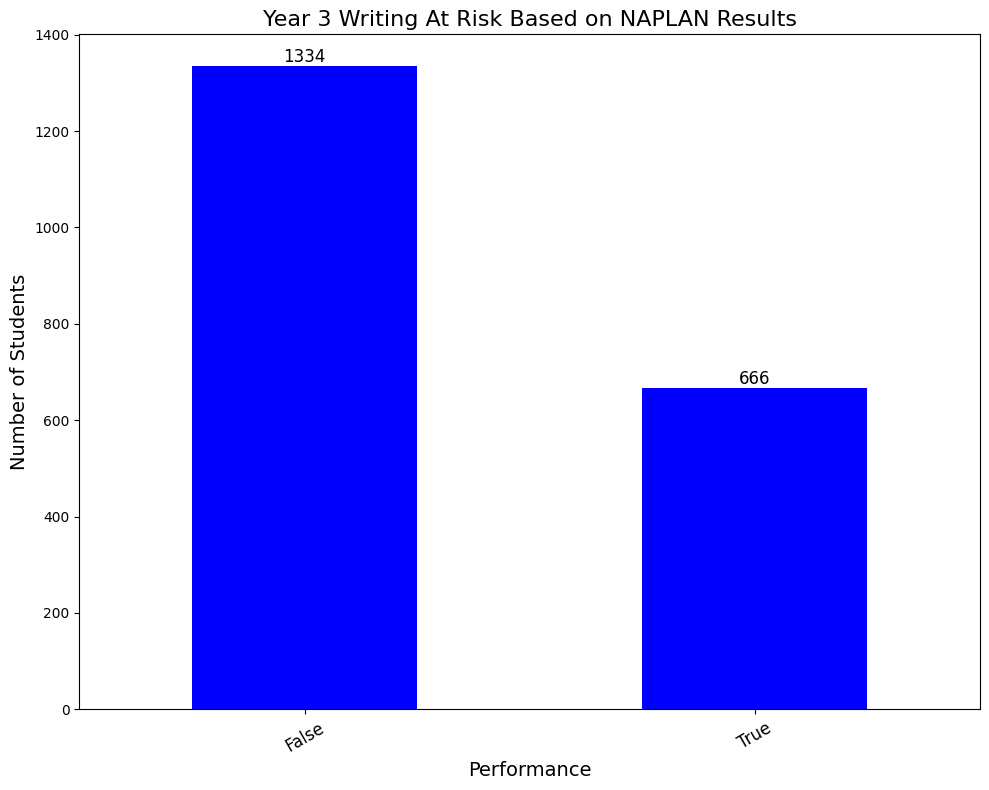

In [15]:
# Count the occurrences of each category in the 'Disability' variable
Year3_writing_counts = schools['Year3_Writing_At_Risk'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 8))
ax = Year3_writing_counts.plot(kind='bar', color='blue')

# Add title and labels
plt.title('Year 3 Writing At Risk Based on NAPLAN Results', fontsize=16)
plt.xlabel('Performance', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

# Rotate x-axis labels by 30 degrees
plt.xticks(rotation=30, fontsize=12)

# Add the actual counts on top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

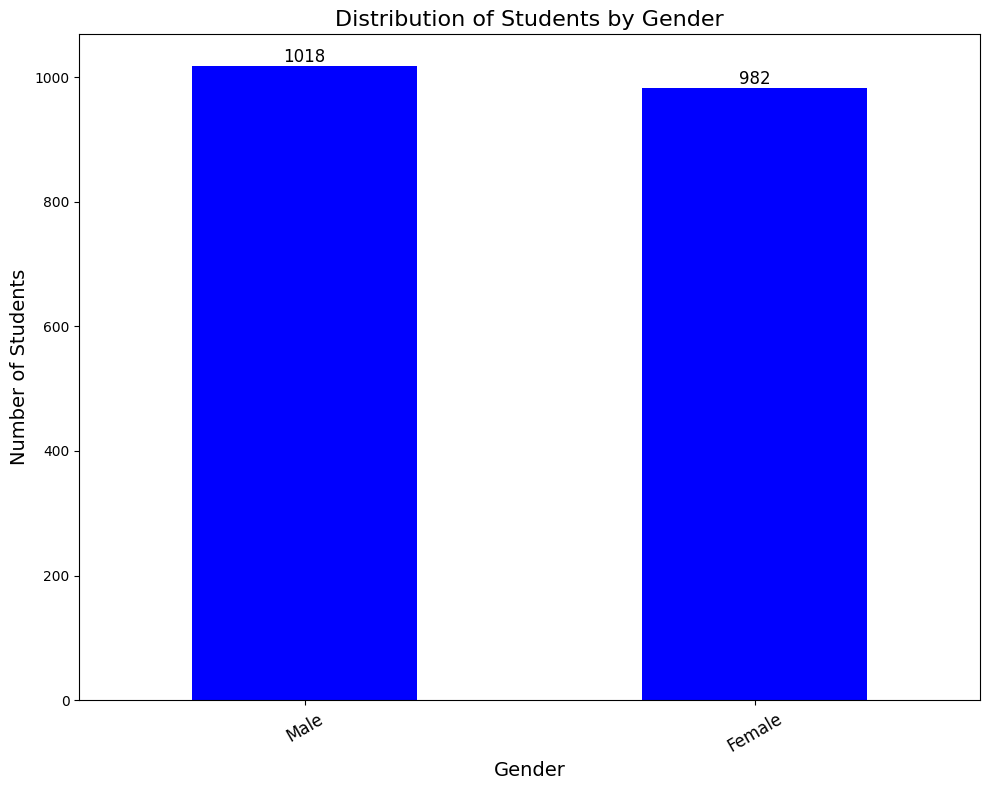

In [16]:
# Count the occurrences of each category in the 'Gender' variable
gender_counts = schools['Gender'].value_counts()

# Create a bar chart for Gender
plt.figure(figsize=(10, 8))
ax = gender_counts.plot(kind='bar', color='blue')

# Add title and labels
plt.title('Distribution of Students by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

# Rotate x-axis labels by 30 degrees
plt.xticks(rotation=30, fontsize=12)

# Add the actual counts on top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

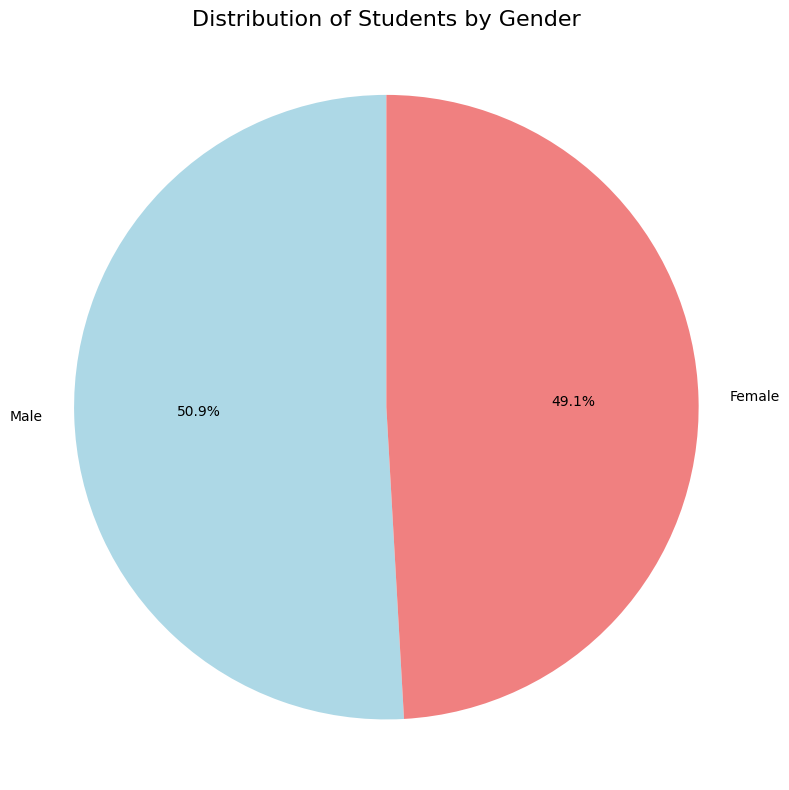

In [17]:
# Create a pie chart for Gender
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

# Add title
plt.title('Distribution of Students by Gender', fontsize=16)

# Ensure the pie chart is a circle
plt.axis('equal')

# Display the plot
plt.tight_layout()
plt.show()

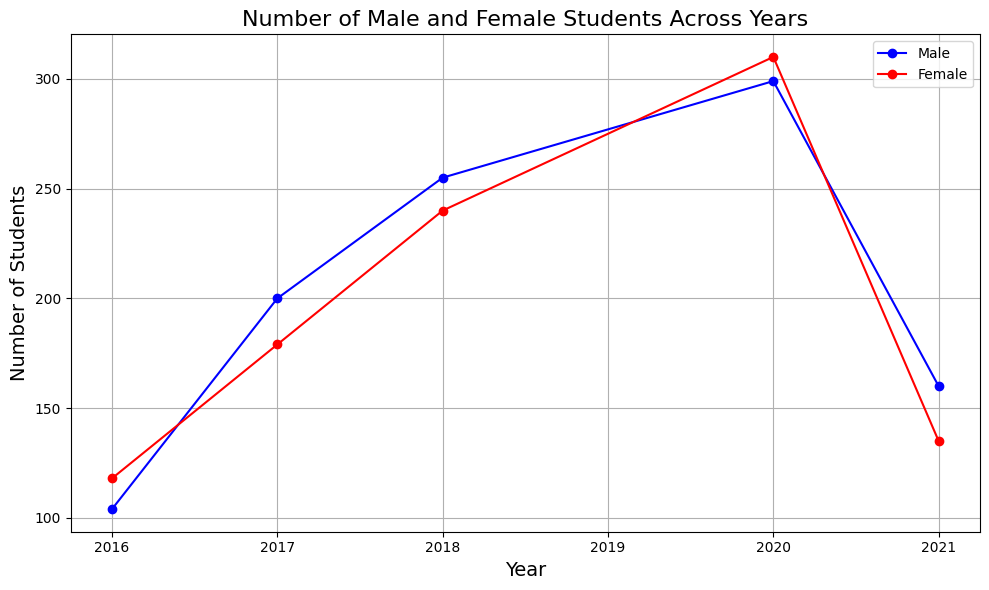

In [18]:
# Group the data by 'Year_02' and 'Gender', and count the occurrences
gender_year_counts = schools.groupby(['Year_02', 'Gender']).size().unstack()

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(gender_year_counts.index, gender_year_counts['Male'], label='Male', marker='o', color='blue')
plt.plot(gender_year_counts.index, gender_year_counts['Female'], label='Female', marker='o', color='red')

# Add title and labels
plt.title('Number of Male and Female Students Across Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

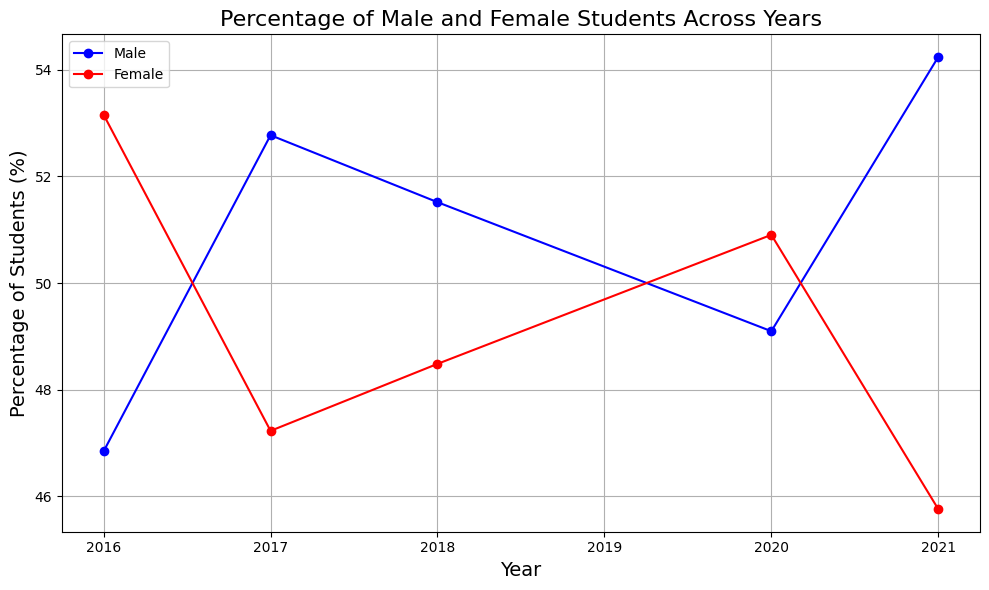

In [19]:
# Group the data by 'Year_02' and 'Gender', and count the occurrences
gender_year_counts = schools.groupby(['Year_02', 'Gender']).size().unstack()

# Calculate the percentage for each gender across the years
gender_year_percentage = gender_year_counts.div(gender_year_counts.sum(axis=1), axis=0) * 100

# Create the line chart for percentages
plt.figure(figsize=(10, 6))
plt.plot(gender_year_percentage.index, gender_year_percentage['Male'], label='Male', marker='o', color='blue')
plt.plot(gender_year_percentage.index, gender_year_percentage['Female'], label='Female', marker='o', color='red')

# Add title and labels
plt.title('Percentage of Male and Female Students Across Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Students (%)', fontsize=14)

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
# Group the data by 'Year_02' and 'Gender', and count the occurrences
gender_year_counts = schools.groupby(['Year_02', 'Gender']).size().unstack()

# Calculate the percentage for each gender across the years
gender_year_percentage = gender_year_counts.div(gender_year_counts.sum(axis=1), axis=0) * 100

# Create a new DataFrame that includes both the counts and percentages
gender_table = gender_year_counts.copy()

# Add the percentage columns to the table
gender_table['Male (%)'] = gender_year_percentage['Male'].round(2)
gender_table['Female (%)'] = gender_year_percentage['Female'].round(2)

# Print the table
print(gender_table)

Gender   Female  Male  Male (%)  Female (%)
Year_02                                    
2016        118   104    46.850      53.150
2017        179   200    52.770      47.230
2018        240   255    51.520      48.480
2020        310   299    49.100      50.900
2021        135   160    54.240      45.760


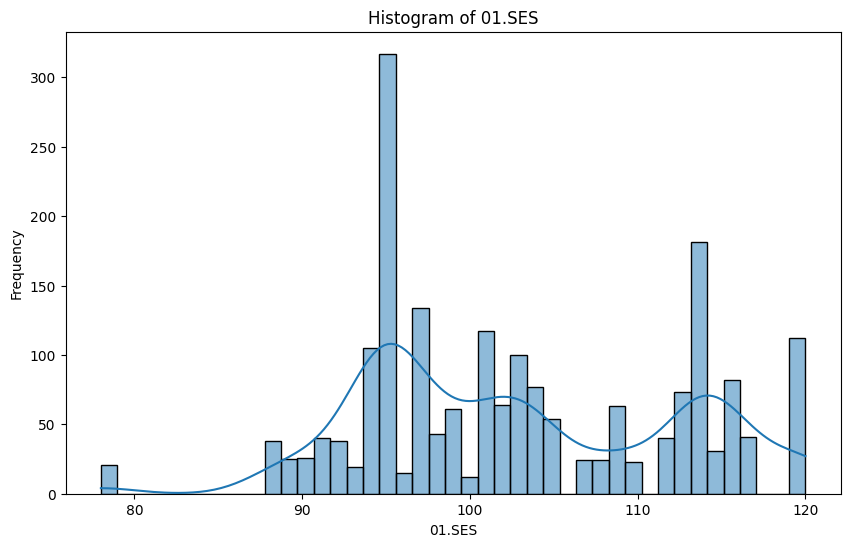

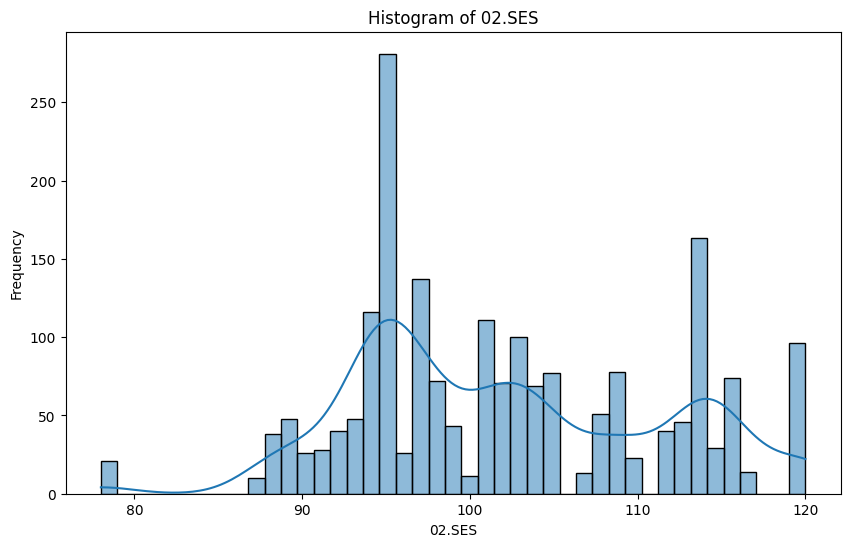

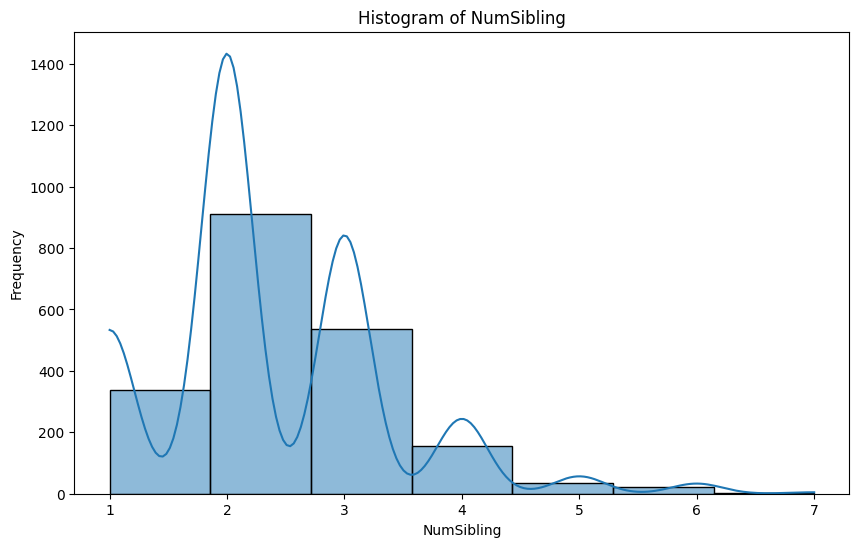

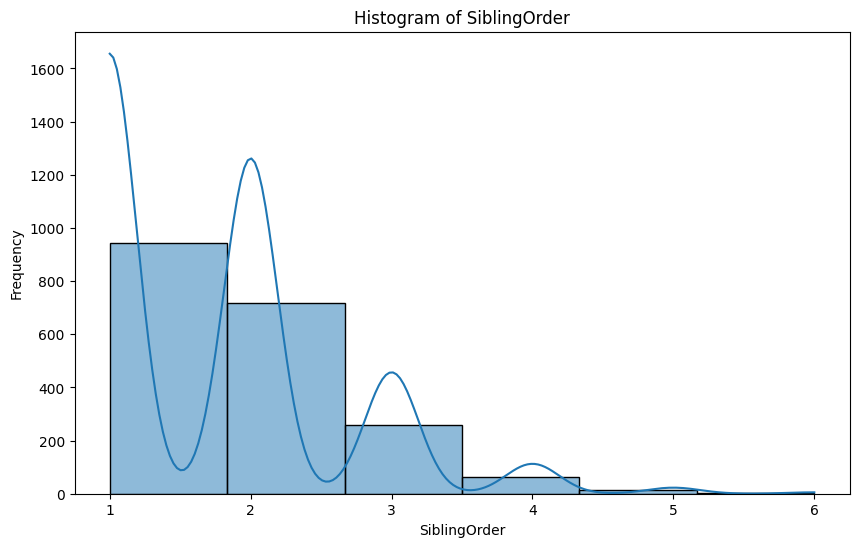

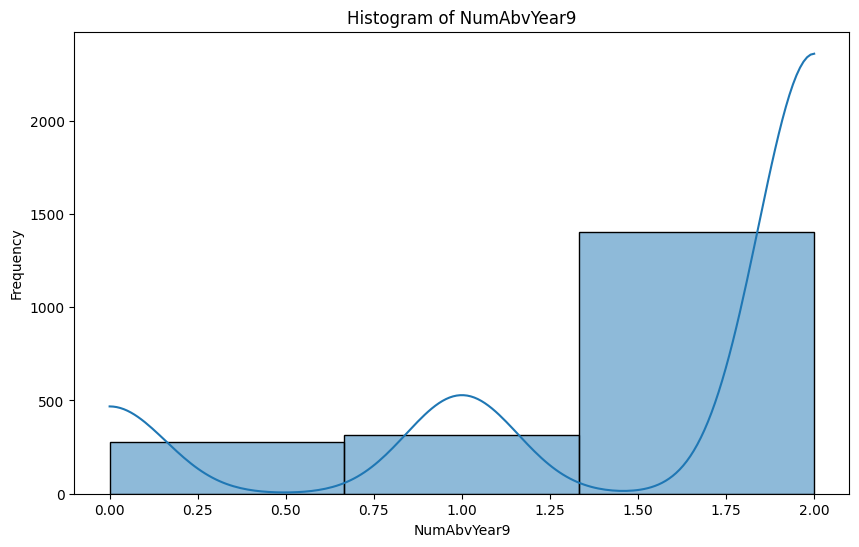

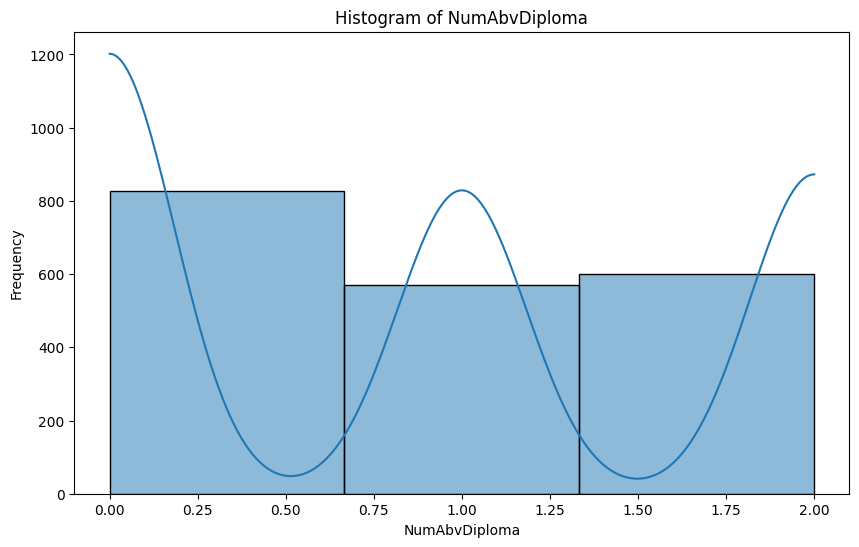

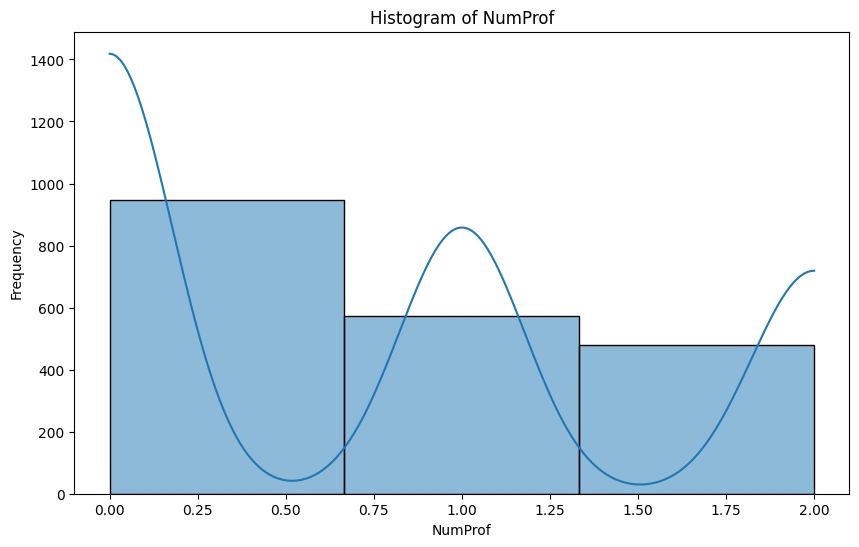

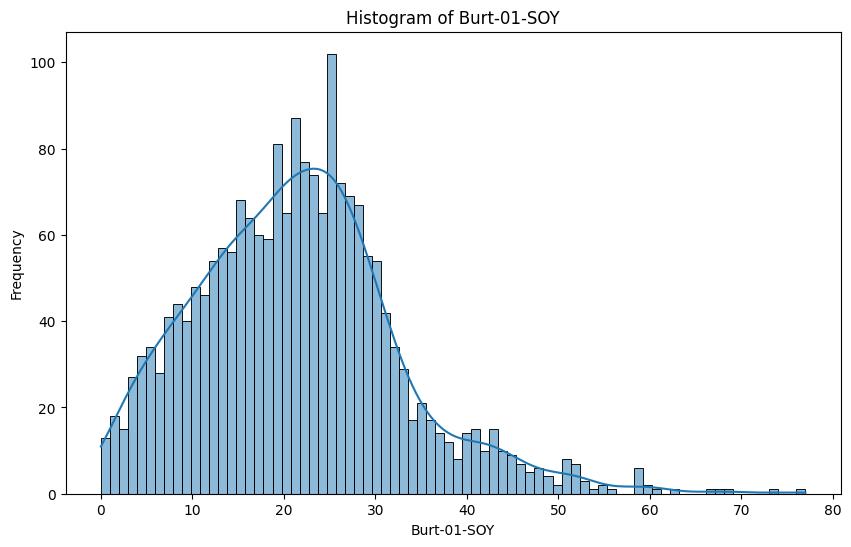

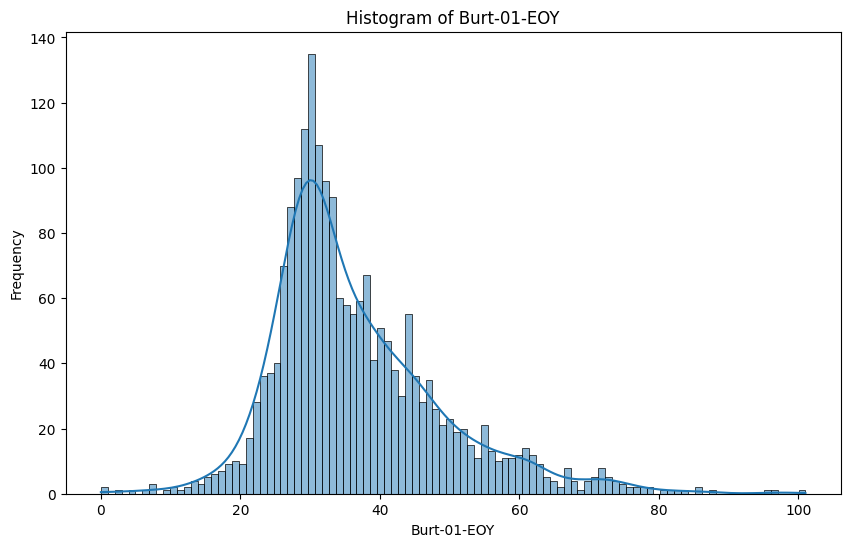

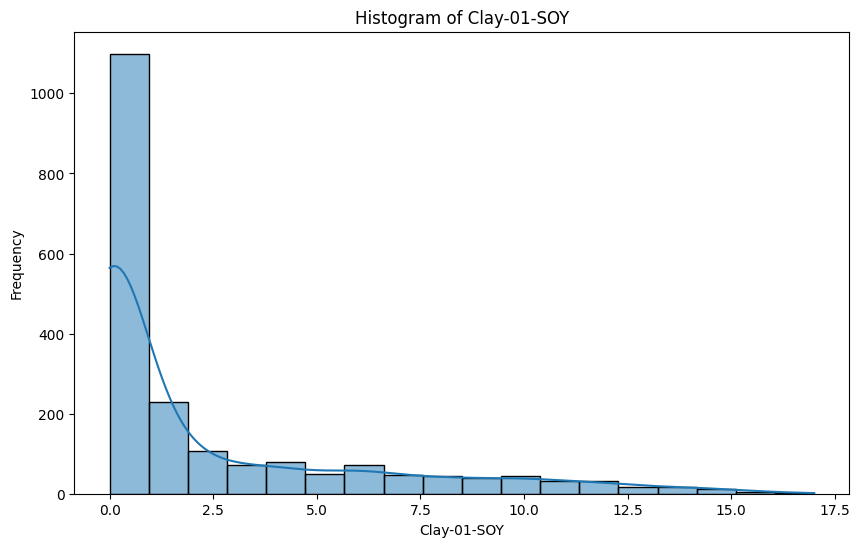

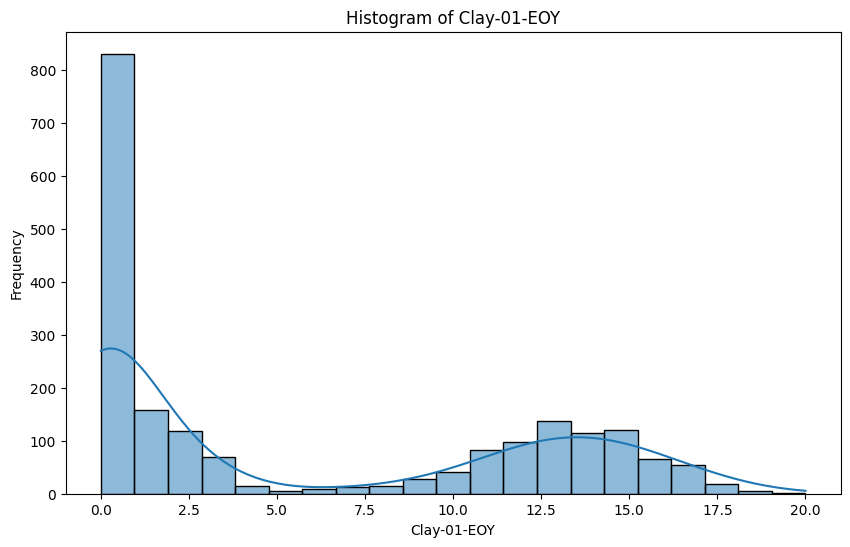

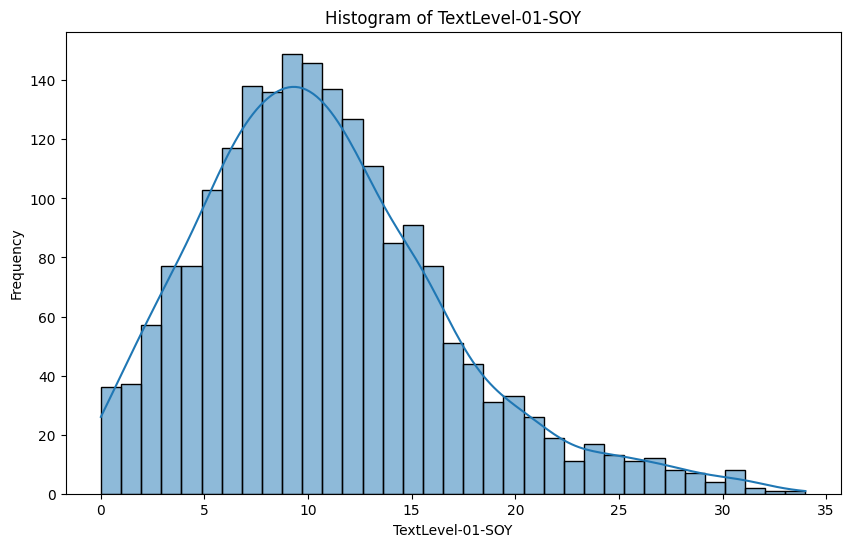

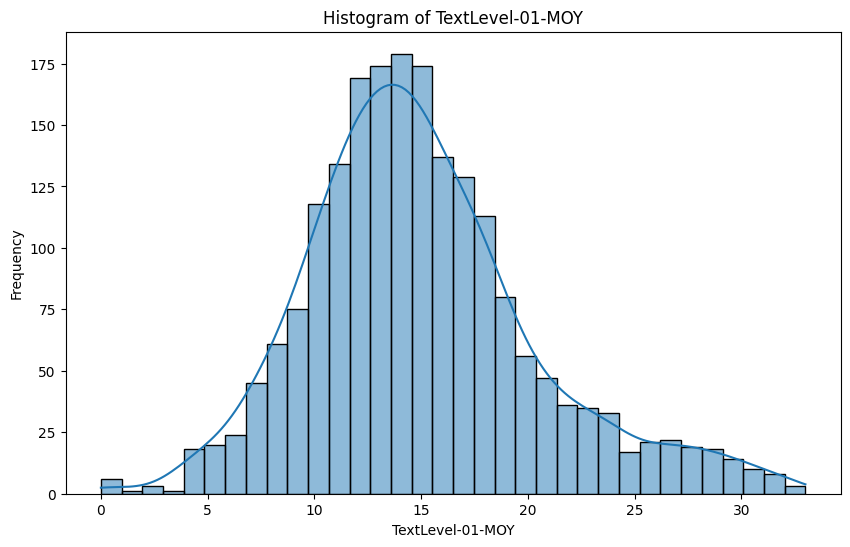

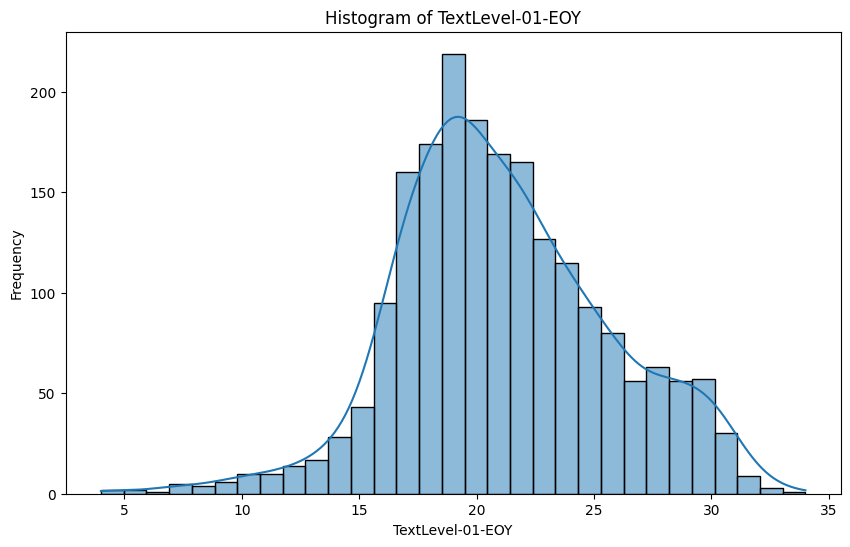

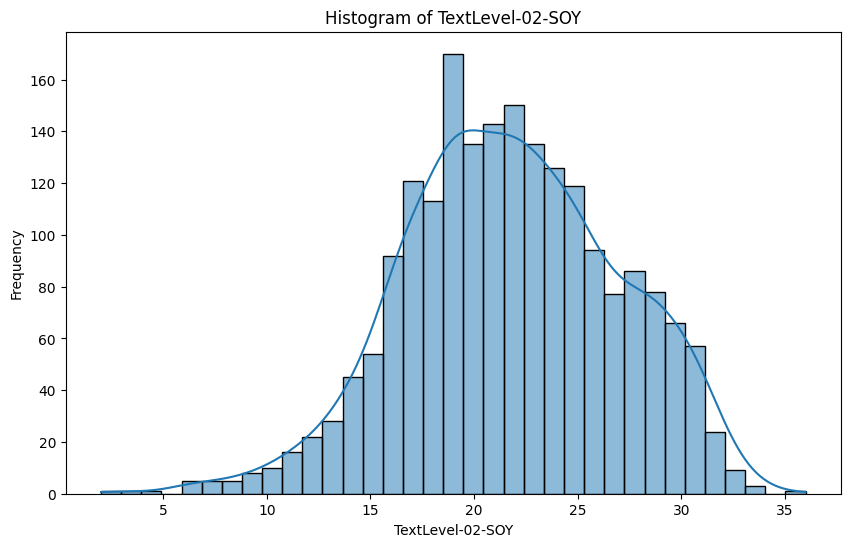

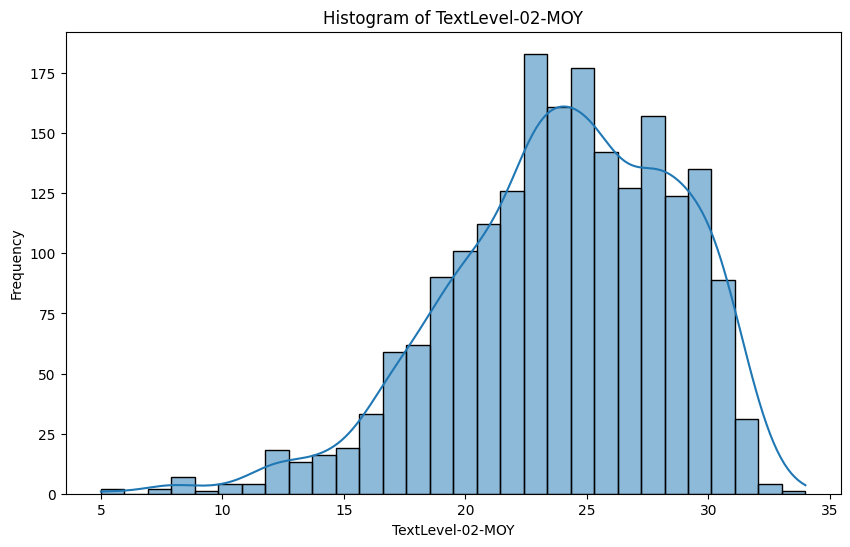

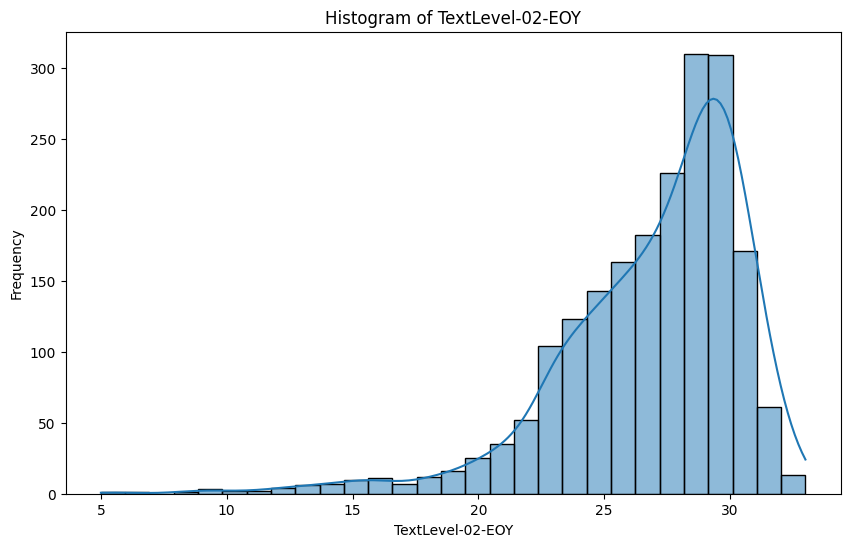

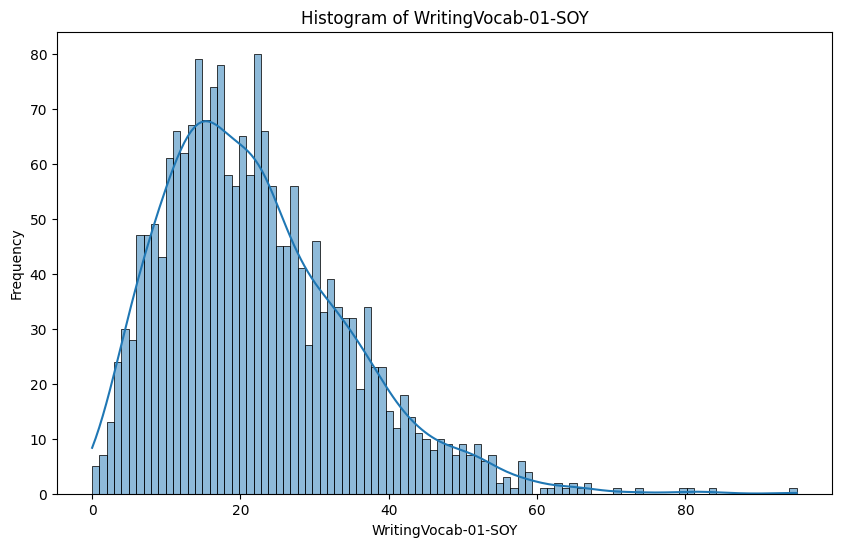

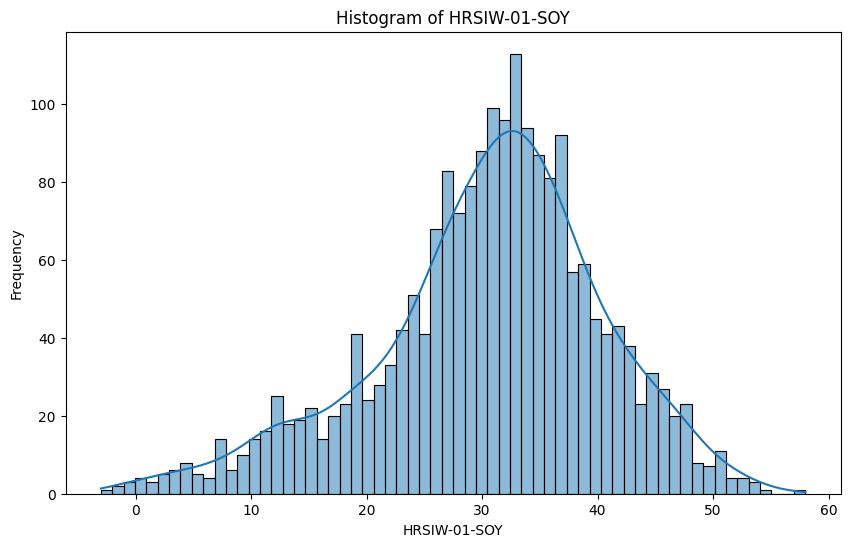

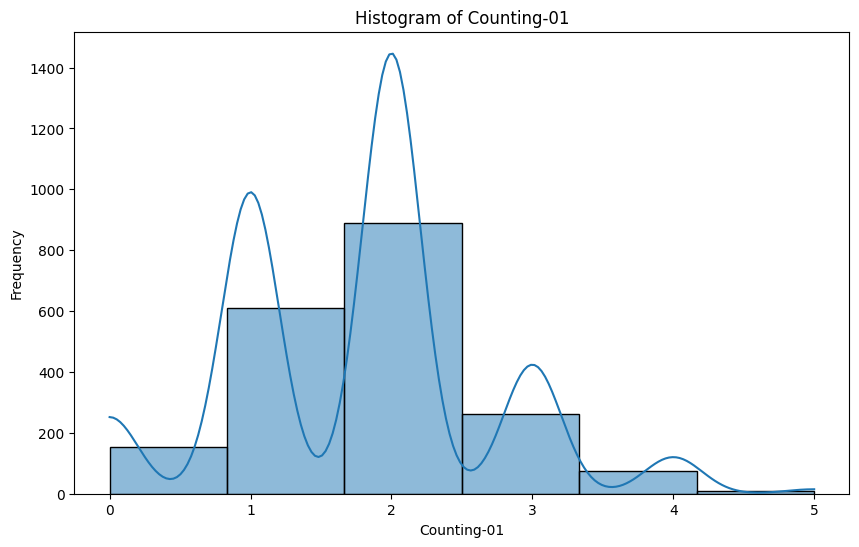

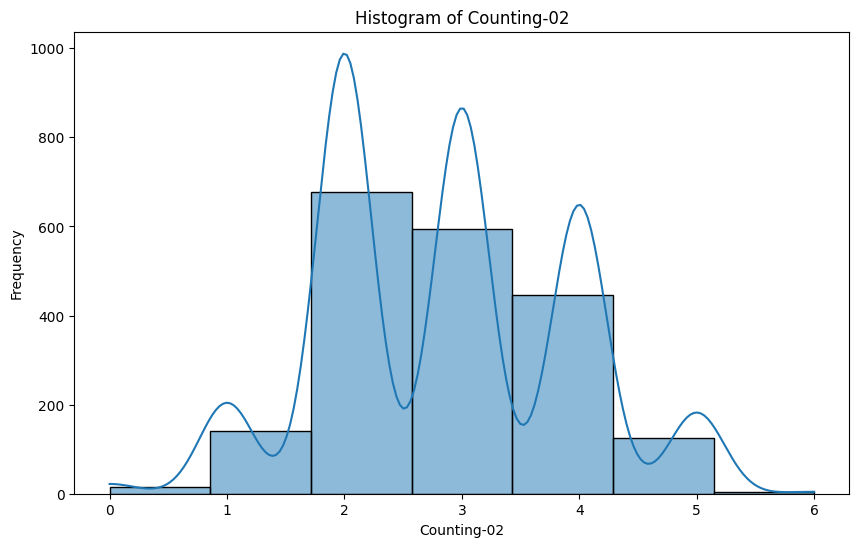

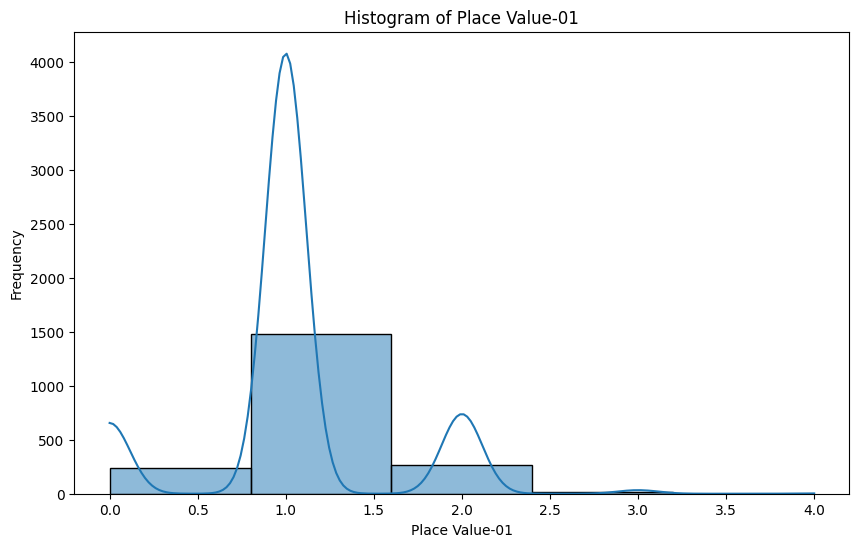

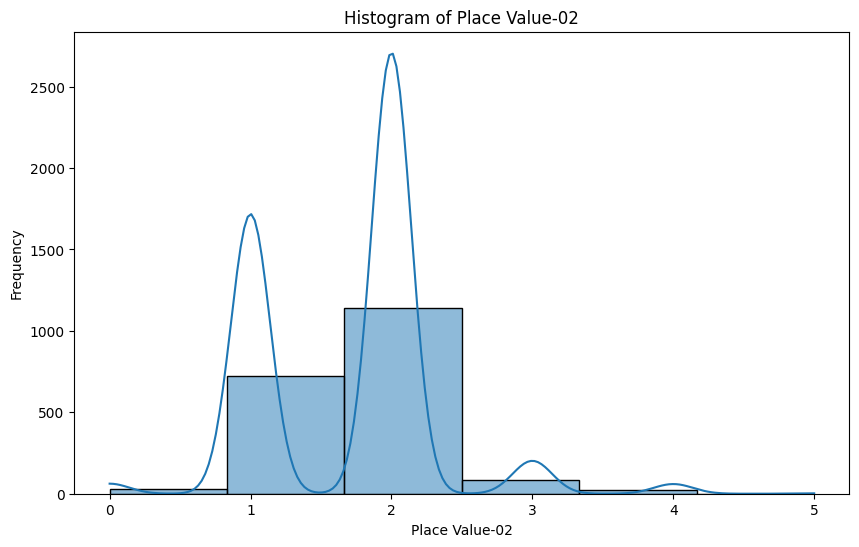

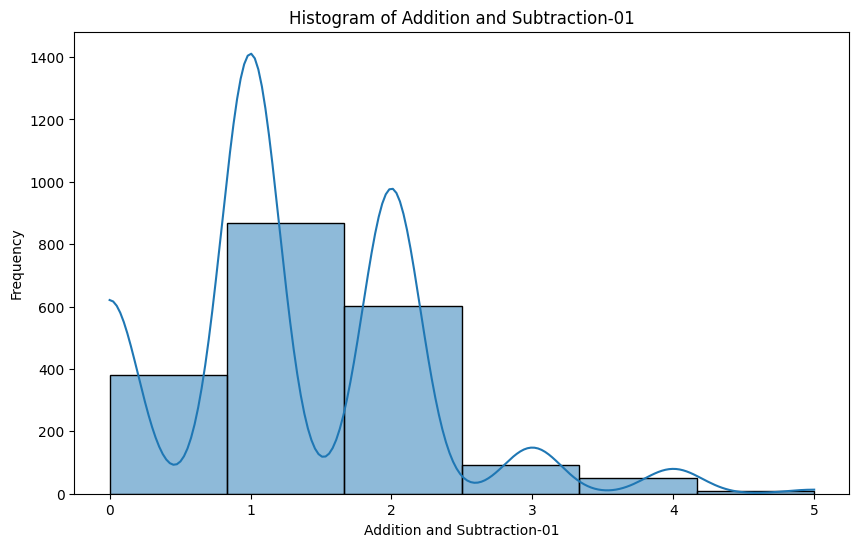

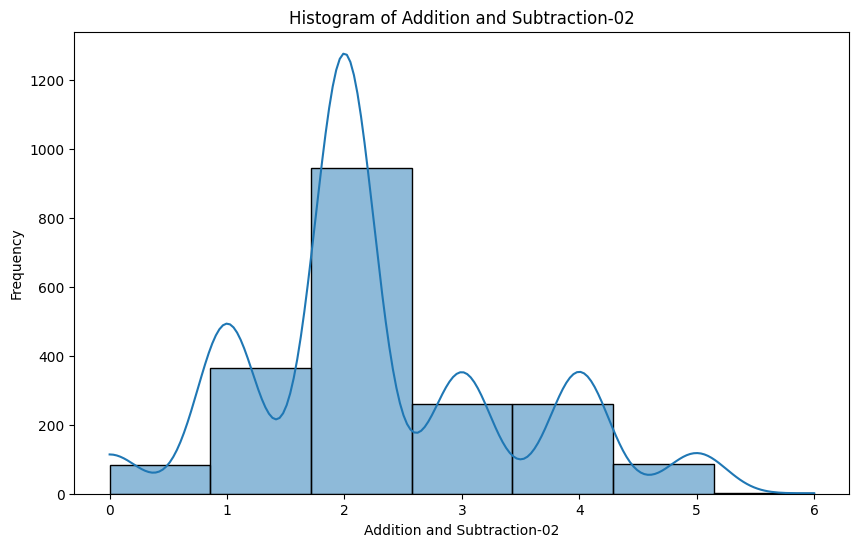

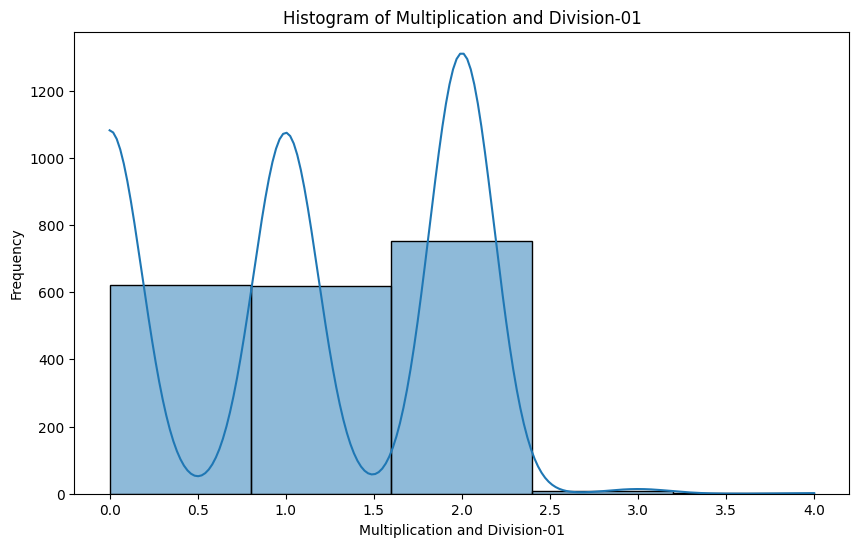

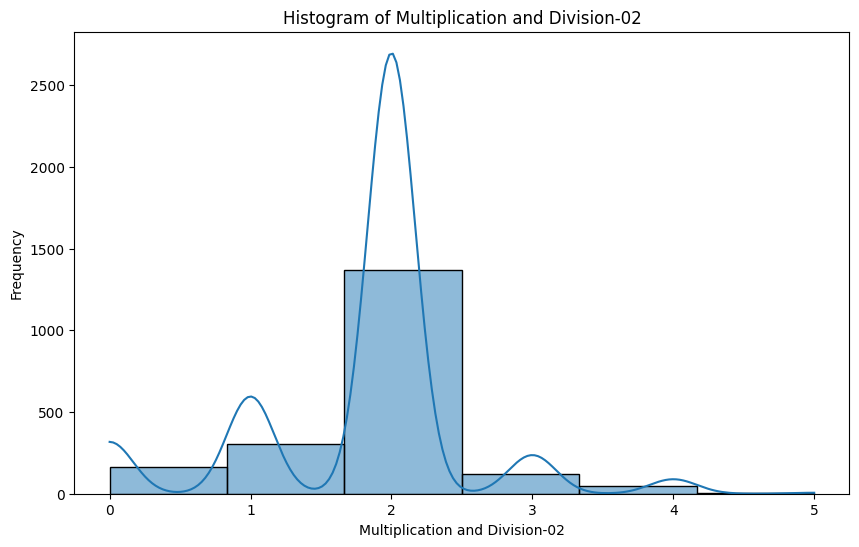

In [21]:
variables = [
    '01.SES', '02.SES', 'NumSibling', 'SiblingOrder', 'NumAbvYear9', 'NumAbvDiploma',
    'NumProf', 'Burt-01-SOY', 'Burt-01-EOY', 'Clay-01-SOY', 'Clay-01-EOY',
    'TextLevel-01-SOY', 'TextLevel-01-MOY', 'TextLevel-01-EOY',
    'TextLevel-02-SOY', 'TextLevel-02-MOY', 'TextLevel-02-EOY',
    'WritingVocab-01-SOY', 'HRSIW-01-SOY', 'Counting-01', 'Counting-02',
    'Place Value-01', 'Place Value-02', 'Addition and Subtraction-01',
    'Addition and Subtraction-02', 'Multiplication and Division-01',
    'Multiplication and Division-02'
]

# Iterate over each variable and create a histogram
for var in variables:
    # Calculate the number of bins
    num_bins = int(max(schools[var].dropna()) - min(schools[var].dropna()) + 1)

    # Create the histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data=schools, x=var, bins=num_bins, kde=True)

    # Set title and labels
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

    # Display the plot
    plt.show()

01.SES - Number of Outliers: 0
01.SES - Lower Bound: 68.0
01.SES - Upper Bound: 140.0
01.SES - Outliers:
count   0.000
mean      NaN
std       NaN
min       NaN
25%       NaN
50%       NaN
75%       NaN
max       NaN
Name: 01.SES, dtype: float64



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


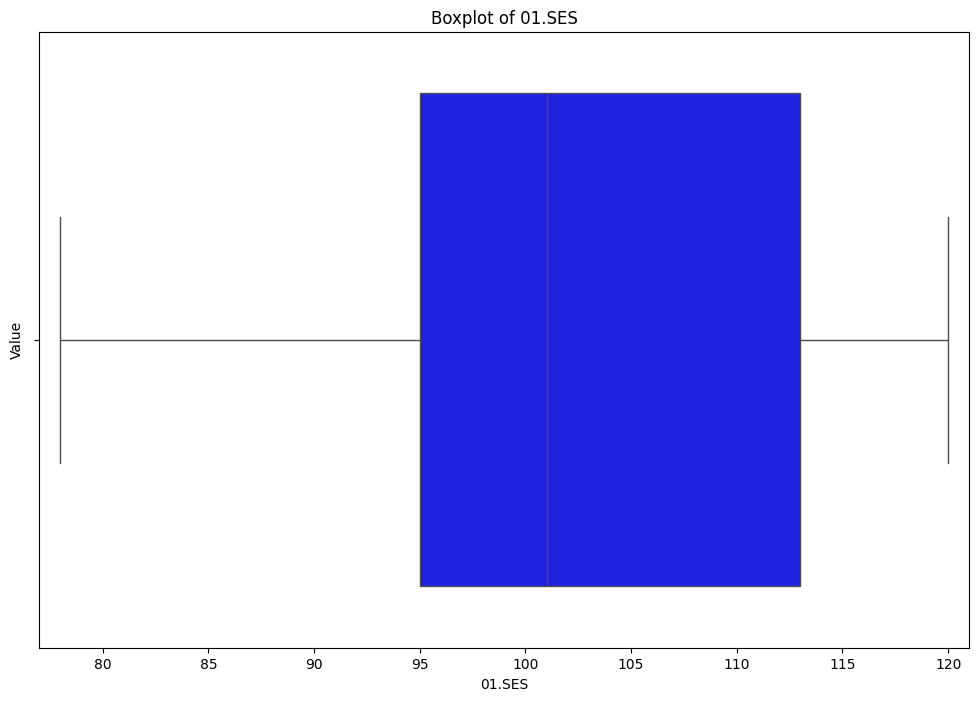

02.SES - Number of Outliers: 0
02.SES - Lower Bound: 74.0
02.SES - Upper Bound: 130.0
02.SES - Outliers:
count   0.000
mean      NaN
std       NaN
min       NaN
25%       NaN
50%       NaN
75%       NaN
max       NaN
Name: 02.SES, dtype: float64



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


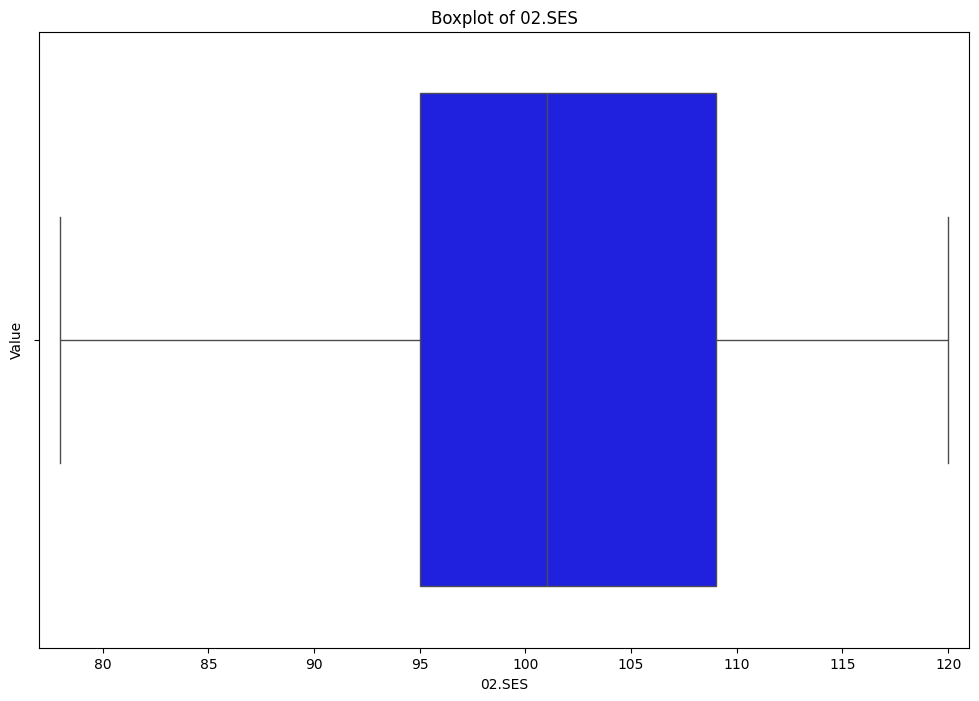

NumSibling - Number of Outliers: 60
NumSibling - Lower Bound: 0.5
NumSibling - Upper Bound: 4.5
NumSibling - Outliers:
count   60.000
mean     5.450
std      0.594
min      5.000
25%      5.000
50%      5.000
75%      6.000
max      7.000
Name: NumSibling, dtype: float64



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


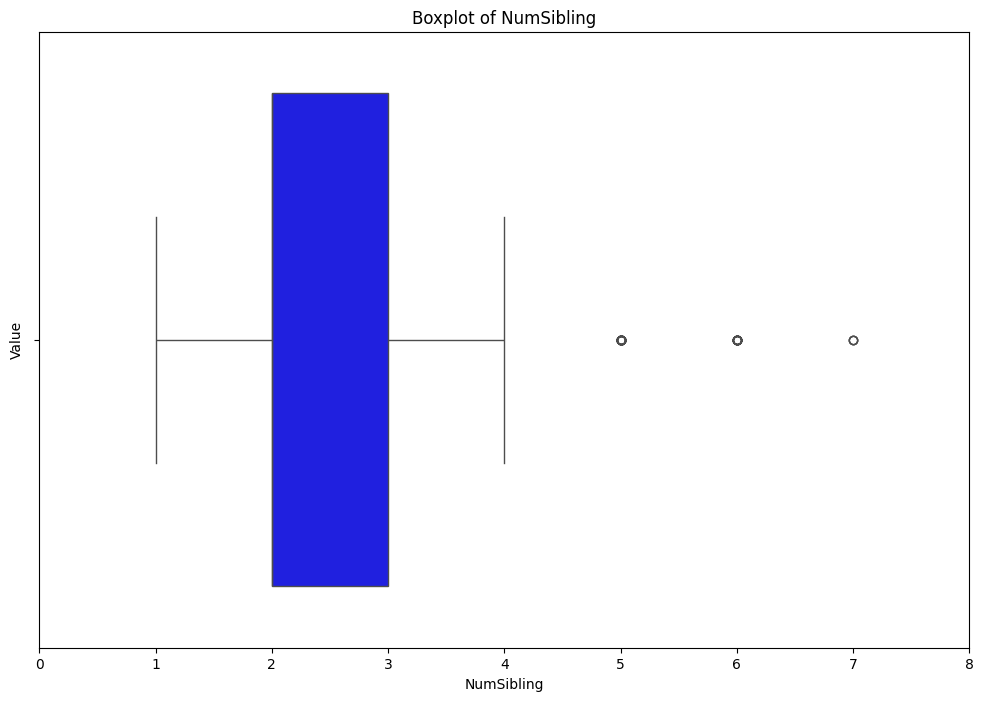

SiblingOrder - Number of Outliers: 80
SiblingOrder - Lower Bound: -0.5
SiblingOrder - Upper Bound: 3.5
SiblingOrder - Outliers:
count   80.000
mean     4.237
std      0.509
min      4.000
25%      4.000
50%      4.000
75%      4.000
max      6.000
Name: SiblingOrder, dtype: float64



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


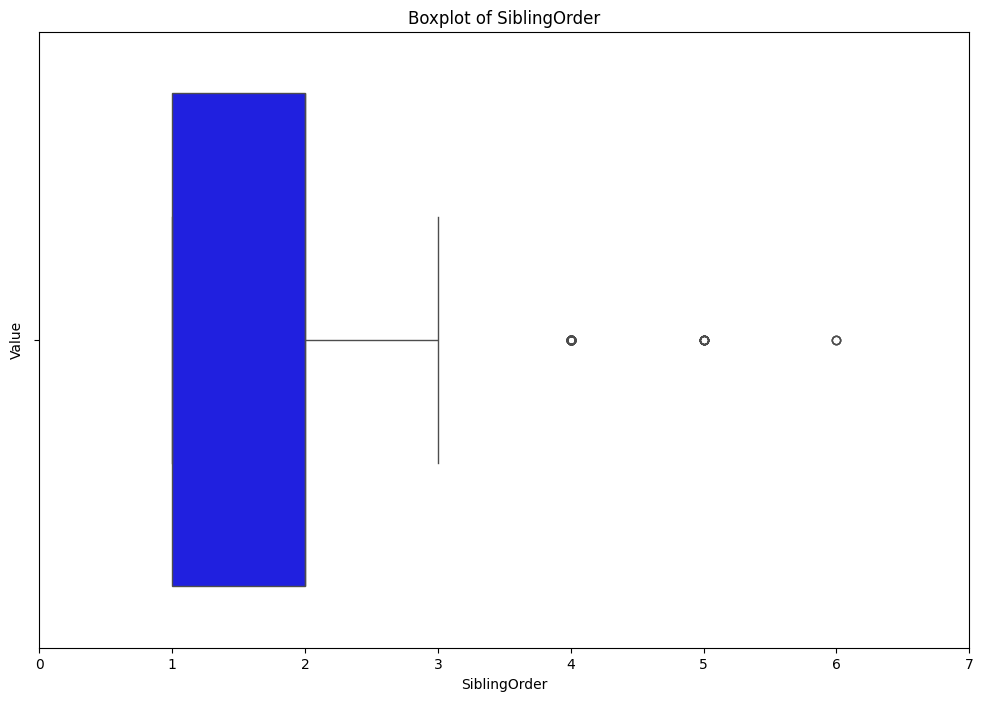

NumAbvYear9 - Number of Outliers: 0
NumAbvYear9 - Lower Bound: -0.5
NumAbvYear9 - Upper Bound: 3.5
NumAbvYear9 - Outliers:
count   0.000
mean      NaN
std       NaN
min       NaN
25%       NaN
50%       NaN
75%       NaN
max       NaN
Name: NumAbvYear9, dtype: float64



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


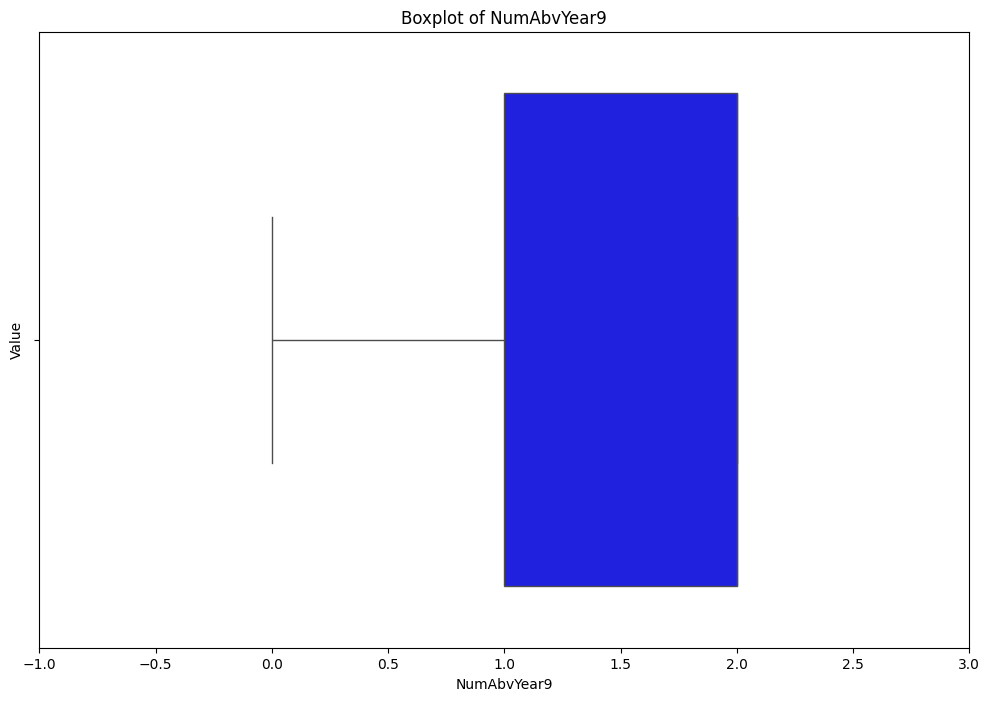

NumAbvDiploma - Number of Outliers: 0
NumAbvDiploma - Lower Bound: -3.0
NumAbvDiploma - Upper Bound: 5.0
NumAbvDiploma - Outliers:
count   0.000
mean      NaN
std       NaN
min       NaN
25%       NaN
50%       NaN
75%       NaN
max       NaN
Name: NumAbvDiploma, dtype: float64



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


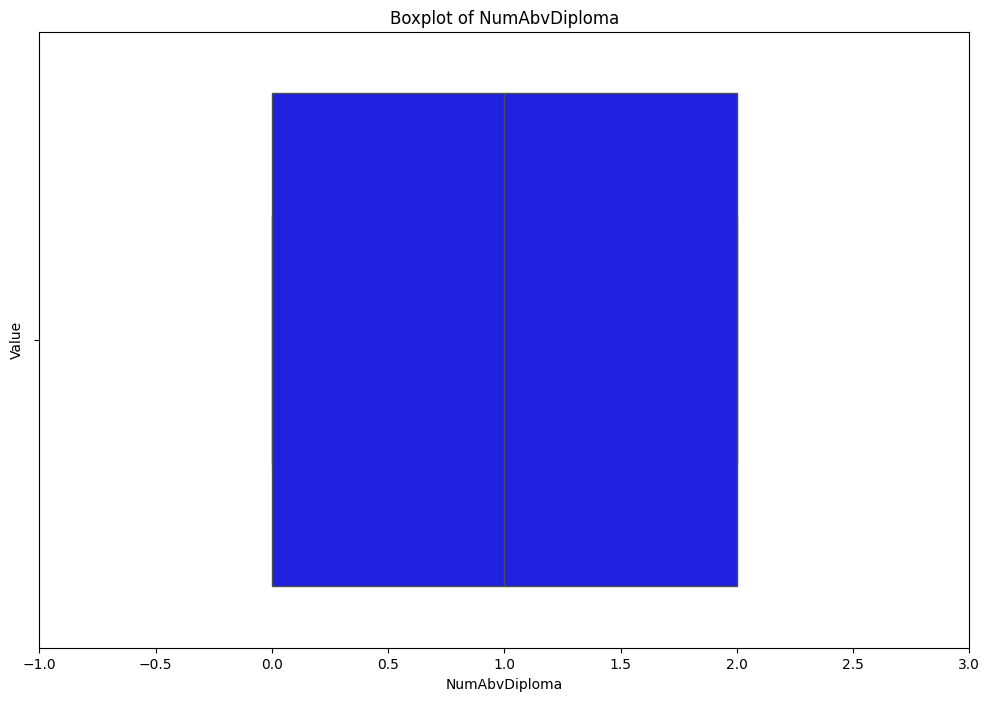

NumProf - Number of Outliers: 0
NumProf - Lower Bound: -1.5
NumProf - Upper Bound: 2.5
NumProf - Outliers:
count   0.000
mean      NaN
std       NaN
min       NaN
25%       NaN
50%       NaN
75%       NaN
max       NaN
Name: NumProf, dtype: float64



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


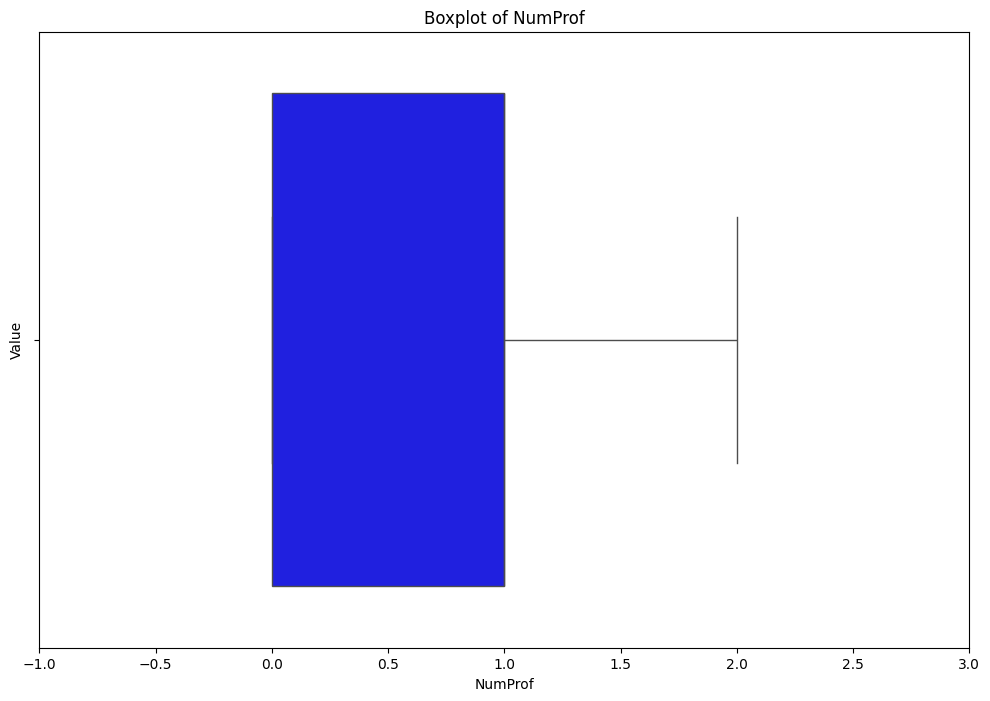

Burt-01-SOY - Number of Outliers: 39
Burt-01-SOY - Lower Bound: -7.0
Burt-01-SOY - Upper Bound: 49.0
Burt-01-SOY - Outliers:
count   39.000
mean    56.513
std      6.817
min     50.000
25%     51.500
50%     53.000
75%     59.000
max     77.000
Name: Burt-01-SOY, dtype: float64



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


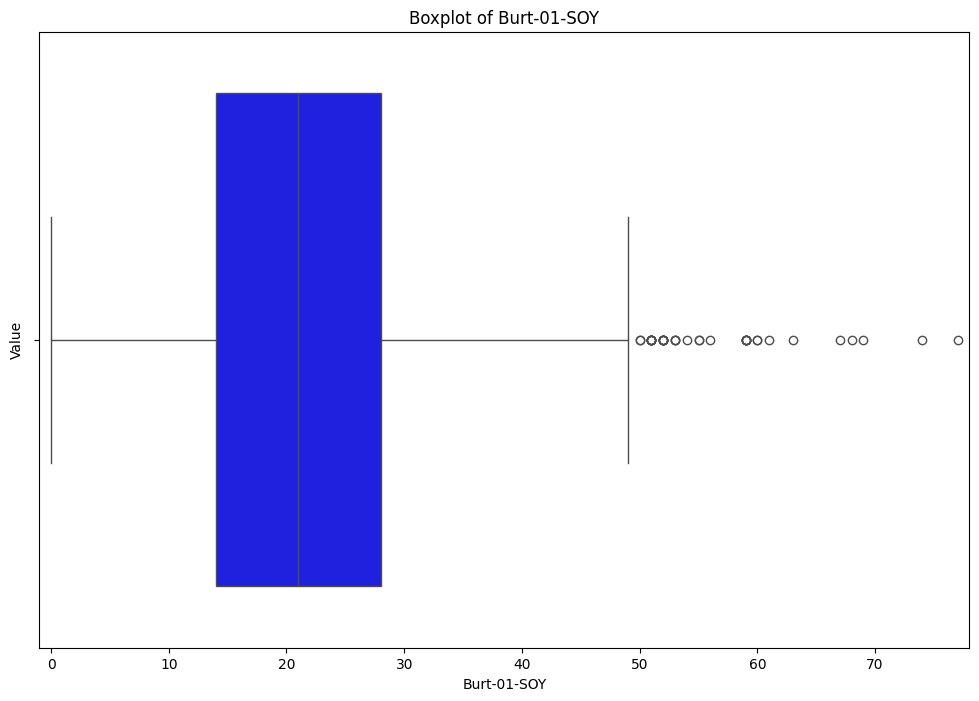

Burt-01-EOY - Number of Outliers: 74
Burt-01-EOY - Lower Bound: 8.0
Burt-01-EOY - Upper Bound: 64.0
Burt-01-EOY - Outliers:
count    74.000
mean     66.257
std      22.959
min       0.000
25%      67.000
50%      72.000
75%      75.000
max     101.000
Name: Burt-01-EOY, dtype: float64



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


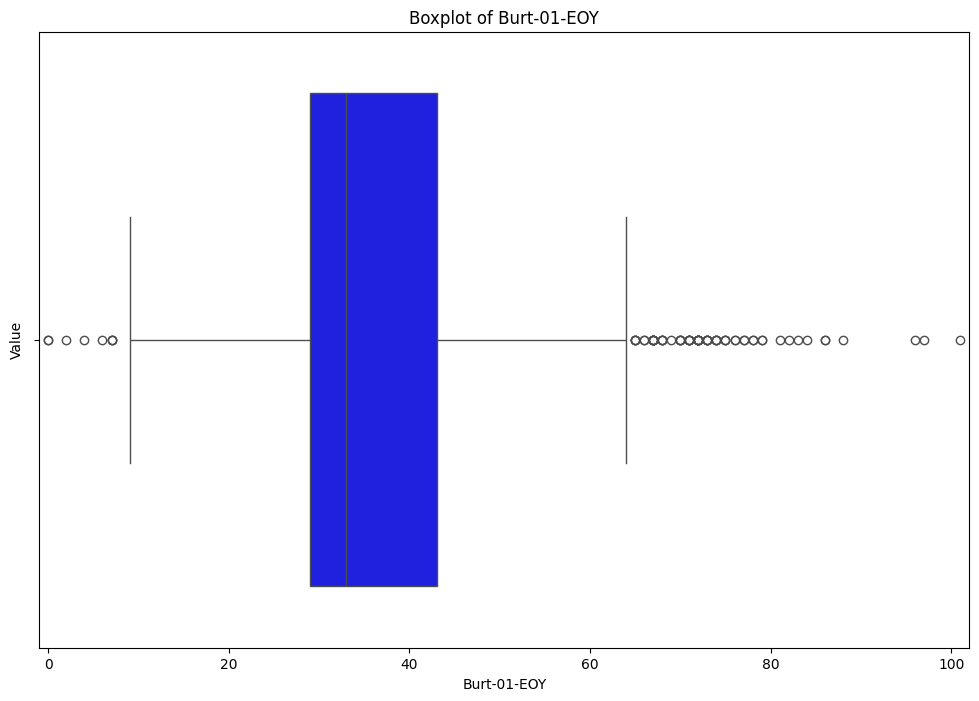

Clay-01-SOY - Number of Outliers: 244
Clay-01-SOY - Lower Bound: -4.5
Clay-01-SOY - Upper Bound: 7.5
Clay-01-SOY - Outliers:
count   244.000
mean     10.730
std       2.189
min       8.000
25%       9.000
50%      10.000
75%      12.000
max      17.000
Name: Clay-01-SOY, dtype: float64



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


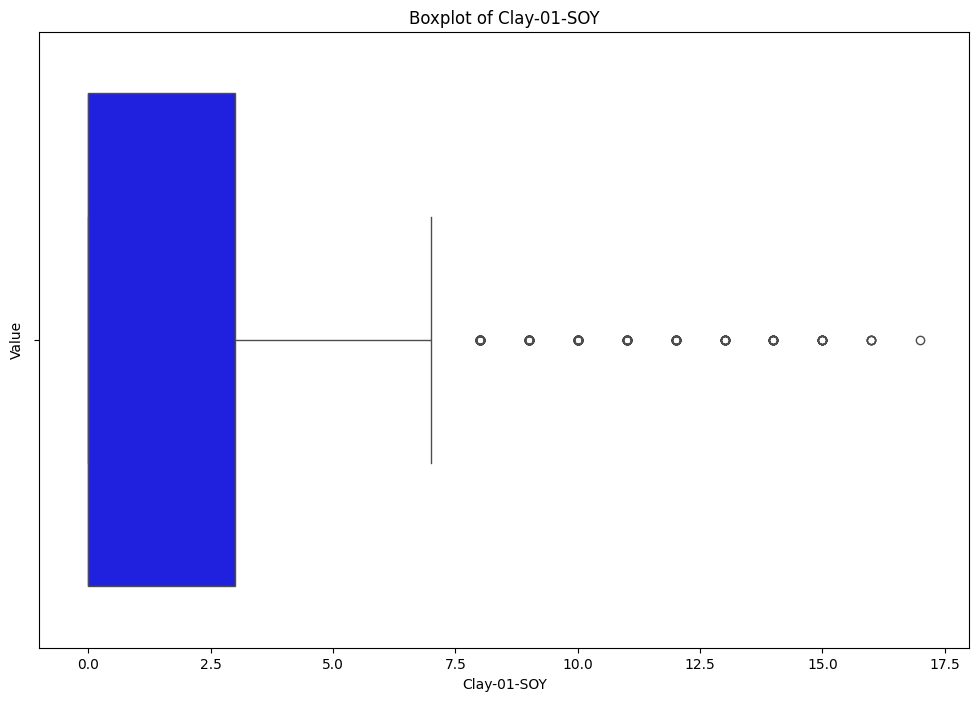

Clay-01-EOY - Number of Outliers: 0
Clay-01-EOY - Lower Bound: -19.5
Clay-01-EOY - Upper Bound: 32.5
Clay-01-EOY - Outliers:
count   0.000
mean      NaN
std       NaN
min       NaN
25%       NaN
50%       NaN
75%       NaN
max       NaN
Name: Clay-01-EOY, dtype: float64



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


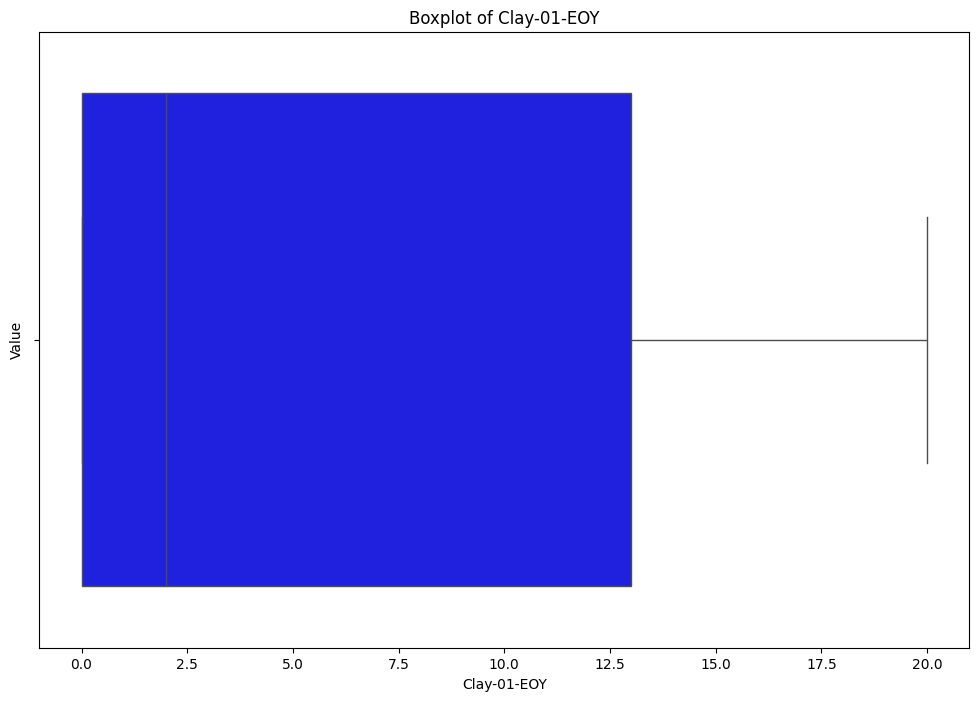

TextLevel-01-SOY - Number of Outliers: 43
TextLevel-01-SOY - Lower Bound: -6.0
TextLevel-01-SOY - Upper Bound: 26.0
TextLevel-01-SOY - Outliers:
count   43.000
mean    29.070
std      1.895
min     27.000
25%     27.000
50%     29.000
75%     31.000
max     34.000
Name: TextLevel-01-SOY, dtype: float64



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


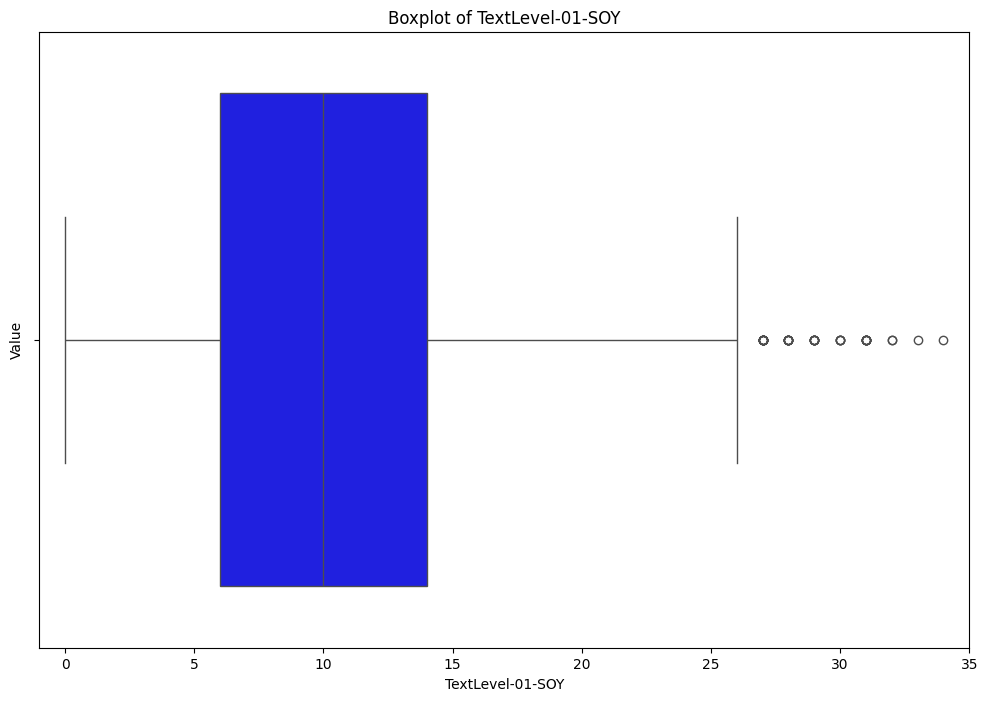

TextLevel-01-MOY - Number of Outliers: 59
TextLevel-01-MOY - Lower Bound: 0.5
TextLevel-01-MOY - Upper Bound: 28.5
TextLevel-01-MOY - Outliers:
count   59.000
mean    27.237
std      9.319
min      0.000
25%     29.000
50%     30.000
75%     31.000
max     33.000
Name: TextLevel-01-MOY, dtype: float64



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


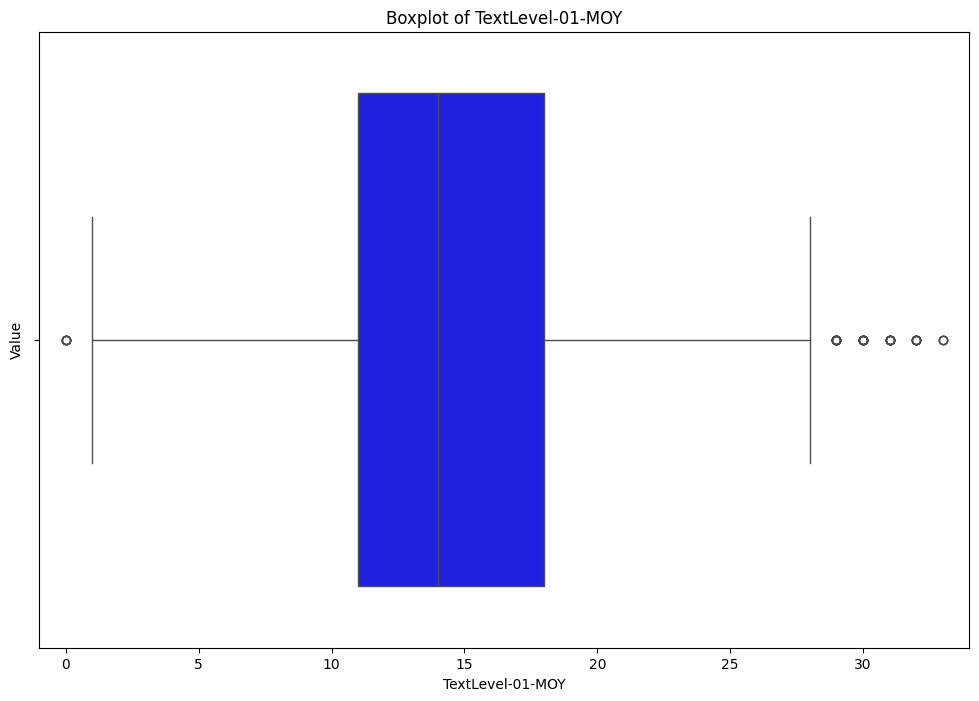

TextLevel-01-EOY - Number of Outliers: 15
TextLevel-01-EOY - Lower Bound: 9.0
TextLevel-01-EOY - Upper Bound: 33.0
TextLevel-01-EOY - Outliers:
count   15.000
mean     8.333
std      7.237
min      4.000
25%      5.500
50%      7.000
75%      8.000
max     34.000
Name: TextLevel-01-EOY, dtype: float64



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


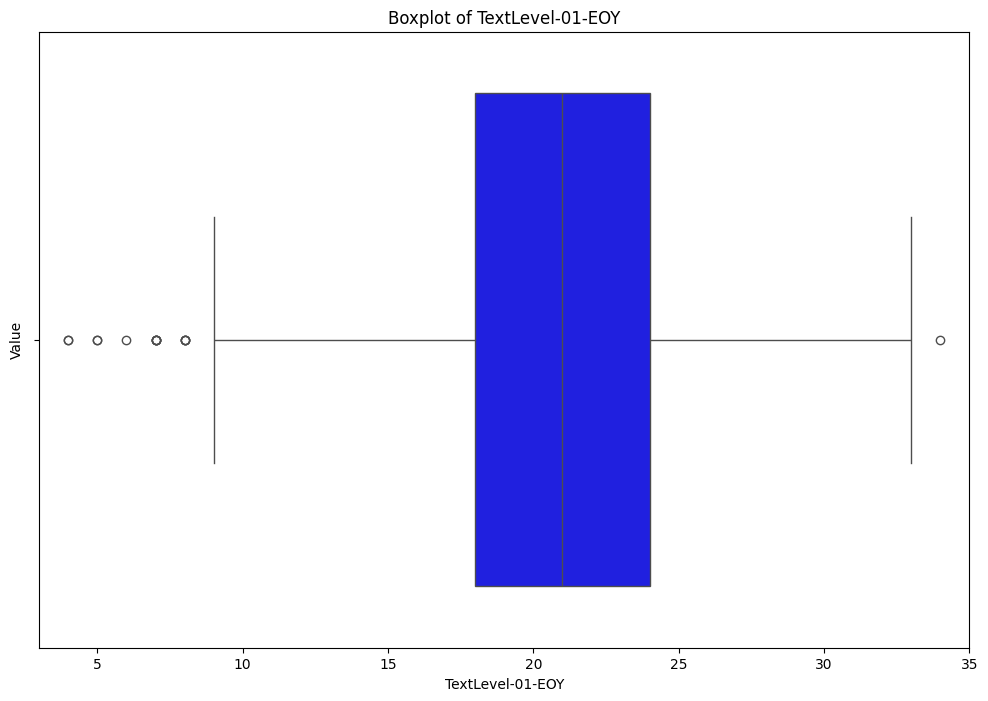

TextLevel-02-SOY - Number of Outliers: 14
TextLevel-02-SOY - Lower Bound: 7.5
TextLevel-02-SOY - Upper Bound: 35.5
TextLevel-02-SOY - Outliers:
count   14.000
mean     7.857
std      8.254
min      2.000
25%      6.000
50%      6.000
75%      7.000
max     36.000
Name: TextLevel-02-SOY, dtype: float64



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


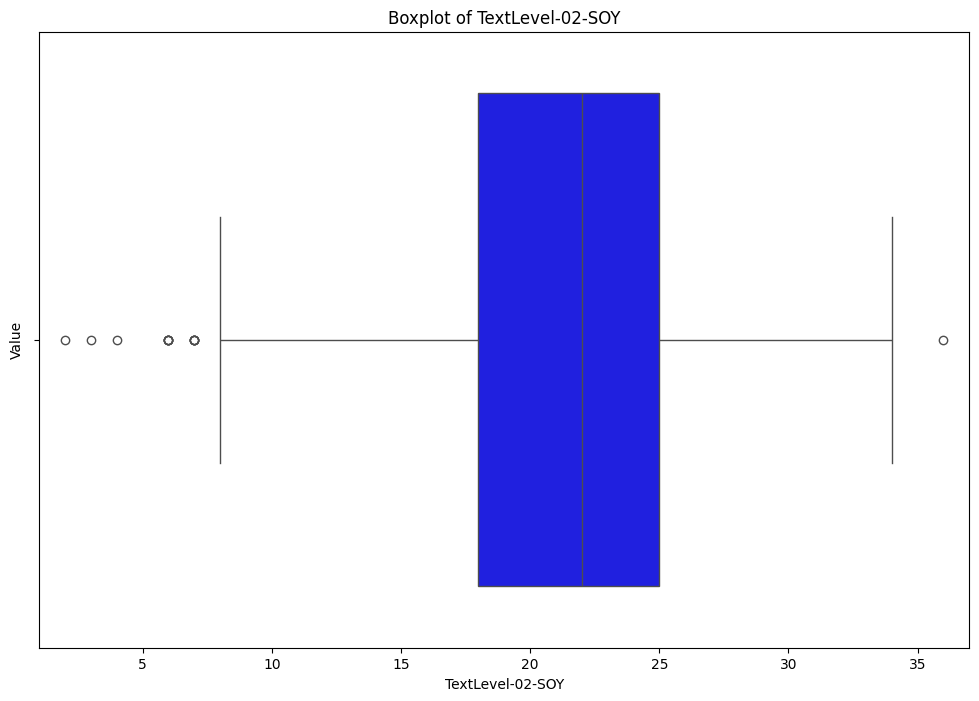

TextLevel-02-MOY - Number of Outliers: 16
TextLevel-02-MOY - Lower Bound: 10.5
TextLevel-02-MOY - Upper Bound: 38.5
TextLevel-02-MOY - Outliers:
count   16.000
mean     8.062
std      1.569
min      5.000
25%      7.750
50%      8.000
75%      9.250
max     10.000
Name: TextLevel-02-MOY, dtype: float64



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


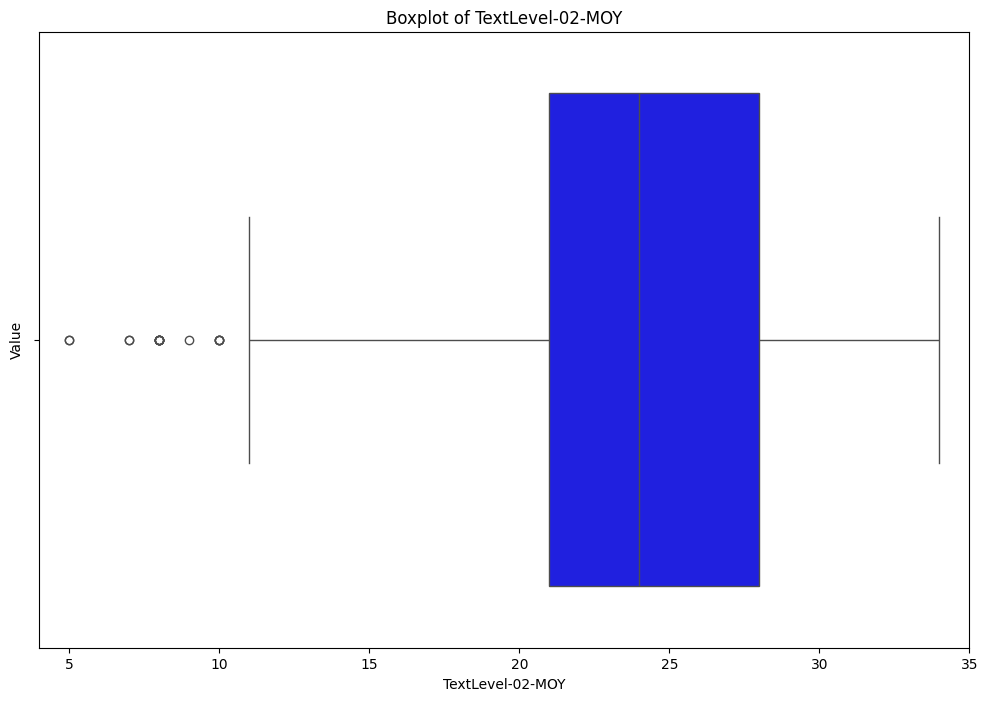

TextLevel-02-EOY - Number of Outliers: 55
TextLevel-02-EOY - Lower Bound: 17.5
TextLevel-02-EOY - Upper Bound: 37.5
TextLevel-02-EOY - Outliers:
count   55.000
mean    13.764
std      2.861
min      5.000
25%     12.500
50%     15.000
75%     16.000
max     17.000
Name: TextLevel-02-EOY, dtype: float64



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


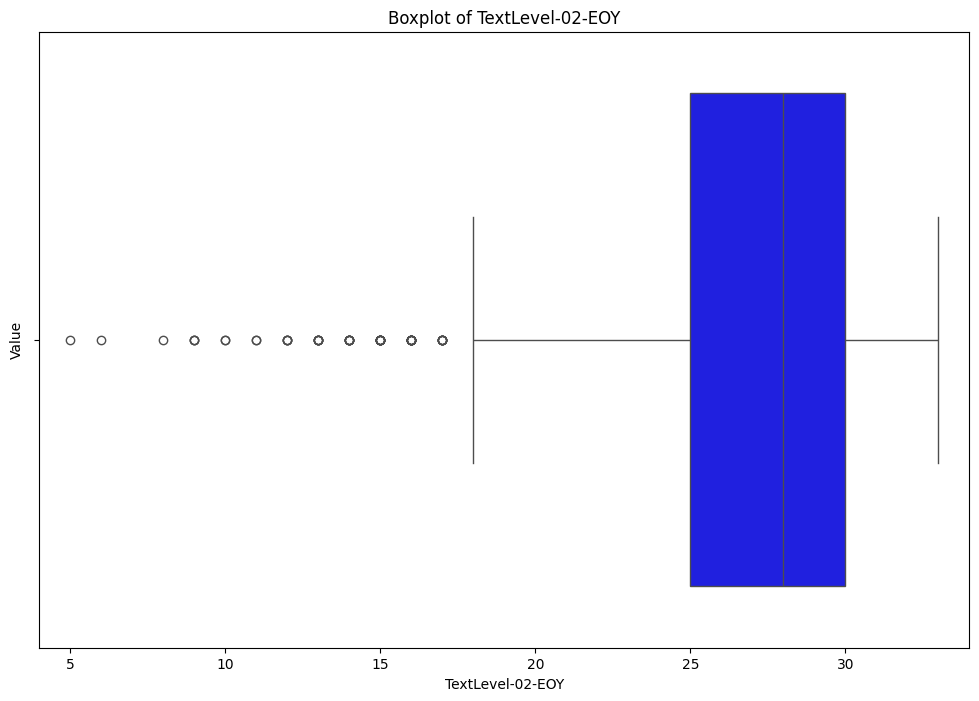

WritingVocab-01-SOY - Number of Outliers: 39
WritingVocab-01-SOY - Lower Bound: -11.0
WritingVocab-01-SOY - Upper Bound: 53.0
WritingVocab-01-SOY - Outliers:
count   39.000
mean    62.179
std      9.436
min     54.000
25%     56.000
50%     59.000
75%     65.000
max     95.000
Name: WritingVocab-01-SOY, dtype: float64



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


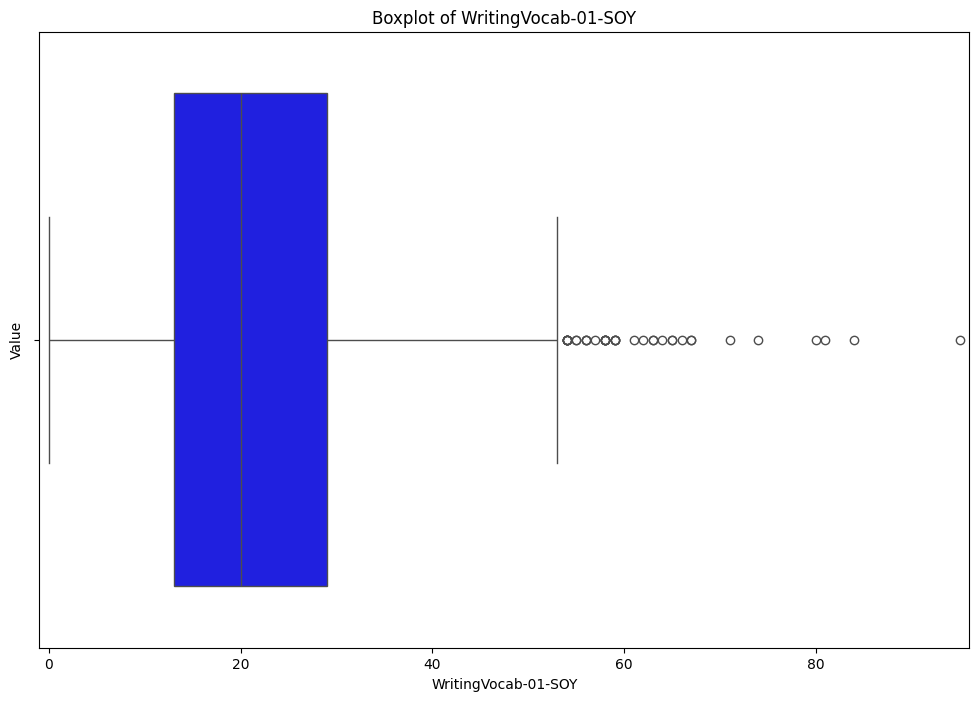

HRSIW-01-SOY - Number of Outliers: 42
HRSIW-01-SOY - Lower Bound: 7.0
HRSIW-01-SOY - Upper Bound: 55.0
HRSIW-01-SOY - Outliers:
count   42.000
mean     3.810
std      8.901
min     -3.000
25%      1.000
50%      3.000
75%      4.000
max     58.000
Name: HRSIW-01-SOY, dtype: float64



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


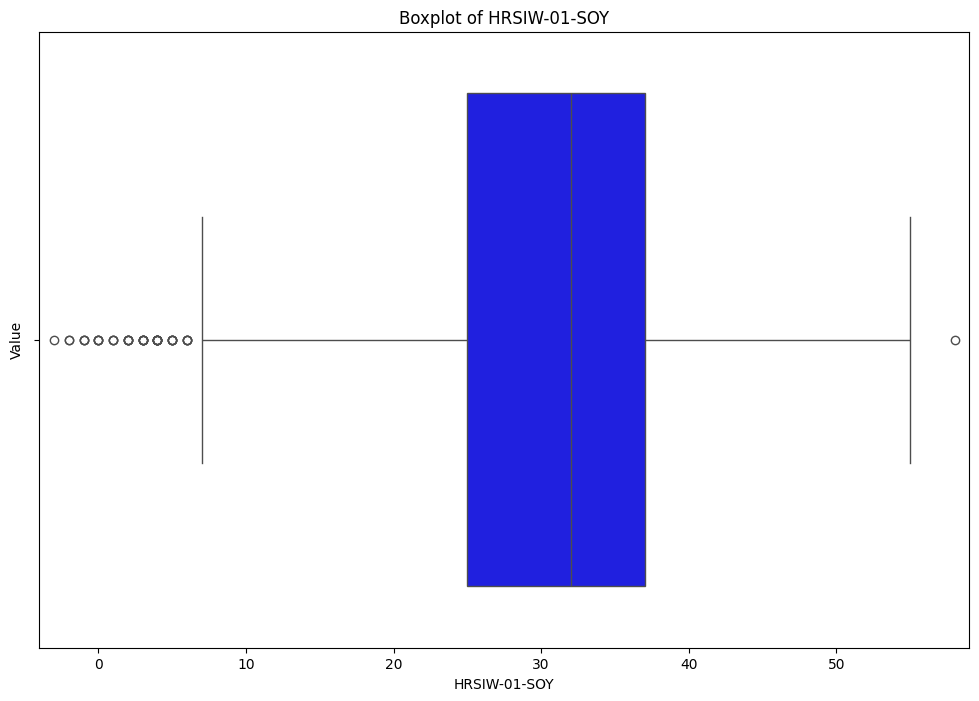

Counting-01 - Number of Outliers: 83
Counting-01 - Lower Bound: -0.5
Counting-01 - Upper Bound: 3.5
Counting-01 - Outliers:
count   83.000
mean     4.108
std      0.313
min      4.000
25%      4.000
50%      4.000
75%      4.000
max      5.000
Name: Counting-01, dtype: float64



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


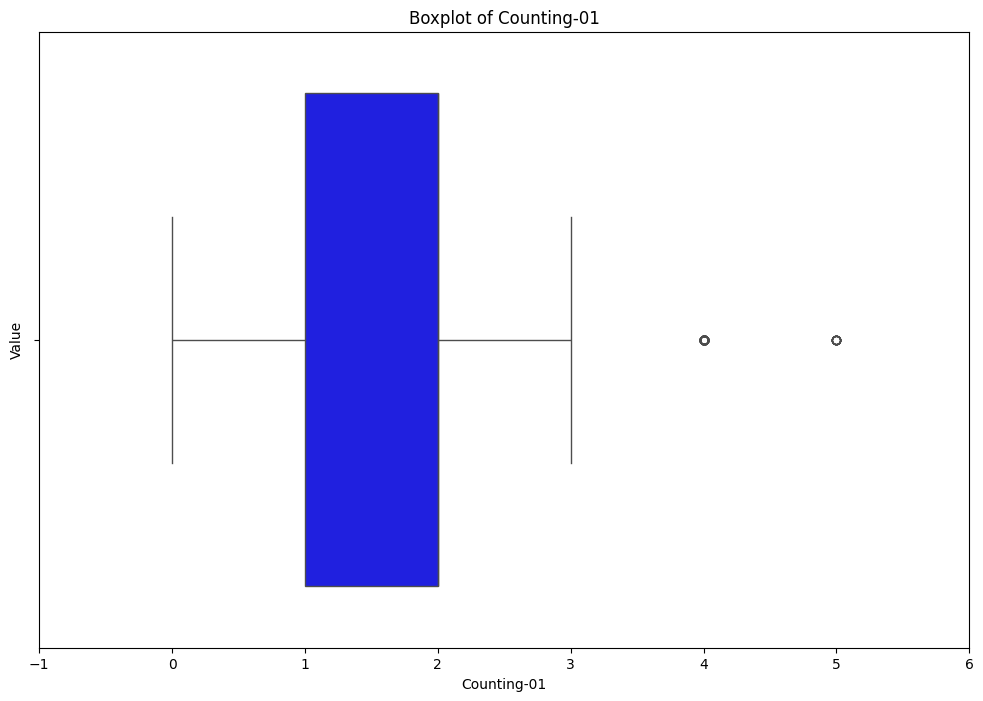

Counting-02 - Number of Outliers: 0
Counting-02 - Lower Bound: -1.0
Counting-02 - Upper Bound: 7.0
Counting-02 - Outliers:
count   0.000
mean      NaN
std       NaN
min       NaN
25%       NaN
50%       NaN
75%       NaN
max       NaN
Name: Counting-02, dtype: float64



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


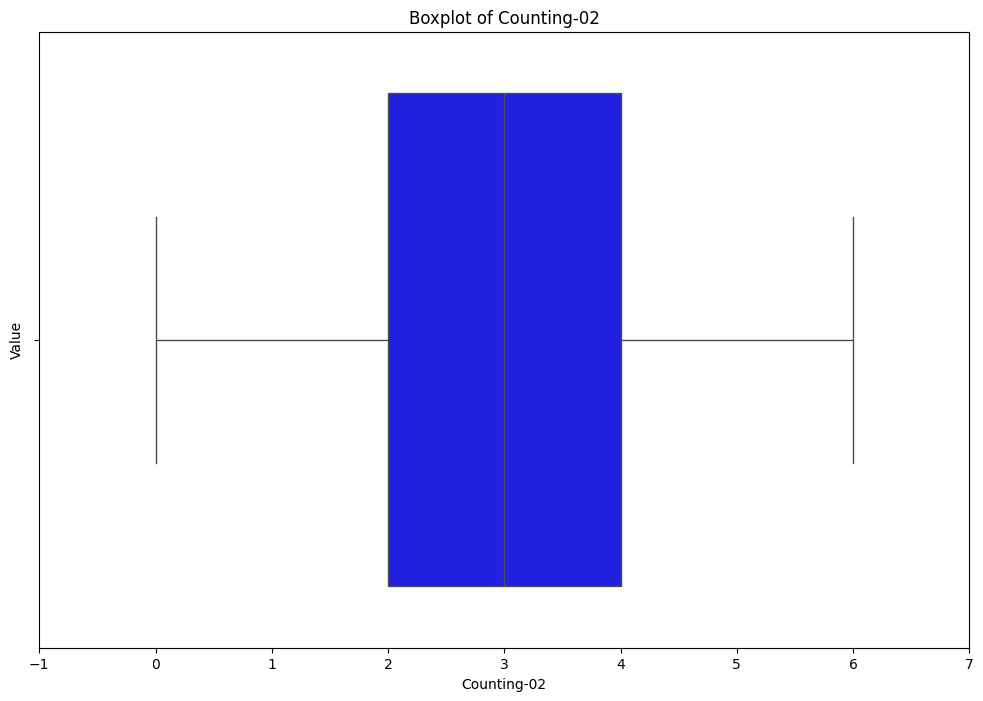

Place Value-01 - Number of Outliers: 519
Place Value-01 - Lower Bound: 1.0
Place Value-01 - Upper Bound: 1.0
Place Value-01 - Outliers:
count   519.000
mean      1.110
std       1.037
min       0.000
25%       0.000
50%       2.000
75%       2.000
max       4.000
Name: Place Value-01, dtype: float64



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


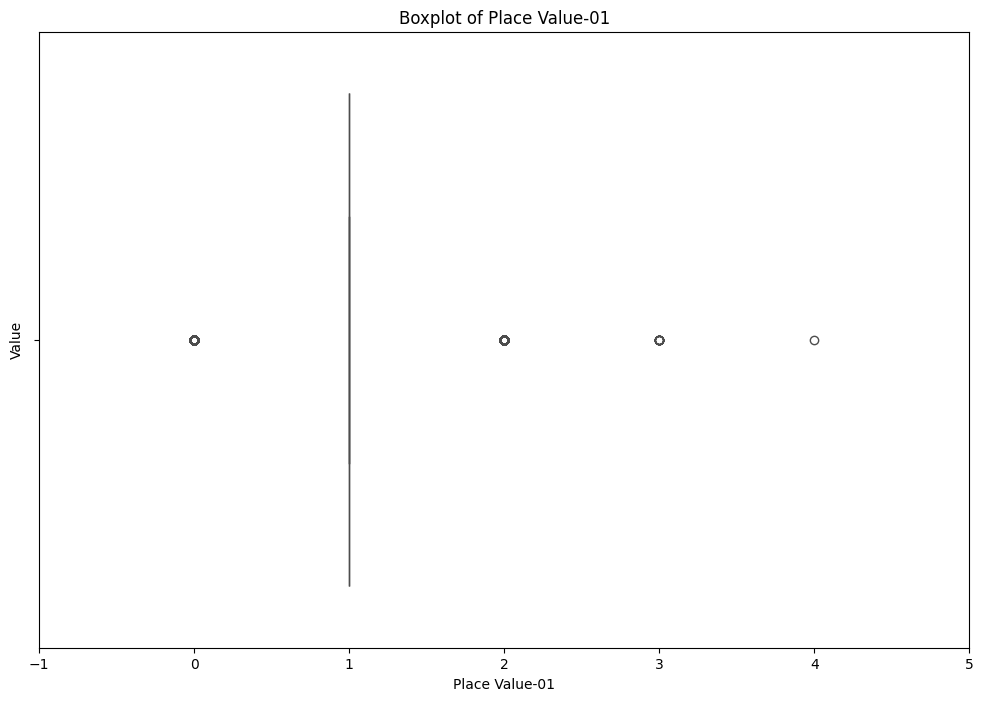

Place Value-02 - Number of Outliers: 26
Place Value-02 - Lower Bound: -0.5
Place Value-02 - Upper Bound: 3.5
Place Value-02 - Outliers:
count   26.000
mean     4.038
std      0.196
min      4.000
25%      4.000
50%      4.000
75%      4.000
max      5.000
Name: Place Value-02, dtype: float64



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


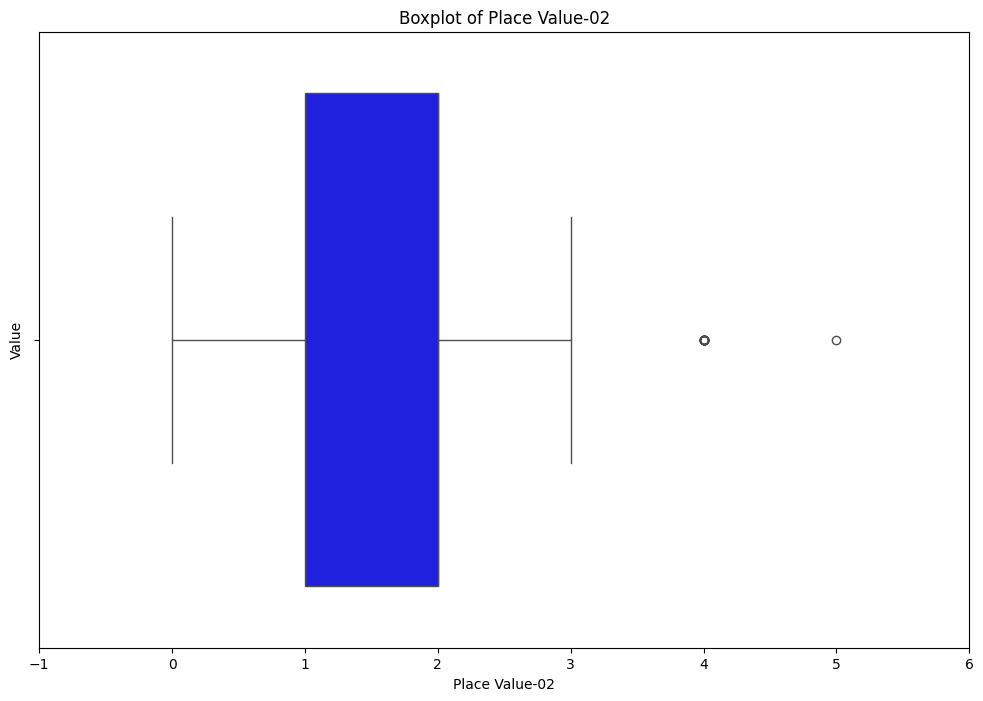

Addition and Subtraction-01 - Number of Outliers: 57
Addition and Subtraction-01 - Lower Bound: -0.5
Addition and Subtraction-01 - Upper Bound: 3.5
Addition and Subtraction-01 - Outliers:
count   57.000
mean     4.140
std      0.350
min      4.000
25%      4.000
50%      4.000
75%      4.000
max      5.000
Name: Addition and Subtraction-01, dtype: float64



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


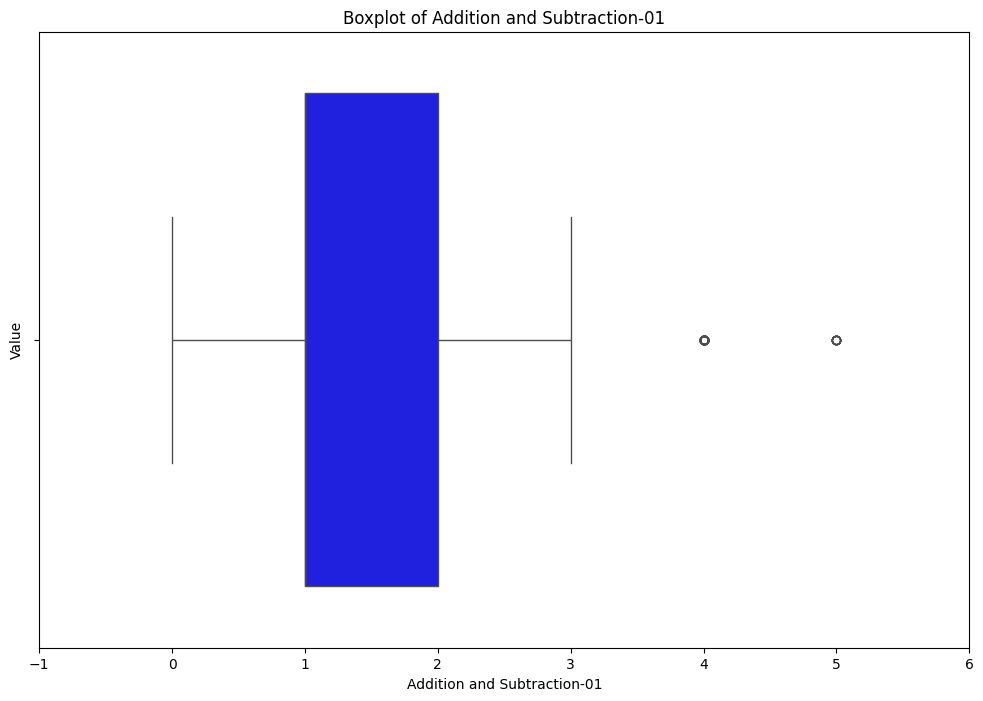

Addition and Subtraction-02 - Number of Outliers: 172
Addition and Subtraction-02 - Lower Bound: 0.5
Addition and Subtraction-02 - Upper Bound: 4.5
Addition and Subtraction-02 - Outliers:
count   172.000
mean      2.564
std       2.513
min       0.000
25%       0.000
50%       5.000
75%       5.000
max       6.000
Name: Addition and Subtraction-02, dtype: float64



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


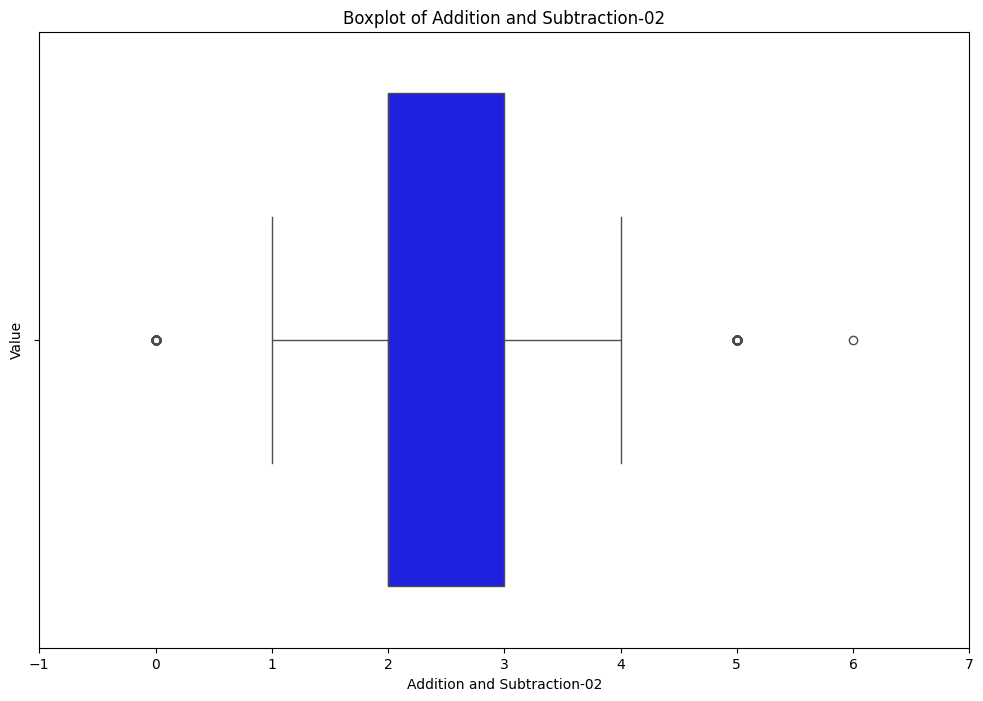

Multiplication and Division-01 - Number of Outliers: 0
Multiplication and Division-01 - Lower Bound: -3.0
Multiplication and Division-01 - Upper Bound: 5.0
Multiplication and Division-01 - Outliers:
count   0.000
mean      NaN
std       NaN
min       NaN
25%       NaN
50%       NaN
75%       NaN
max       NaN
Name: Multiplication and Division-01, dtype: float64



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


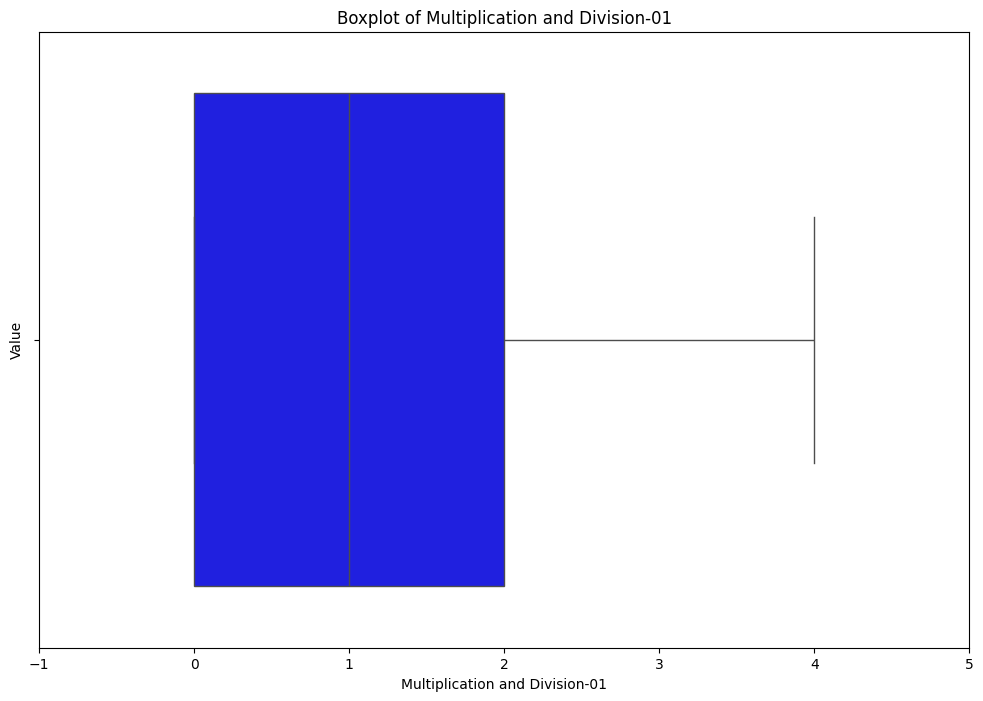

Multiplication and Division-02 - Number of Outliers: 631
Multiplication and Division-02 - Lower Bound: 2.0
Multiplication and Division-02 - Upper Bound: 2.0
Multiplication and Division-02 - Outliers:
count   631.000
mean      1.358
std       1.268
min       0.000
25%       0.000
50%       1.000
75%       3.000
max       5.000
Name: Multiplication and Division-02, dtype: float64



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


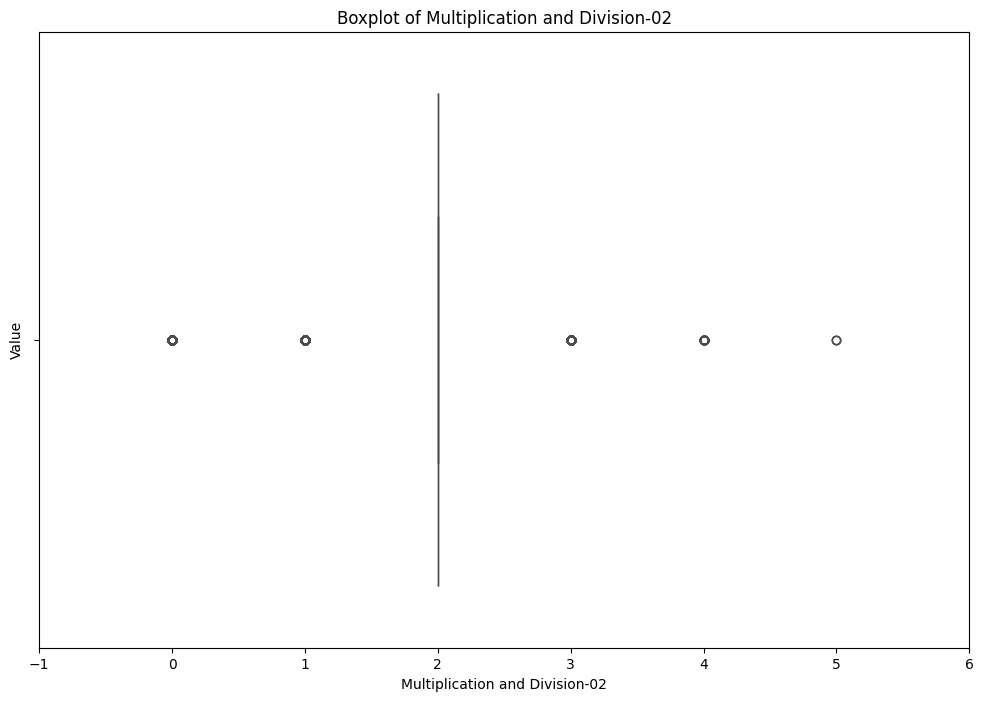

In [22]:
# Define a function to calculate outliers
def get_outliers(df, var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]

    return outliers, lower_bound, upper_bound

# List of variables to analyze
variables = [
    '01.SES', '02.SES', 'NumSibling', 'SiblingOrder', 'NumAbvYear9', 'NumAbvDiploma',
    'NumProf', 'Burt-01-SOY', 'Burt-01-EOY', 'Clay-01-SOY', 'Clay-01-EOY',
    'TextLevel-01-SOY', 'TextLevel-01-MOY', 'TextLevel-01-EOY',
    'TextLevel-02-SOY', 'TextLevel-02-MOY', 'TextLevel-02-EOY',
    'WritingVocab-01-SOY', 'HRSIW-01-SOY', 'Counting-01', 'Counting-02',
    'Place Value-01', 'Place Value-02', 'Addition and Subtraction-01',
    'Addition and Subtraction-02', 'Multiplication and Division-01',
    'Multiplication and Division-02'
]

# Iterate over each variable and create a boxplot
for var in variables:
    if var in schools.columns:
        # Calculate outliers
        outliers, lower_bound, upper_bound = get_outliers(schools, var)

        # Print outlier statistics
        num_outliers = len(outliers)
        print(f'{var} - Number of Outliers: {num_outliers}')
        print(f'{var} - Lower Bound: {lower_bound}')
        print(f'{var} - Upper Bound: {upper_bound}')
        print(f'{var} - Outliers:\n{outliers[var].describe()}\n')

        # Create the boxplot
        plt.figure(figsize=(12, 8))
        sns.boxplot(data=schools, x=var, color='blue')

        # Set title and labels
        plt.title(f'Boxplot of {var}')
        plt.xlabel(var)
        plt.ylabel('Value')

        # Optionally, adjust the x-axis limits
        plt.xlim([schools[var].min() - 1, schools[var].max() + 1])

        # Display the plot
        plt.show()
    else:
        print(f"Variable {var} not found in the DataFrame.")

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


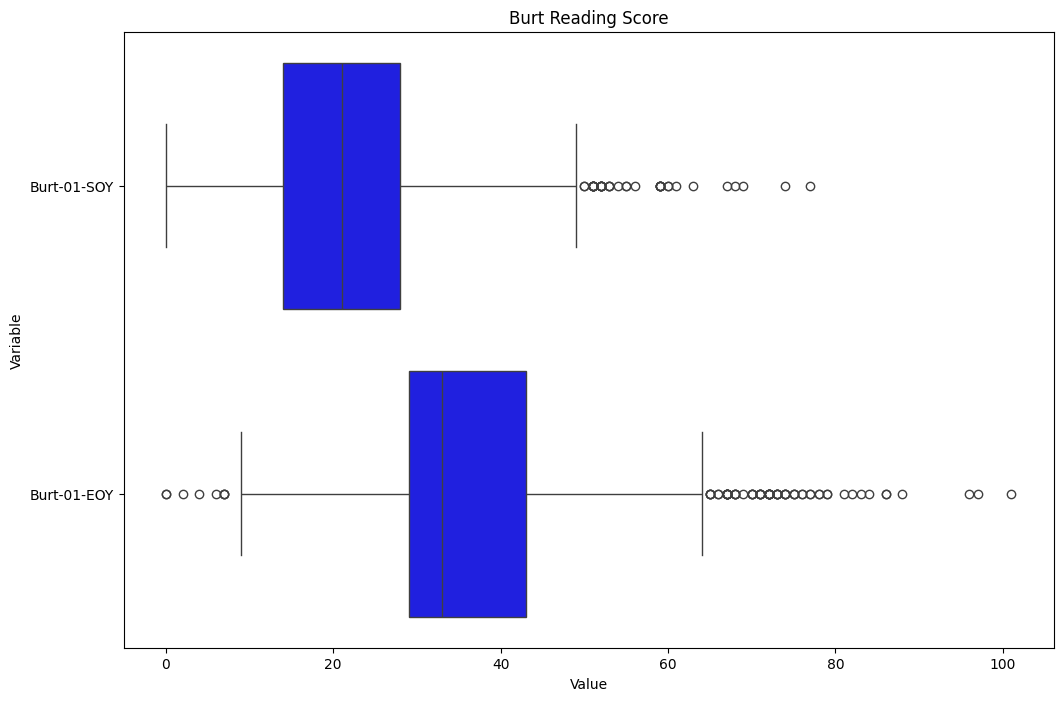

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


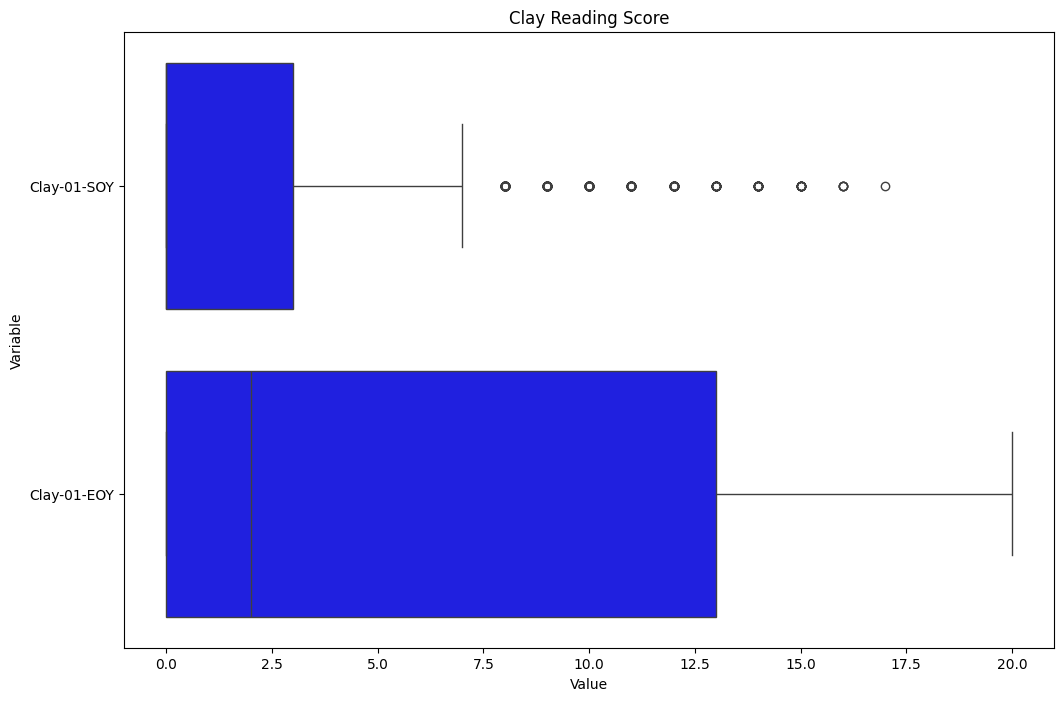

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


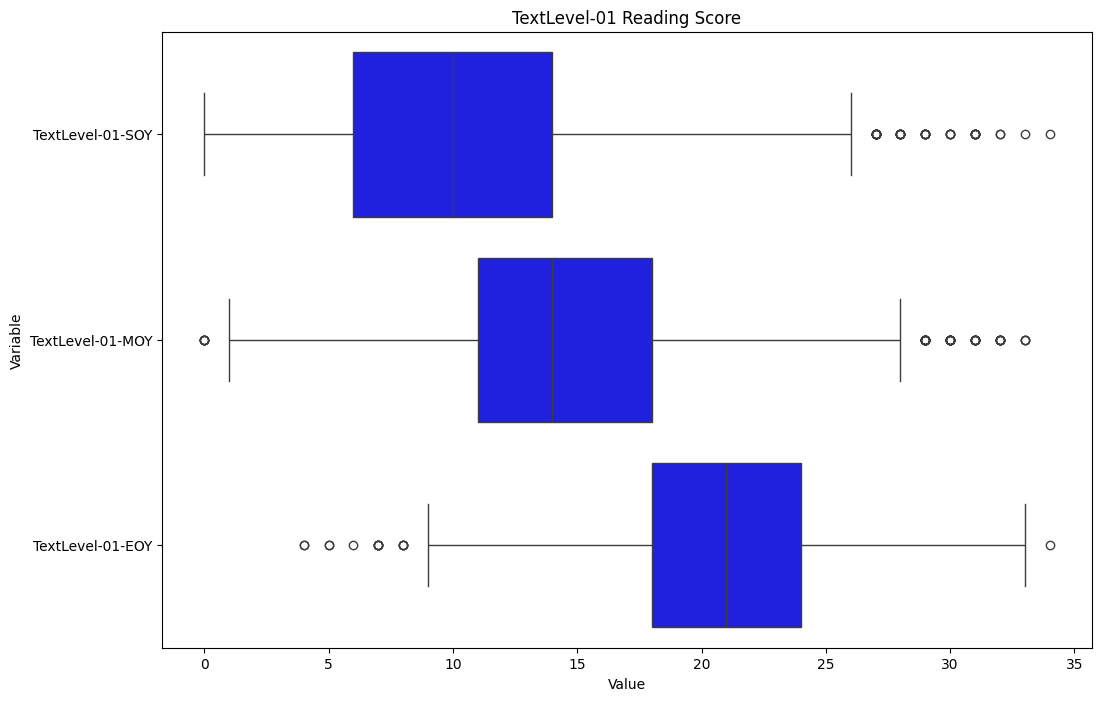

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


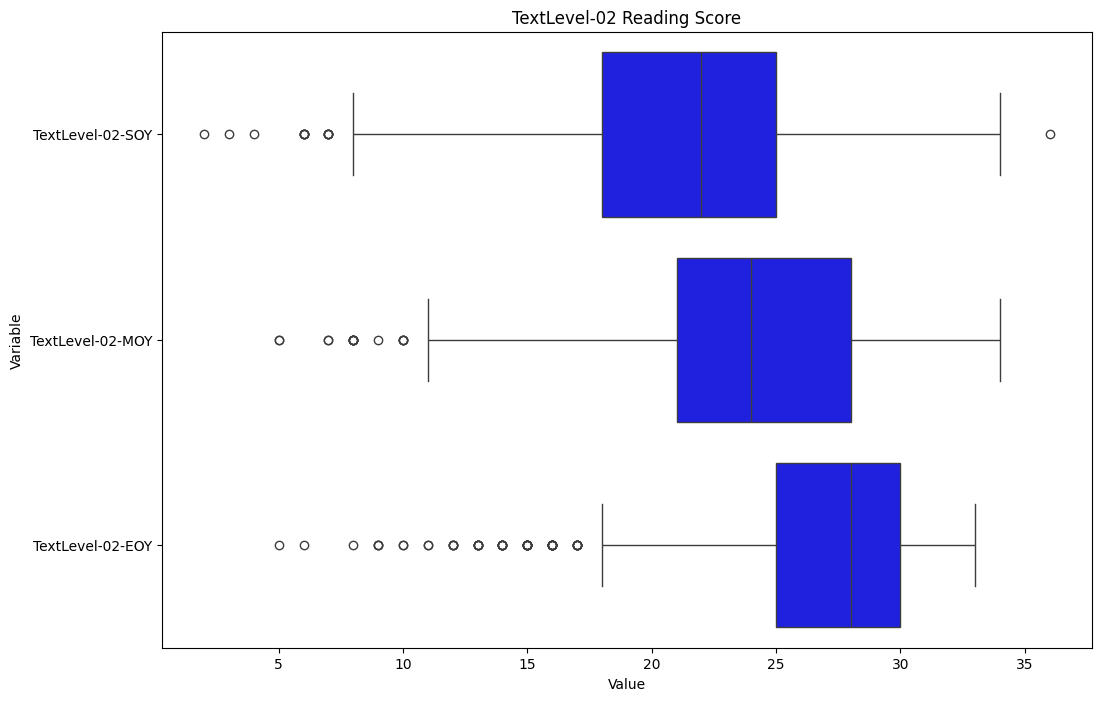

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


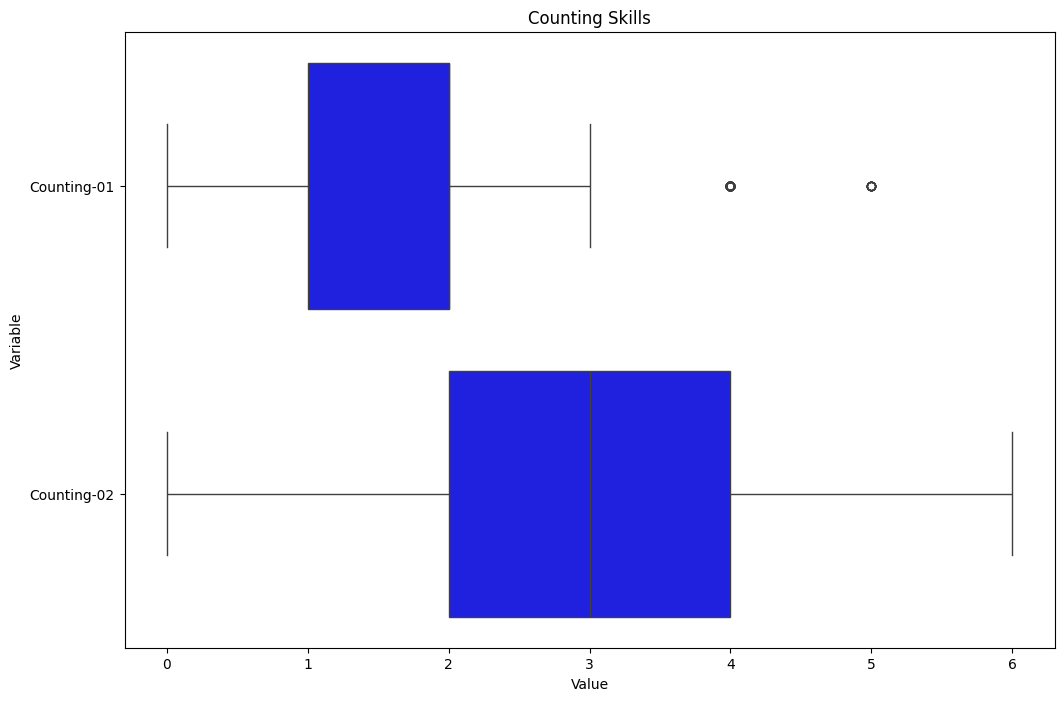

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


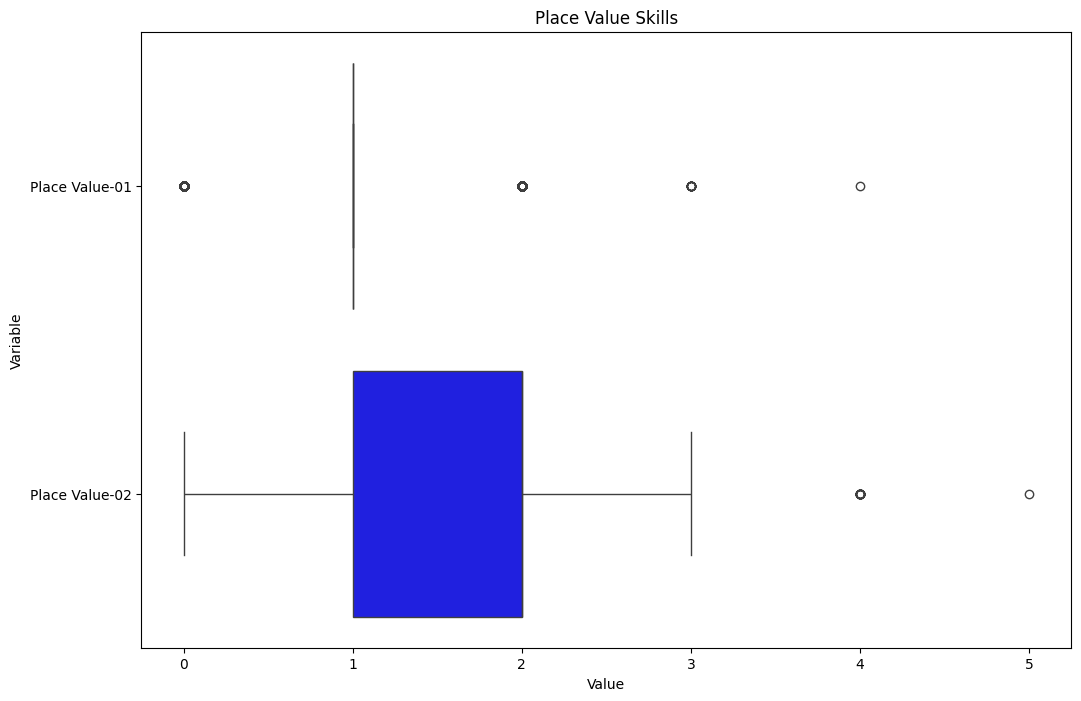

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


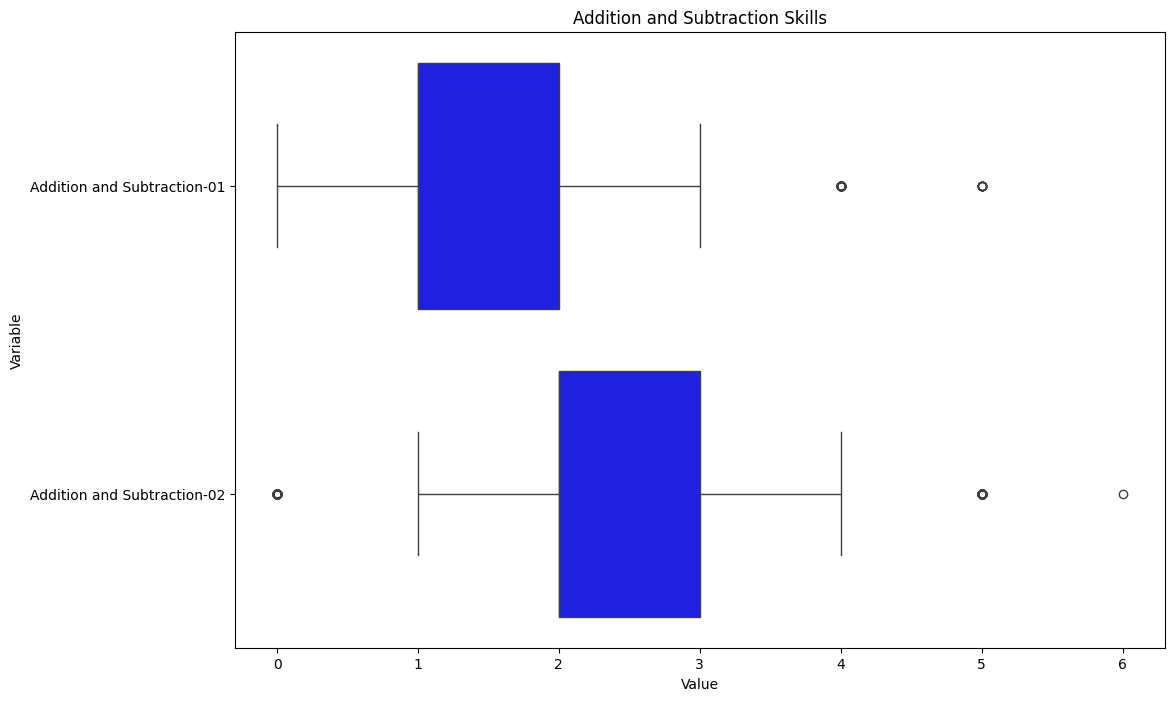

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


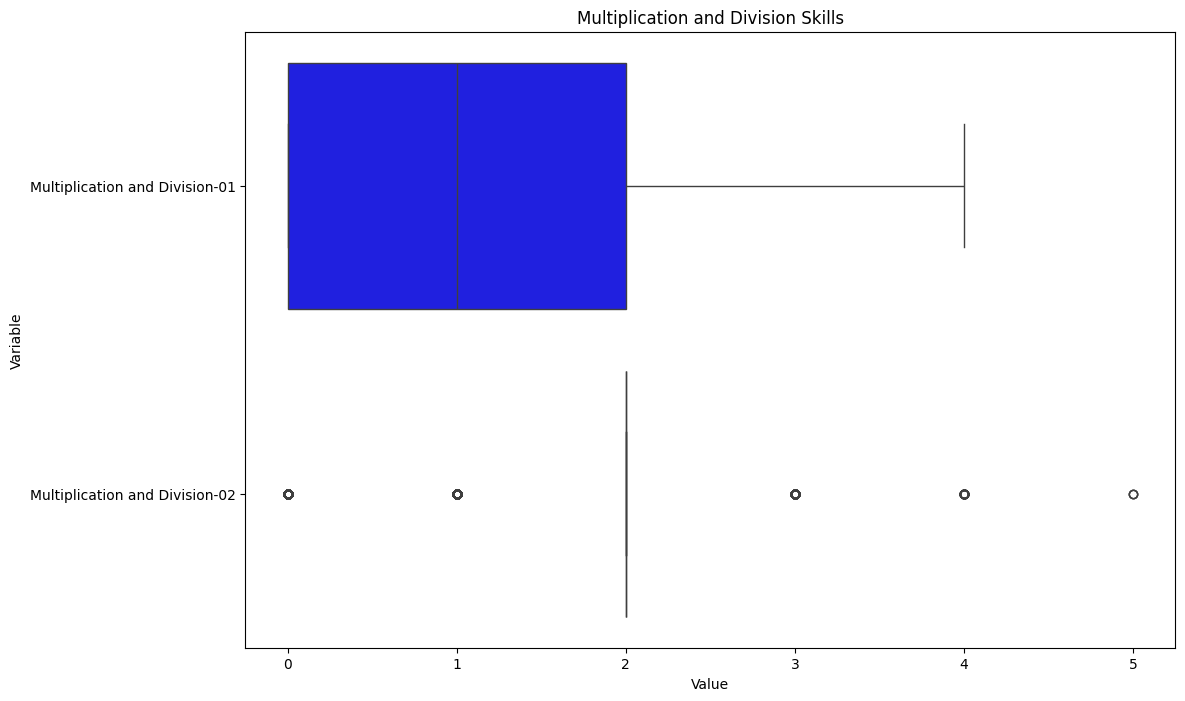

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


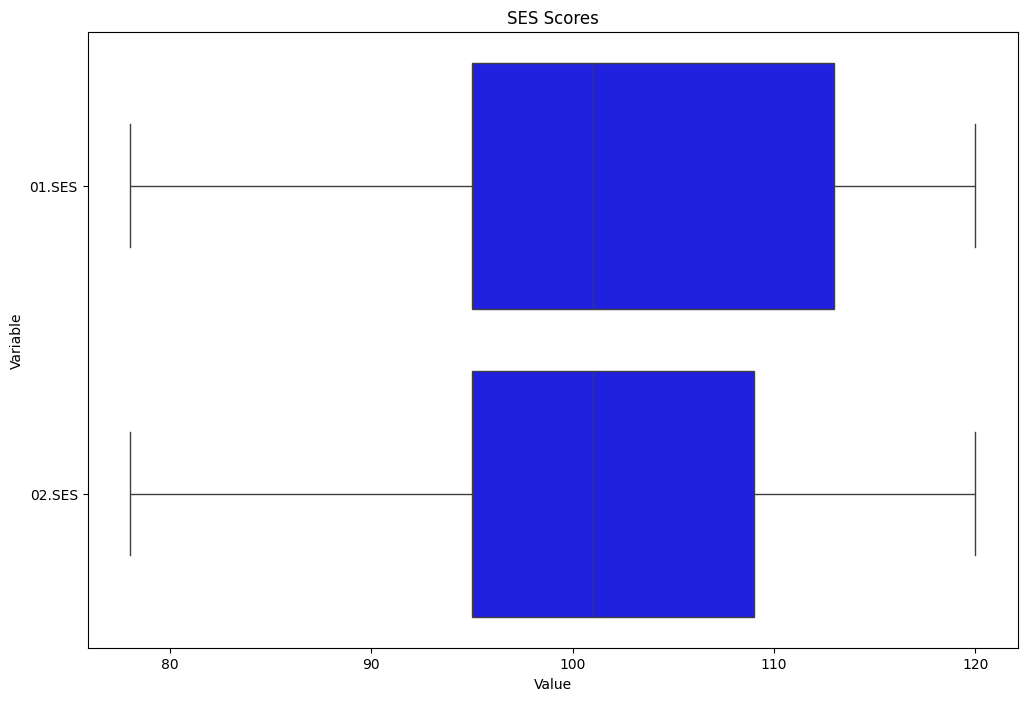

In [23]:
# Define groups of variables to plot together
variable_groups = {
    'Burt Reading Score': ['Burt-01-SOY', 'Burt-01-EOY'],
    'Clay Reading Score': ['Clay-01-SOY', 'Clay-01-EOY'],
    'TextLevel-01 Reading Score': ['TextLevel-01-SOY', 'TextLevel-01-MOY', 'TextLevel-01-EOY'],
    'TextLevel-02 Reading Score': ['TextLevel-02-SOY', 'TextLevel-02-MOY', 'TextLevel-02-EOY'],
    'Counting Skills': ['Counting-01', 'Counting-02'],
    'Place Value Skills': ['Place Value-01', 'Place Value-02'],
    'Addition and Subtraction Skills': ['Addition and Subtraction-01', 'Addition and Subtraction-02'],
    'Multiplication and Division Skills': ['Multiplication and Division-01', 'Multiplication and Division-02'],
    'SES Scores': ['01.SES', '02.SES']
}

# Iterate over each group of variables and create boxplots
for group_name, vars in variable_groups.items():
    # Filter columns that exist in the DataFrame
    existing_vars = [var for var in vars if var in schools.columns]

    if existing_vars:
        # Create the boxplot with solid blue color
        plt.figure(figsize=(12, 8))
        sns.boxplot(data=schools[existing_vars], orient='h', color='blue')

        # Set a custom title based on the group name
        plt.title(f'{group_name}')
        plt.xlabel('Value')
        plt.ylabel('Variable')

        # Display the plot
        plt.show()
    else:
        print(f"None of the variables in the group '{group_name}' were found in the DataFrame.")

In [24]:
#treating outliers for Clay-01-SOY

# Define a function to calculate the outliers and bounds
def get_outliers(df, var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound  # Ensure only lower and upper bounds are returned


# Define a function to cap the outliers using Winsorization
def cap_outliers(df, var):
    lower_bound, upper_bound = get_outliers(df, var)

    # Cap values below the lower bound and above the upper bound
    df[var] = df[var].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return df

# Apply the capping function to 'Clay-01-SOY' in the 'schools' dataset
schools = cap_outliers(schools, 'Clay-01-SOY')

# Verify the result
print(schools['Clay-01-SOY'].describe())

count   2000.000
mean       1.909
std        2.753
min        0.000
25%        0.000
50%        0.000
75%        3.000
max        7.500
Name: Clay-01-SOY, dtype: float64


In [25]:
# Calculate the lower and upper bounds for the winsorized data
lower_bound, upper_bound = get_outliers(schools, 'Clay-01-SOY')

# Filter out potential outliers in the winsorized data
outliers_after_winsorization = schools[(schools['Clay-01-SOY'] < lower_bound) | (schools['Clay-01-SOY'] > upper_bound)]

# Display the outliers after Winsorization
print(f"Number of potential outliers after Winsorization: {len(outliers_after_winsorization)}")
print(outliers_after_winsorization)

Number of potential outliers after Winsorization: 0
Empty DataFrame
Columns: [Gender, Year_02, Kinder_Age, Disability, NCCD-Funded, 01.SES, 02.SES, NumSibling, SiblingOrder, NumAbvYear9, NumAbvDiploma, NumProf, Burt-01-SOY, Burt-01-EOY, Clay-01-SOY, Clay-01-EOY, TextLevel-01-SOY, TextLevel-01-MOY, TextLevel-01-EOY, TextLevel-02-SOY, TextLevel-02-MOY, TextLevel-02-EOY, WritingVocab-01-SOY, HRSIW-01-SOY, Counting-01, Counting-02, Place Value-01, Place Value-02, Addition and Subtraction-01, Addition and Subtraction-02, Multiplication and Division-01, Multiplication and Division-02, Year3_Writing_At_Risk]
Index: []

[0 rows x 33 columns]


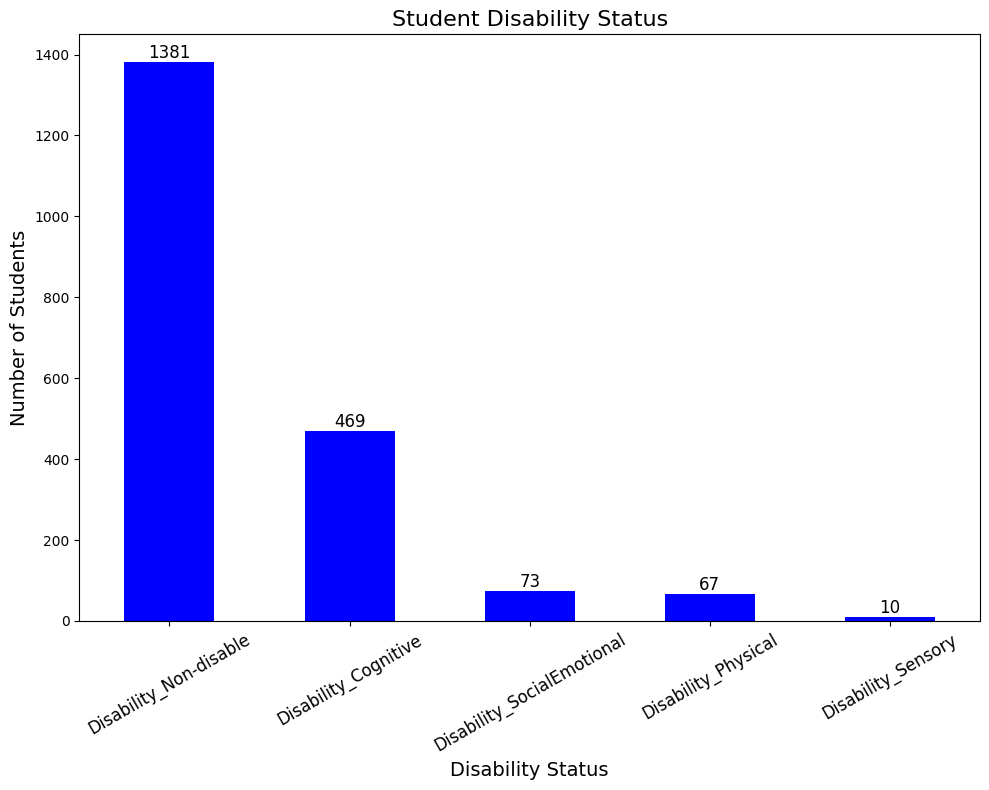

In [26]:
# Count the occurrences of each category in the 'Disability' variable
disability_counts = schools['Disability'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 8))
ax = disability_counts.plot(kind='bar', color='blue')

# Add title and labels
plt.title('Student Disability Status', fontsize=16)
plt.xlabel('Disability Status', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

# Rotate x-axis labels by 30 degrees
plt.xticks(rotation=30, fontsize=12)

# Add the actual counts on top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [27]:
# Calculate the percentage of each group
disability_percentages = (disability_counts / disability_counts.sum()) * 100

# Create a table with counts and percentages
disability_table = pd.DataFrame({
    'Count': disability_counts,
    'Percentage (%)': disability_percentages
})

# Display the table
print(disability_table)

                            Count  Percentage (%)
Disability                                       
Disability_Non-disable       1381          69.050
Disability_Cognitive          469          23.450
Disability_SocialEmotional     73           3.650
Disability_Physical            67           3.350
Disability_Sensory             10           0.500


In [28]:
# Filter out 'Non-disable' category
disability_only_counts = schools[schools['Disability'] != 'Disability_Non-disable']['Disability'].value_counts()

# Calculate the percentage within the disability group
disability_only_percentages = (disability_only_counts / disability_only_counts.sum()) * 100

# Create a table with counts and percentages
disability_only_table = pd.DataFrame({
    'Count': disability_only_counts,
    'Percentage (%)': disability_only_percentages
})

# Display the table
print(disability_only_table)

                            Count  Percentage (%)
Disability                                       
Disability_Cognitive          469          75.767
Disability_SocialEmotional     73          11.793
Disability_Physical            67          10.824
Disability_Sensory             10           1.616


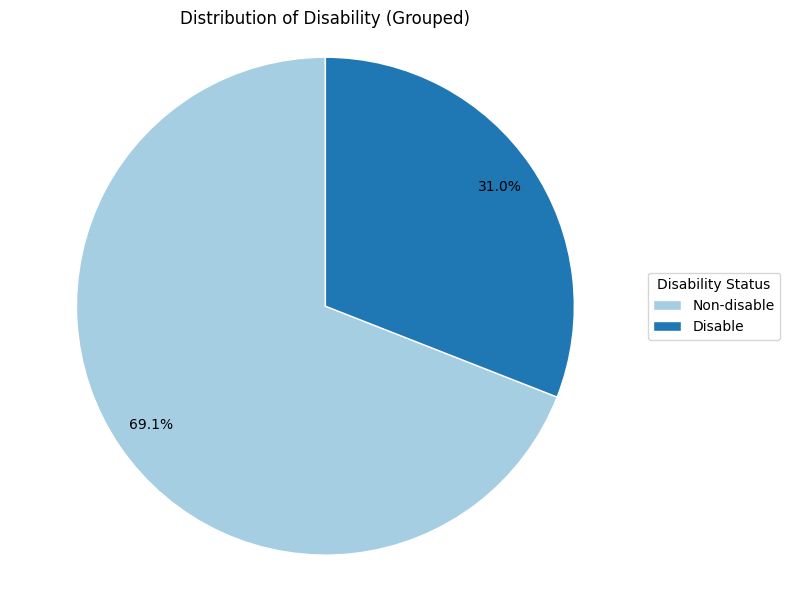

In [29]:
# Group disabled students into one category
schools['Disability_Grouped'] = schools['Disability'].replace({
    'Disability_Non-disable': 'Non-disable',
    'Disability_Cognitive': 'Disable',
    'Disability_Physical': 'Disable',
    'Disability_Sensory': 'Disable',
    'Disability_SocialEmotional': 'Disable'
})

# Count the occurrences of each category in the grouped 'Disability' variable
disability_counts_grouped = schools['Disability_Grouped'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))

# Plot the pie chart with the grouped categories
wedges, texts, autotexts = plt.pie(disability_counts_grouped,
                                   startangle=90,
                                   colors=plt.cm.Paired.colors,
                                   wedgeprops=dict(edgecolor='w'),
                                   autopct=lambda p: '{:.1f}%'.format(p) if p > 5 else '',  # Only show % for wedges larger than 5%
                                   pctdistance=0.85)

# Adjust the size of the text on the wedges
for autotext in autotexts:
    autotext.set_size(10)

# Adding a legend outside the pie chart
plt.legend(wedges, disability_counts_grouped.index, title="Disability Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Set aspect ratio to be equal
plt.axis('equal')
plt.title('Distribution of Disability (Grouped)')
plt.tight_layout()
plt.show()


## **2.3. Bivariate Analysis**





In [30]:
# Calculate summary statistics
table_01_ses = schools.groupby(['Gender', 'Year_02'])['01.SES'].mean().reset_index()
table_02_ses = schools.groupby(['Gender', 'Year_02'])['02.SES'].mean().reset_index()

# Round the data to 2 decimal places
table_01_ses = table_01_ses.round(2)
table_02_ses = table_02_ses.round(2)

# Print the rounded tables
print("Summary Table 01.SES (Rounded to 2 Decimal Places):")
print(table_01_ses)
print("\nSummary Table 02.SES (Rounded to 2 Decimal Places):")
print(table_02_ses)

Summary Table 01.SES (Rounded to 2 Decimal Places):
   Gender  Year_02  01.SES
0  Female     2016 107.070
1  Female     2017 101.320
2  Female     2018 101.280
3  Female     2020 103.250
4  Female     2021 103.530
5    Male     2016 107.910
6    Male     2017 101.140
7    Male     2018 102.580
8    Male     2020 103.350
9    Male     2021 101.940

Summary Table 02.SES (Rounded to 2 Decimal Places):
   Gender  Year_02  02.SES
0  Female     2016 107.100
1  Female     2017 101.300
2  Female     2018 101.280
3  Female     2020 103.280
4  Female     2021  97.540
5    Male     2016 108.060
6    Male     2017 101.160
7    Male     2018 102.560
8    Male     2020 103.330
9    Male     2021  96.580


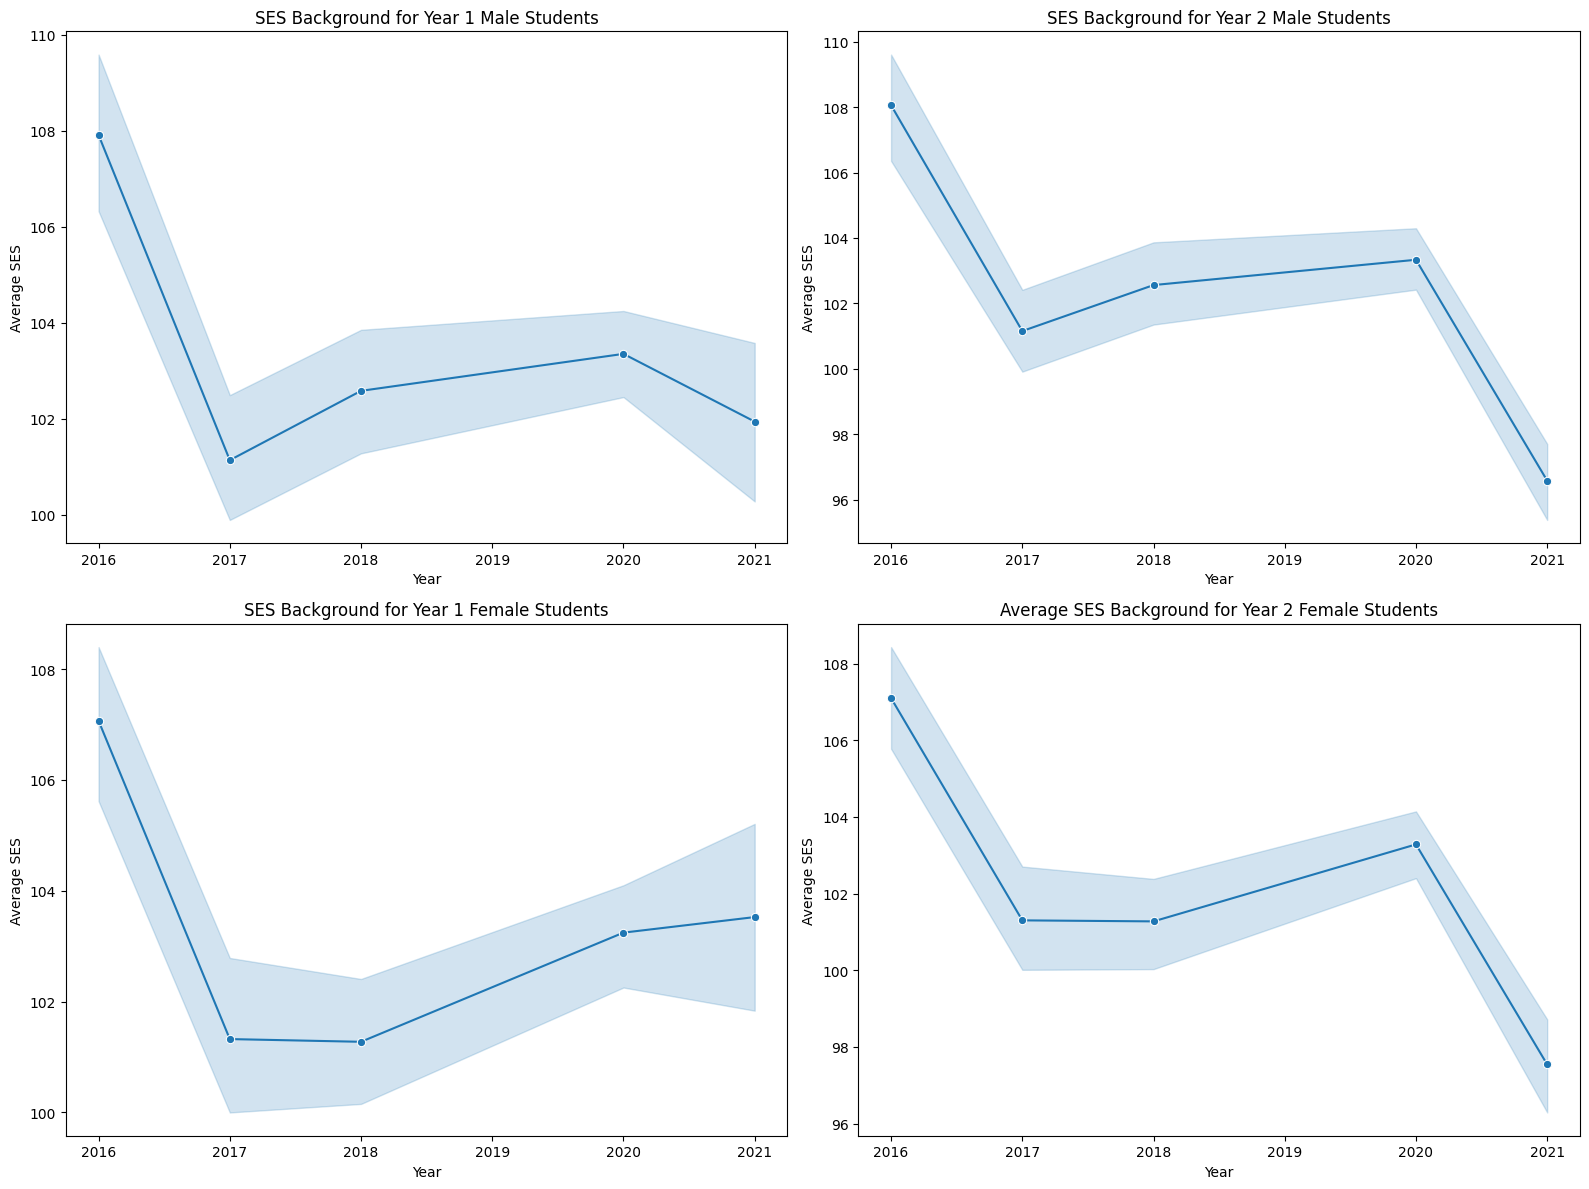

In [31]:
# Filter the dataset for male and female students
male_students = schools[schools['Gender'] == 'Male']
female_students = schools[schools['Gender'] == 'Female']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Line chart for '01.SES' for male students
sns.lineplot(data=male_students, x='Year_02', y='01.SES', marker='o', ax=axes[0, 0])
axes[0, 0].set_title('SES Background for Year 1 Male Students')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Average SES')

# Line chart for '02.SES' for male students
sns.lineplot(data=male_students, x='Year_02', y='02.SES', marker='o', ax=axes[0, 1])
axes[0, 1].set_title('SES Background for Year 2 Male Students')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Average SES')

# Line chart for '01.SES' for female students
sns.lineplot(data=female_students, x='Year_02', y='01.SES', marker='o', ax=axes[1, 0])
axes[1, 0].set_title('SES Background for Year 1 Female Students')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Average SES')

# Line chart for '02.SES' for female students
sns.lineplot(data=female_students, x='Year_02', y='02.SES', marker='o', ax=axes[1, 1])
axes[1, 1].set_title('Average SES Background for Year 2 Female Students')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Average SES')

# Adjust layout
plt.tight_layout()
plt.show()


Average 01.SES by Number of Siblings (Rounded to 2 Decimal Places):
   NumSibling  01.SES
0           1 102.490
1           2 103.620
2           3 103.070
3           4 101.480
4           5 100.080
5           6  95.480
6           7  87.670

Average 02.SES by Number of Siblings (Rounded to 2 Decimal Places):
   NumSibling  02.SES
0           1 101.530
1           2 102.750
2           3 102.250
3           4 101.050
4           5  99.500
5           6  95.290
6           7  87.670


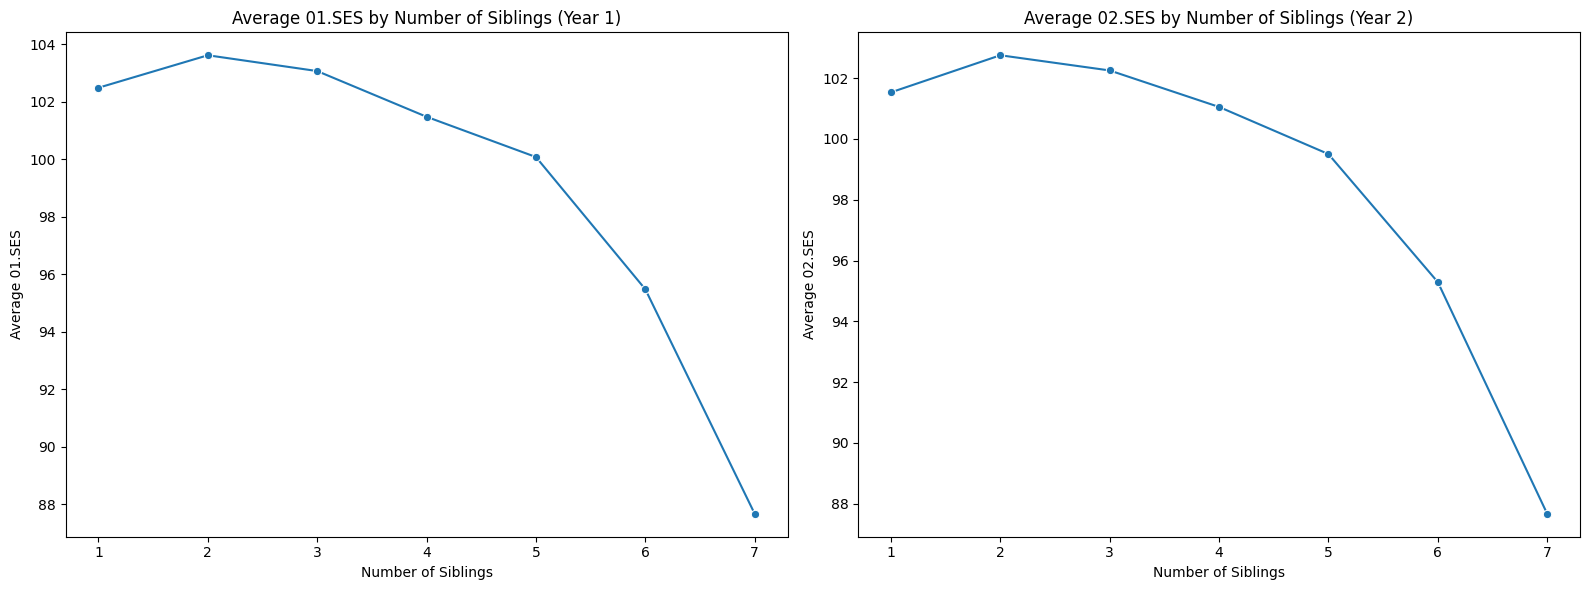

In [32]:
# Calculate the mean SES for each number of siblings
num_sibling_01_ses = schools.groupby('NumSibling')['01.SES'].mean().reset_index()
num_sibling_02_ses = schools.groupby('NumSibling')['02.SES'].mean().reset_index()

# Round the values to 2 decimal places for the table
num_sibling_01_ses['01.SES'] = num_sibling_01_ses['01.SES'].round(2)
num_sibling_02_ses['02.SES'] = num_sibling_02_ses['02.SES'].round(2)

# Print the tables
print("Average 01.SES by Number of Siblings (Rounded to 2 Decimal Places):")
print(num_sibling_01_ses)
print("\nAverage 02.SES by Number of Siblings (Rounded to 2 Decimal Places):")
print(num_sibling_02_ses)

# Create a figure with subplots for both Year 1 and Year 2 SES
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Line chart for 01.SES (Year 1)
sns.lineplot(data=num_sibling_01_ses, x='NumSibling', y='01.SES', marker='o', ax=axes[0])
axes[0].set_title('Average 01.SES by Number of Siblings (Year 1)')
axes[0].set_xlabel('Number of Siblings')
axes[0].set_ylabel('Average 01.SES')

# Line chart for 02.SES (Year 2)
sns.lineplot(data=num_sibling_02_ses, x='NumSibling', y='02.SES', marker='o', ax=axes[1])
axes[1].set_title('Average 02.SES by Number of Siblings (Year 2)')
axes[1].set_xlabel('Number of Siblings')
axes[1].set_ylabel('Average 02.SES')

# Adjust layout
plt.tight_layout()
plt.show()

Average SES by Disability Status (Rounded to 2 Decimal Places):
                   Disability  01.SES  02.SES
0        Disability_Cognitive 102.720 101.600
1      Disability_Non-disable 103.230 102.510
2         Disability_Physical 102.280 101.460
3          Disability_Sensory  98.000  97.300
4  Disability_SocialEmotional 100.140  99.270


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

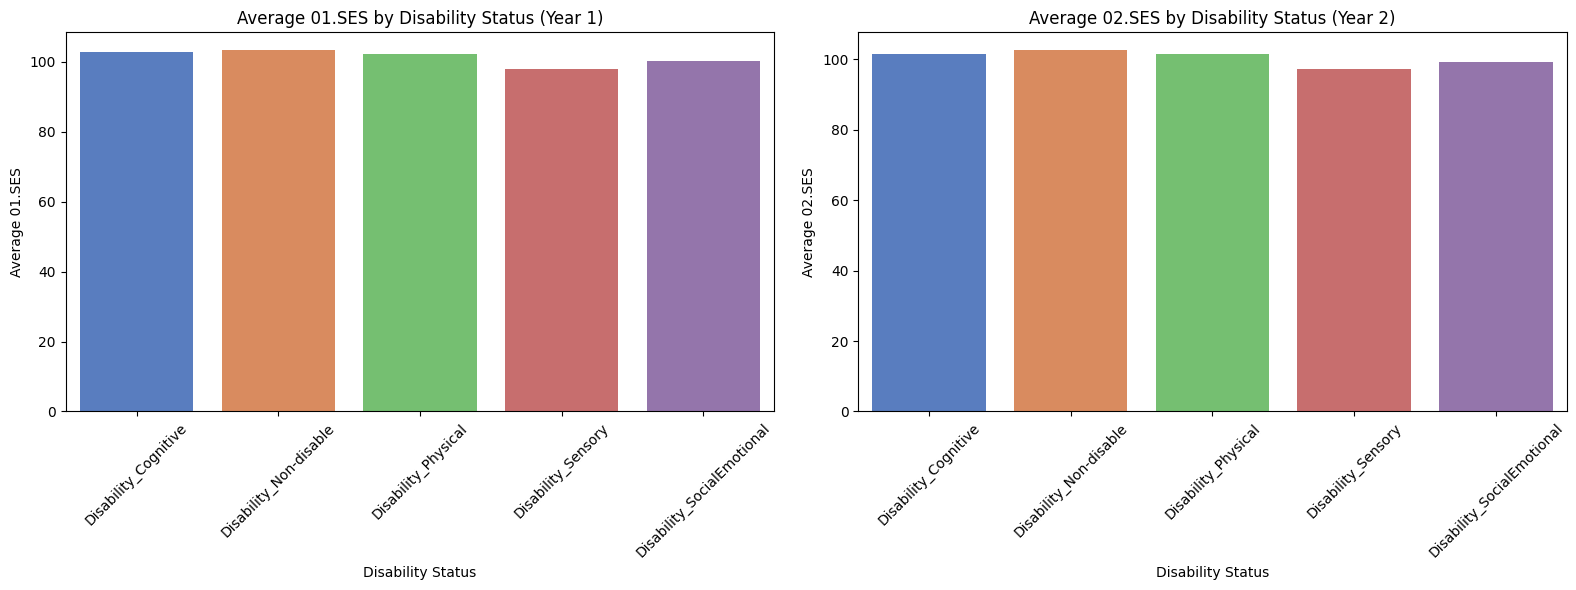

In [33]:
# Calculate the mean SES for each disability category
disability_01_ses = schools.groupby('Disability')['01.SES'].mean().reset_index()
disability_02_ses = schools.groupby('Disability')['02.SES'].mean().reset_index()

# Round the values to 2 decimal places for the table
disability_01_ses['01.SES'] = disability_01_ses['01.SES'].round(2)
disability_02_ses['02.SES'] = disability_02_ses['02.SES'].round(2)

# Merge the two tables for easier viewing
disability_ses_table = pd.merge(disability_01_ses, disability_02_ses, on='Disability')

# Print the table
print("Average SES by Disability Status (Rounded to 2 Decimal Places):")
print(disability_ses_table)

# Create a figure with subplots for both Year 1 and Year 2 SES
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart for 01.SES (Year 1)
sns.barplot(data=disability_01_ses, x='Disability', y='01.SES', hue='Disability', ax=axes[0], palette='muted', legend=False)
axes[0].set_title('Average 01.SES by Disability Status (Year 1)')
axes[0].set_xlabel('Disability Status')
axes[0].set_ylabel('Average 01.SES')
axes[0].tick_params(axis='x', rotation=45)

# Bar chart for 02.SES (Year 2)
sns.barplot(data=disability_02_ses, x='Disability', y='02.SES', hue='Disability', ax=axes[1], palette='muted', legend=False)
axes[1].set_title('Average 02.SES by Disability Status (Year 2)')
axes[1].set_xlabel('Disability Status')
axes[1].set_ylabel('Average 02.SES')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()



Average 01.SES by Number of Parents with Qualification Level Above Diploma (Rounded to 2 Decimal Places):
   NumAbvDiploma  01.SES
0              0 100.930
1              1 103.350
2              2 105.320

Average 02.SES by Number of Parents with Qualification Level Above Diploma (Rounded to 2 Decimal Places):
   NumAbvDiploma  02.SES
0              0 100.500
1              1 102.460
2              2 104.010

Average 01.SES by Number of Parents in Professional-Level Occupation (Rounded to 2 Decimal Places):
   NumProf  01.SES
0        0 100.290
1        1 104.160
2        2 106.720

Average 02.SES by Number of Parents in Professional-Level Occupation (Rounded to 2 Decimal Places):
   NumProf  02.SES
0        0  99.700
1        1 103.260
2        2 105.520


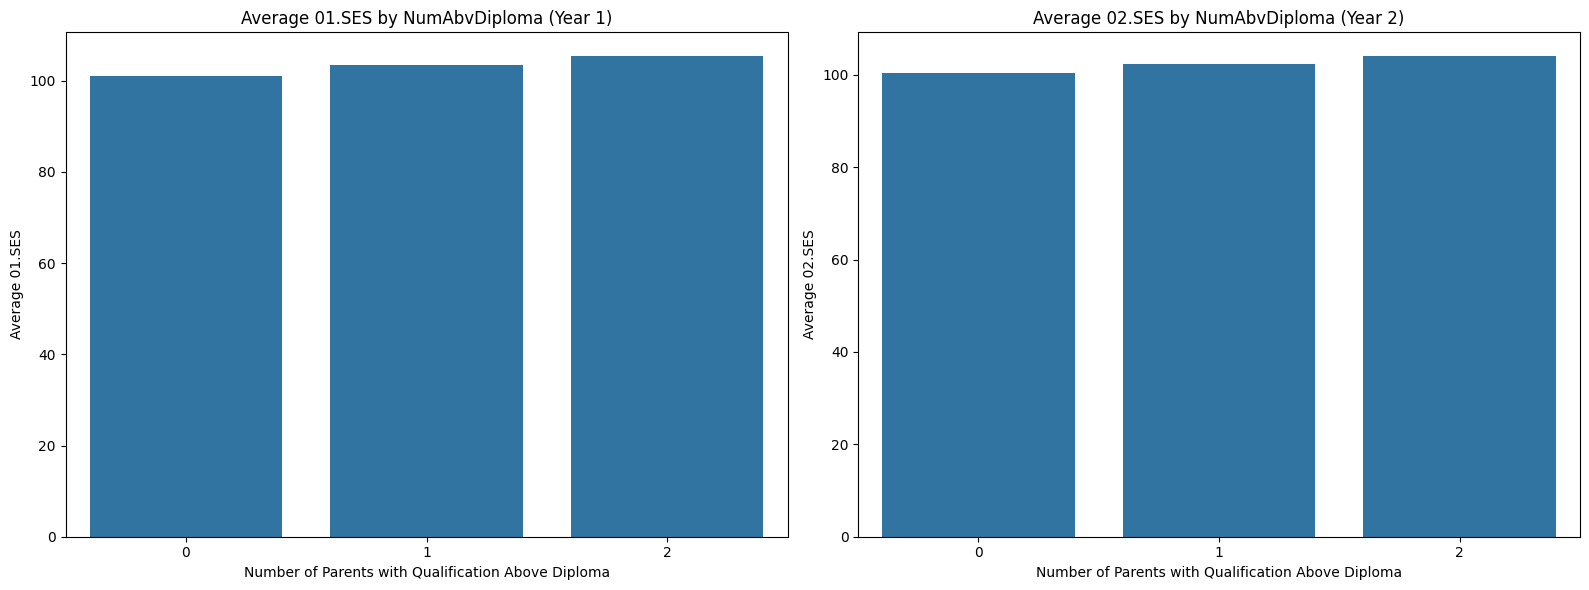

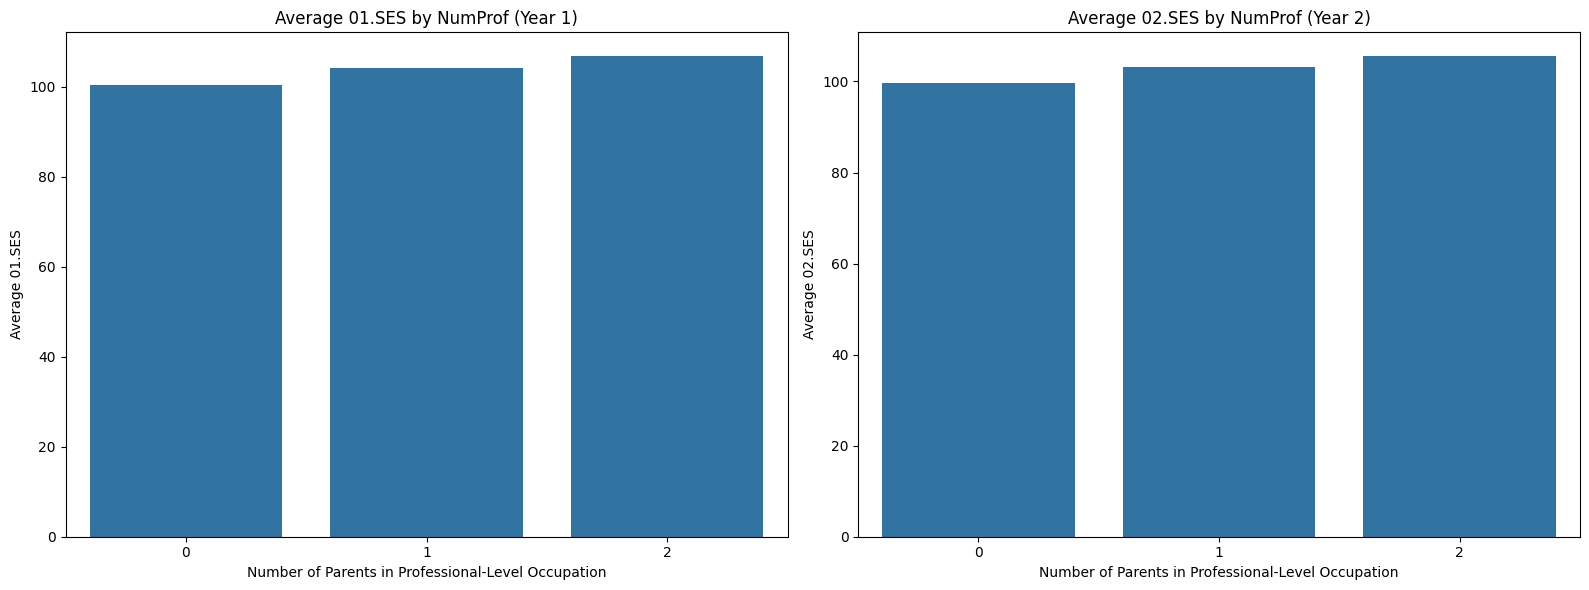

In [34]:
# Calculate the mean SES for NumAbvDiploma (Qualification) and NumProf (Occupation)
qualification_01_ses = schools.groupby('NumAbvDiploma')['01.SES'].mean().reset_index()
qualification_02_ses = schools.groupby('NumAbvDiploma')['02.SES'].mean().reset_index()

occupation_01_ses = schools.groupby('NumProf')['01.SES'].mean().reset_index()
occupation_02_ses = schools.groupby('NumProf')['02.SES'].mean().reset_index()

# Round the values to 2 decimal places for the tables
qualification_01_ses['01.SES'] = qualification_01_ses['01.SES'].round(2)
qualification_02_ses['02.SES'] = qualification_02_ses['02.SES'].round(2)

occupation_01_ses['01.SES'] = occupation_01_ses['01.SES'].round(2)
occupation_02_ses['02.SES'] = occupation_02_ses['02.SES'].round(2)

# Print the tables
print("Average 01.SES by Number of Parents with Qualification Level Above Diploma (Rounded to 2 Decimal Places):")
print(qualification_01_ses)
print("\nAverage 02.SES by Number of Parents with Qualification Level Above Diploma (Rounded to 2 Decimal Places):")
print(qualification_02_ses)

print("\nAverage 01.SES by Number of Parents in Professional-Level Occupation (Rounded to 2 Decimal Places):")
print(occupation_01_ses)
print("\nAverage 02.SES by Number of Parents in Professional-Level Occupation (Rounded to 2 Decimal Places):")
print(occupation_02_ses)

# Bar chart for Qualification (NumAbvDiploma)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart for 01.SES (Year 1) by Qualification (NumAbvDiploma)
sns.barplot(data=qualification_01_ses, x='NumAbvDiploma', y='01.SES', ax=axes[0])
axes[0].set_title('Average 01.SES by NumAbvDiploma (Year 1)')
axes[0].set_xlabel('Number of Parents with Qualification Above Diploma')
axes[0].set_ylabel('Average 01.SES')

# Bar chart for 02.SES (Year 2) by Qualification (NumAbvDiploma)
sns.barplot(data=qualification_02_ses, x='NumAbvDiploma', y='02.SES', ax=axes[1])
axes[1].set_title('Average 02.SES by NumAbvDiploma (Year 2)')
axes[1].set_xlabel('Number of Parents with Qualification Above Diploma')
axes[1].set_ylabel('Average 02.SES')

# Adjust layout for Qualification charts
plt.tight_layout()
plt.show()

# Bar chart for Occupation (NumProf)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart for 01.SES (Year 1) by Occupation (NumProf)
sns.barplot(data=occupation_01_ses, x='NumProf', y='01.SES', ax=axes[0])
axes[0].set_title('Average 01.SES by NumProf (Year 1)')
axes[0].set_xlabel('Number of Parents in Professional-Level Occupation')
axes[0].set_ylabel('Average 01.SES')

# Bar chart for 02.SES (Year 2) by Occupation (NumProf)
sns.barplot(data=occupation_02_ses, x='NumProf', y='02.SES', ax=axes[1])
axes[1].set_title('Average 02.SES by NumProf (Year 2)')
axes[1].set_xlabel('Number of Parents in Professional-Level Occupation')
axes[1].set_ylabel('Average 02.SES')

# Adjust layout for Occupation charts
plt.tight_layout()
plt.show()

Average Scores and Changes for Burt-01-SOY,  and Burt-01-EOY
         Burt-01-SOY  Burt-01-EOY  Score_Change
Year_02                                        
2016          24.023       39.946        15.923
2017          20.391       34.391        14.000
2018          19.533       33.745        14.212
2020          22.946       38.639        15.693
2021          20.546       37.325        16.780



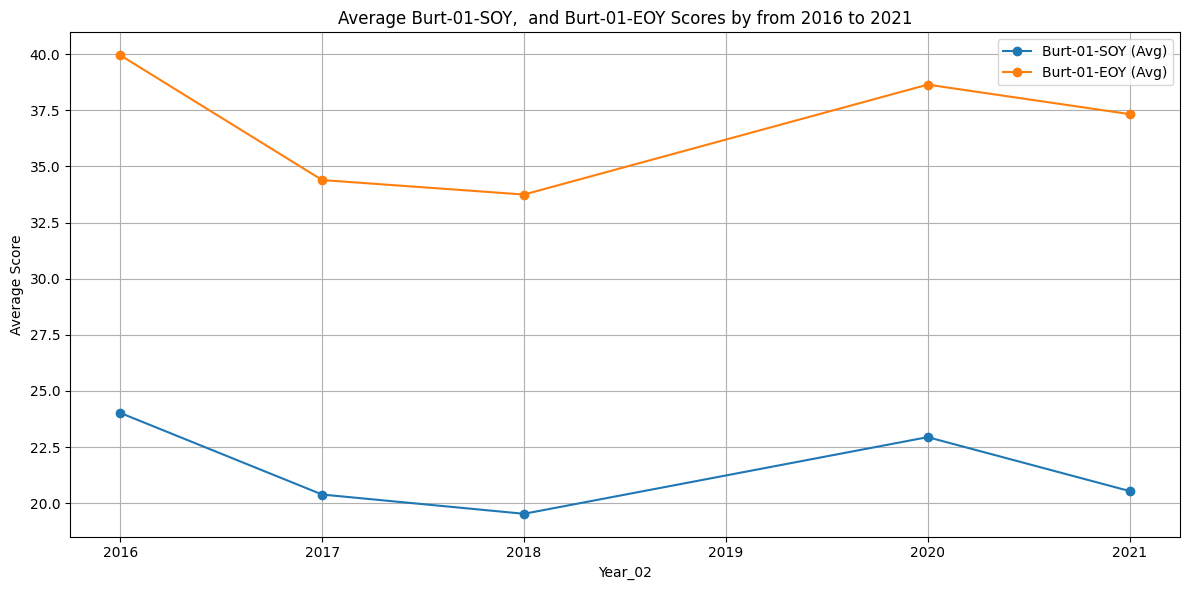

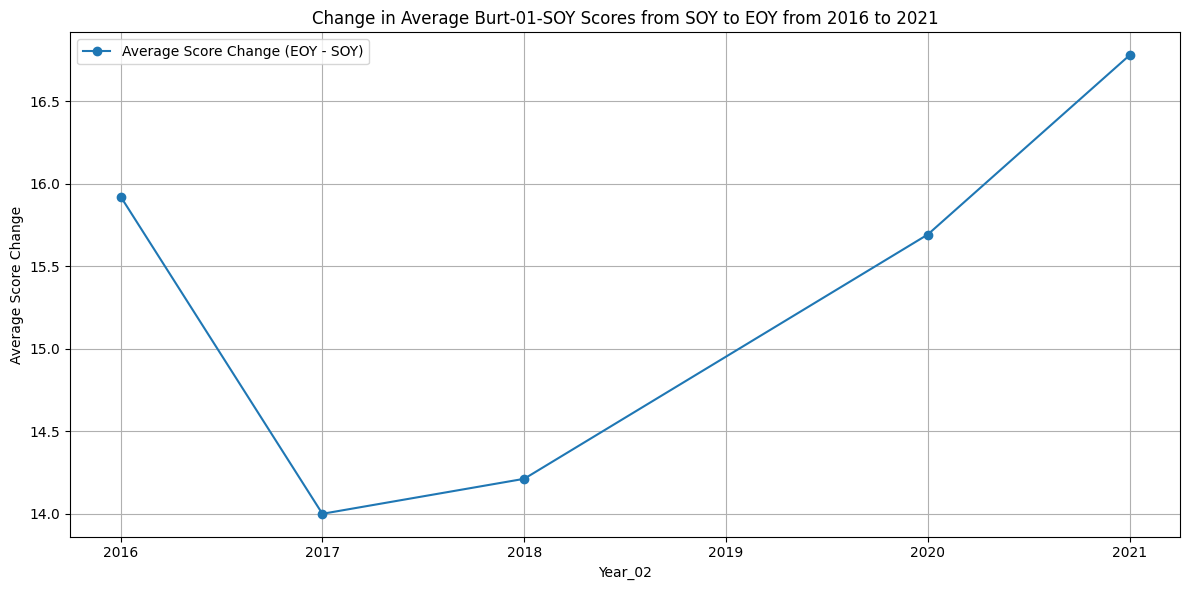

Average Scores and Changes for Clay-01-SOY,  and Clay-01-EOY
         Clay-01-SOY  Clay-01-EOY  Score_Change
Year_02                                        
2016           2.342        6.450         4.108
2017           2.065        6.544         4.479
2018           1.782        5.202         3.420
2020           1.896        5.386         3.490
2021           1.620        5.298         3.678



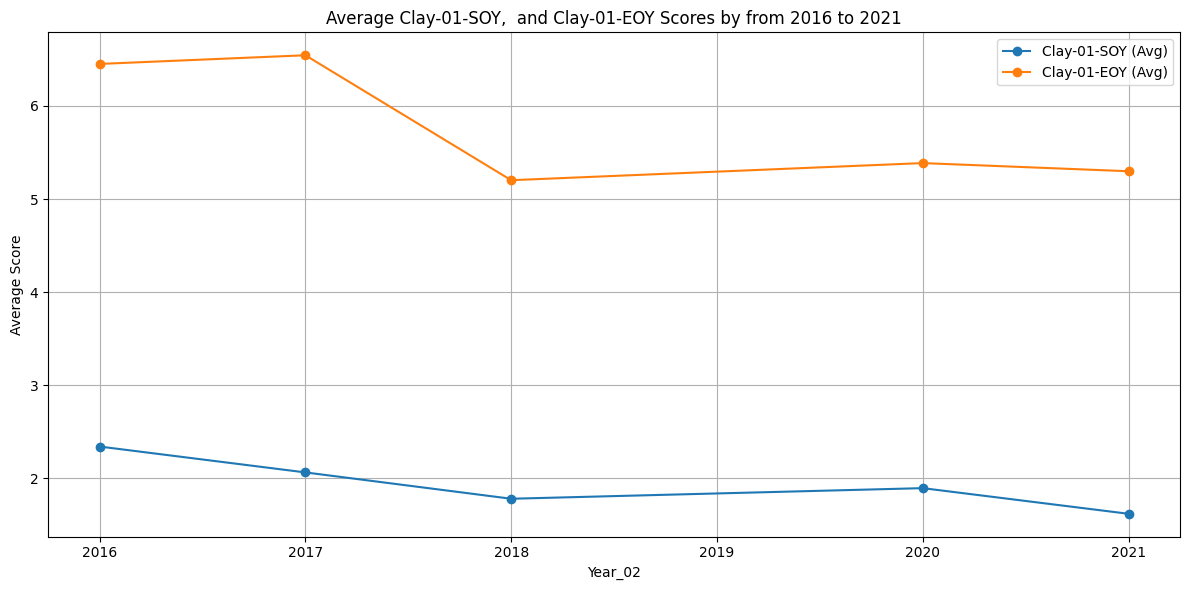

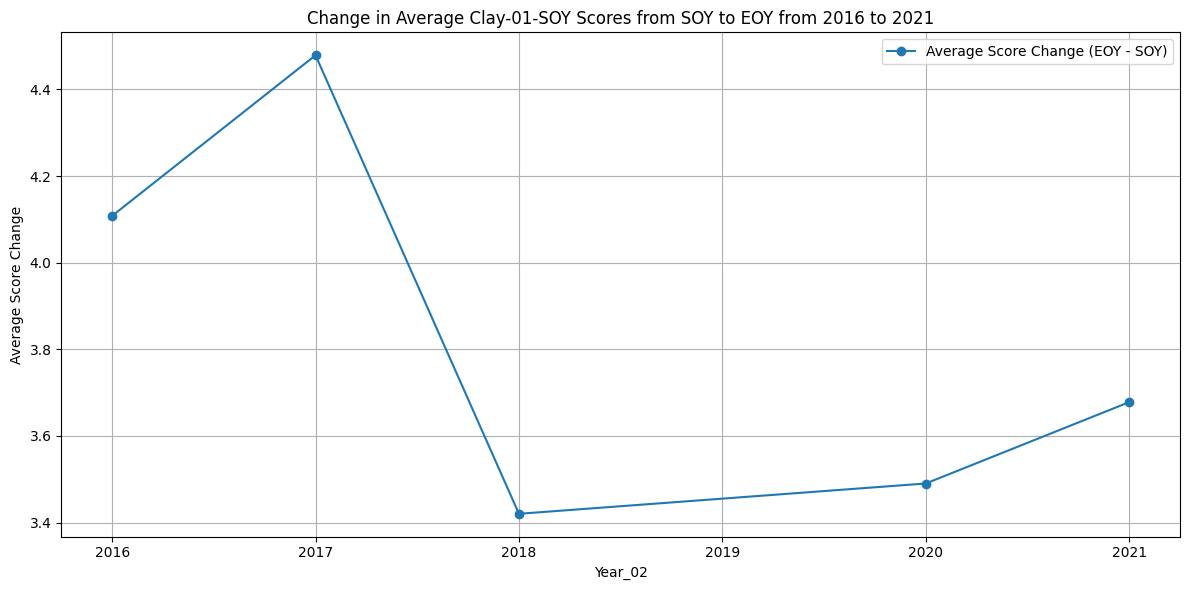

Average Scores and Changes for TextLevel-01-SOY, TextLevel-01-MOY and TextLevel-01-EOY
         TextLevel-01-SOY  TextLevel-01-EOY  TextLevel-01-MOY  Score_Change
Year_02                                                                    
2016               11.473            22.108            15.595        10.635
2017               10.153            20.459            14.644        10.306
2018                9.834            20.166            14.166        10.331
2020               11.782            22.025            16.213        10.243
2021               10.098            21.027            13.915        10.929



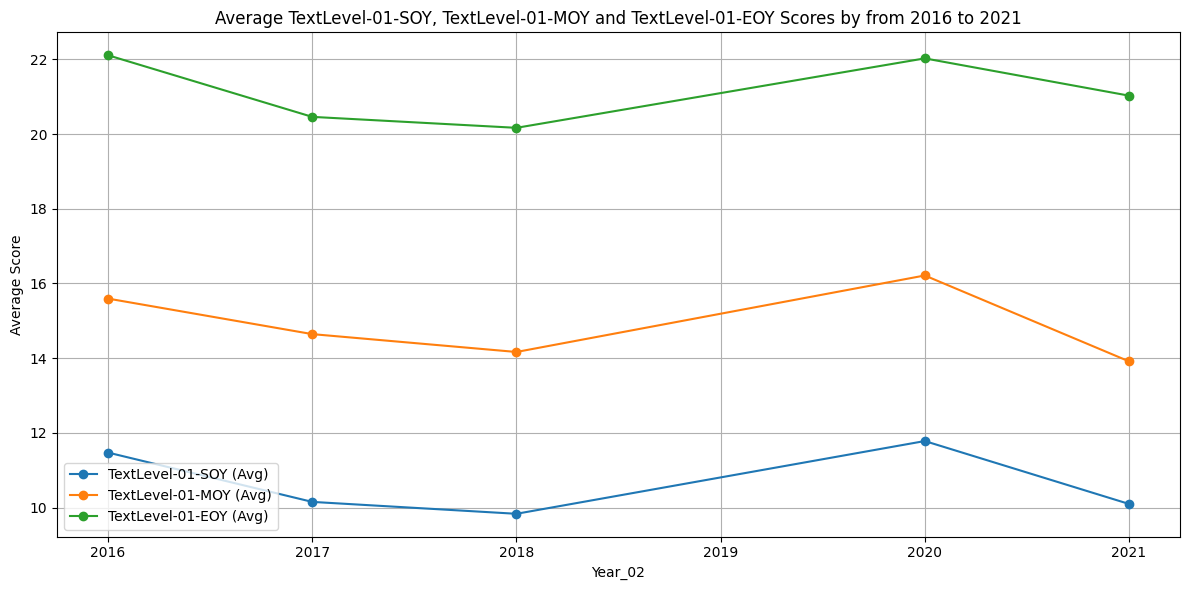

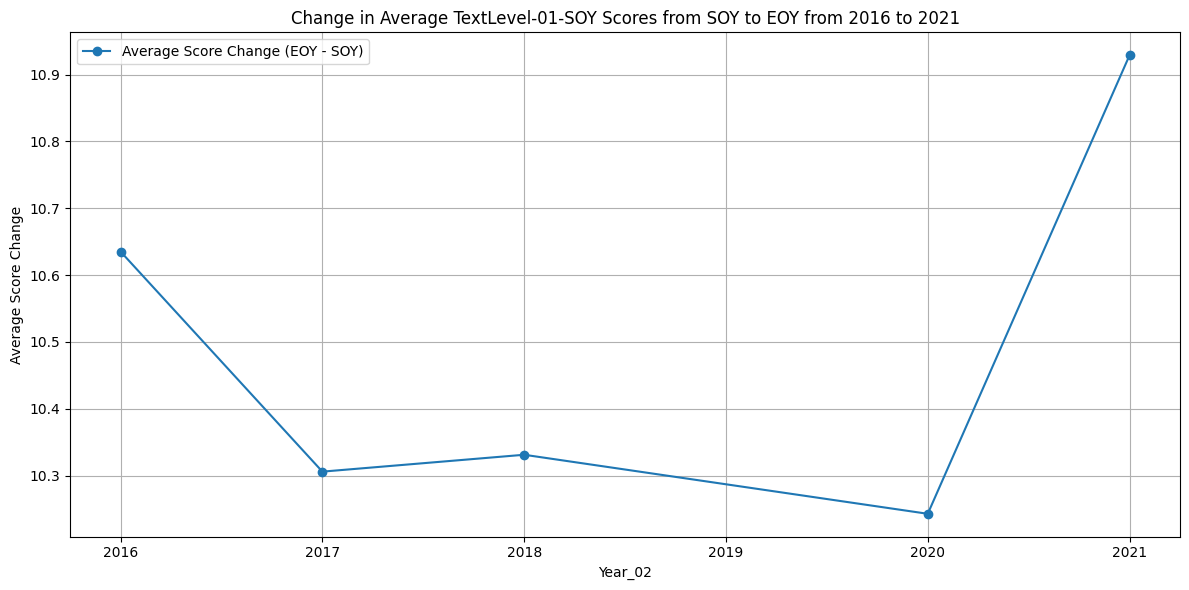

Average Scores and Changes for TextLevel-02-SOY, TextLevel-02-MOY and TextLevel-02-EOY
         TextLevel-02-SOY  TextLevel-02-EOY  TextLevel-02-MOY  Score_Change
Year_02                                                                    
2016               23.685            27.396            25.721         3.712
2017               20.752            26.491            22.945         5.739
2018               20.469            26.673            23.232         6.204
2020               22.683            27.445            24.521         4.762
2021               22.047            26.976            24.769         4.929



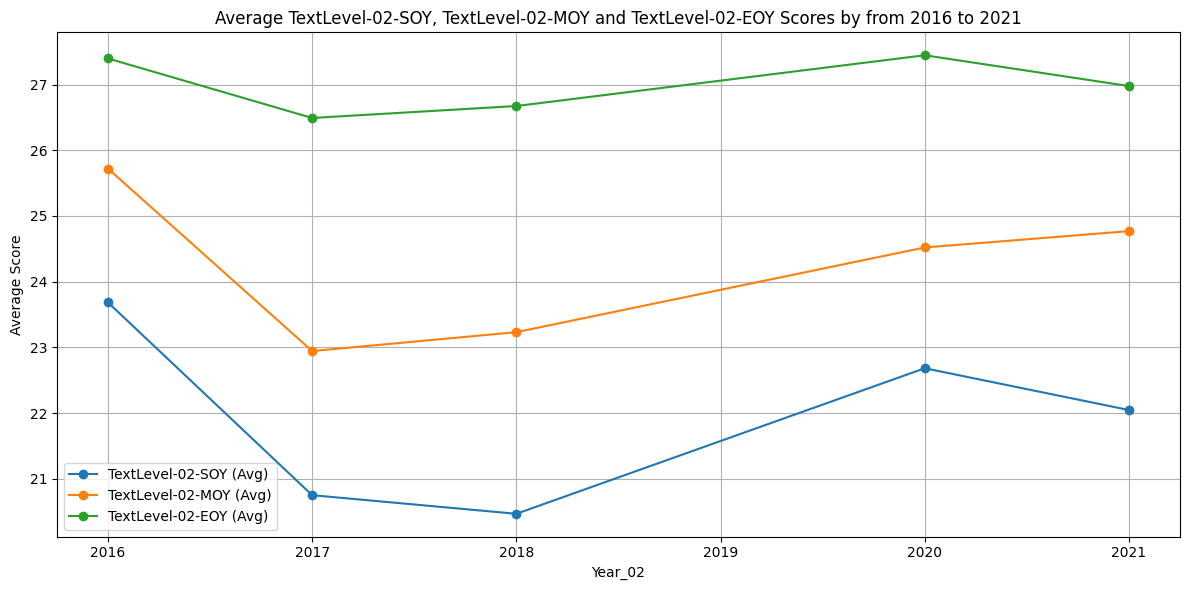

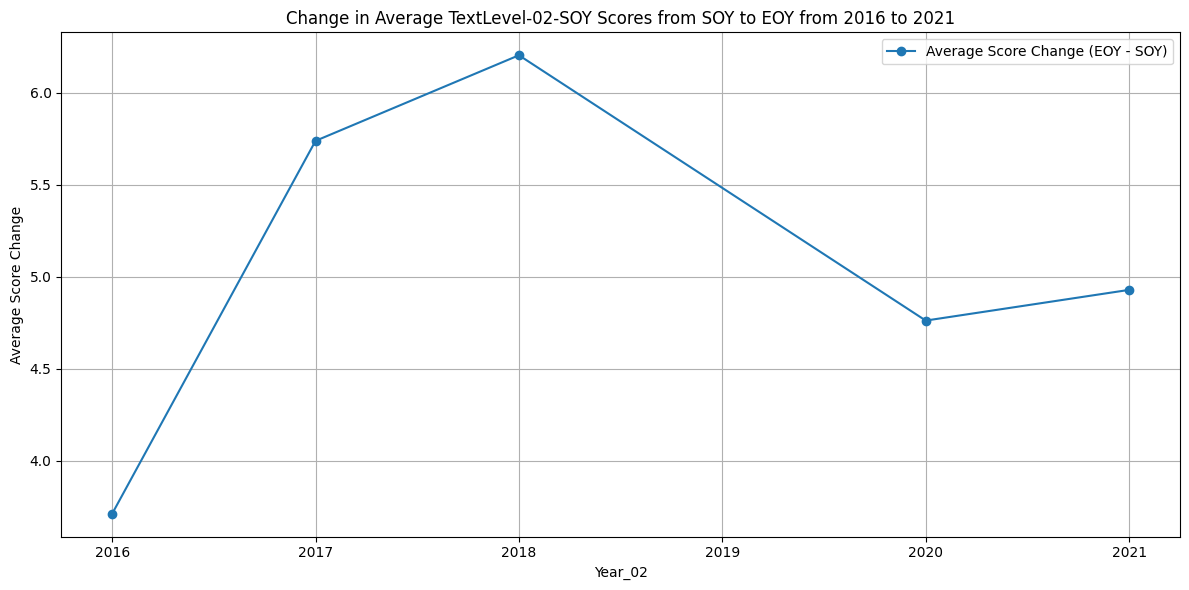

In [35]:
# List of student reading skill columns to analyze, including MOY data
student_reading_skill_columns = [
    ('Burt-01-SOY', 'Burt-01-EOY'),
    ('Clay-01-SOY', 'Clay-01-EOY'),
    ('TextLevel-01-SOY', 'TextLevel-01-EOY', 'TextLevel-01-MOY'),
    ('TextLevel-02-SOY', 'TextLevel-02-EOY', 'TextLevel-02-MOY')
]

# Loop through the columns and plot the average scores and changes
for cols in student_reading_skill_columns:
    if len(cols) == 2:
        soy_col, eoy_col = cols
        moy_col = None
    else:
        soy_col, eoy_col, moy_col = cols

    # Group by 'Year_02' and calculate the average score for SOY, MOY (if available), and EOY
    average_scores = schools.groupby('Year_02').agg({
        soy_col: 'mean',
        eoy_col: 'mean'
    })

    if moy_col:
        average_scores[moy_col] = schools.groupby('Year_02').agg({moy_col: 'mean'})

    # Calculate the difference between SOY and EOY averages
    average_scores['Score_Change'] = average_scores[eoy_col] - average_scores[soy_col]

    # Print the average scores and the score changes
    print(f"Average Scores and Changes for {soy_col}, {moy_col if moy_col else ''} and {eoy_col}")
    print(average_scores)
    print()

    # Plot the SOY, MOY (if available), and EOY average scores
    plt.figure(figsize=(12, 6))
    plt.plot(average_scores.index, average_scores[soy_col], label=f'{soy_col} (Avg)', marker='o')
    if moy_col:
        plt.plot(average_scores.index, average_scores[moy_col], label=f'{moy_col} (Avg)', marker='o')
    plt.plot(average_scores.index, average_scores[eoy_col], label=f'{eoy_col} (Avg)', marker='o')

    plt.xlabel('Year_02')
    plt.ylabel('Average Score')
    plt.title(f'Average {soy_col}, {moy_col if moy_col else ""} and {eoy_col} Scores by from 2016 to 2021')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot the changes in average score
    plt.figure(figsize=(12, 6))
    plt.plot(average_scores.index, average_scores['Score_Change'], label='Average Score Change (EOY - SOY)', marker='o')

    plt.xlabel('Year_02')
    plt.ylabel('Average Score Change')
    plt.title(f'Change in Average {soy_col} Scores from SOY to EOY from 2016 to 2021')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Average Scores Table:
Year_02
2016   25.005
2017   21.686
2018   20.186
2020   22.235
2021   22.827
Name: WritingVocab-01-SOY, dtype: float64


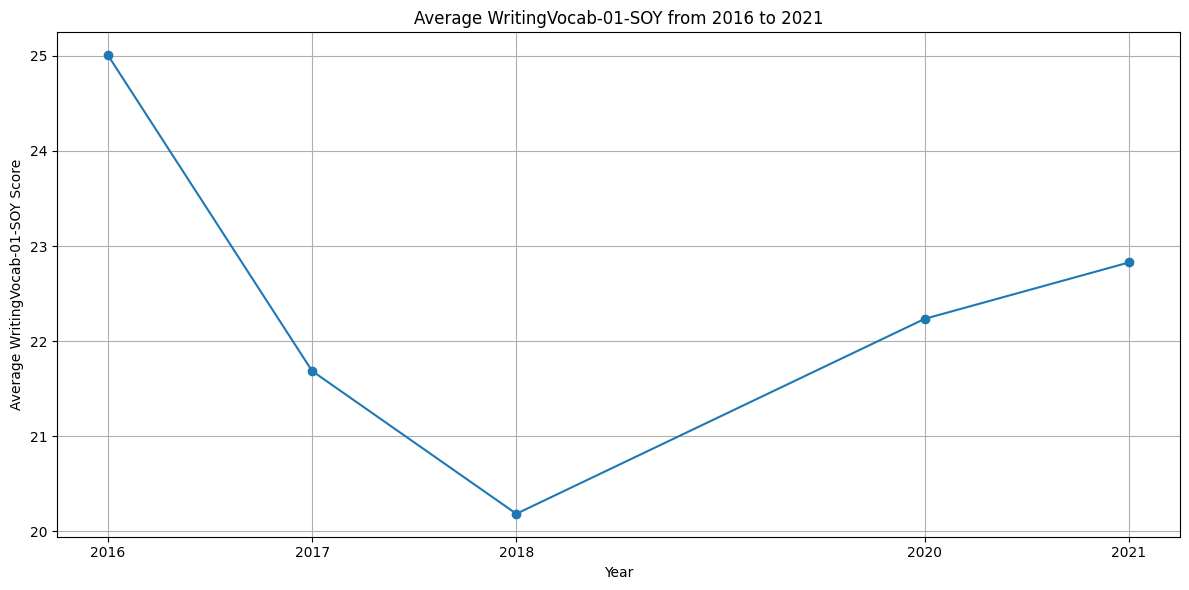

In [36]:
# Calculate the average WritingVocab-01-SOY scores grouped by Year
average_scores = schools.groupby('Year_02')['WritingVocab-01-SOY'].mean()

# Print the average scores as a table
print("\nAverage Scores Table:")
print(average_scores)

# Plotting the average WritingVocab-01-SOY scores over the years
plt.figure(figsize=(12, 6))
plt.plot(average_scores.index, average_scores.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average WritingVocab-01-SOY Score')
plt.title('Average WritingVocab-01-SOY from 2016 to 2021')
plt.grid(True)
plt.xticks(average_scores.index)  # Ensure all year labels are shown
plt.tight_layout()
plt.show()

Descriptive statistics for Burt-01-SOY:
                         count   mean    std   min    25%    50%    75%    max
Year3_Writing_At_Risk                                                         
False                 1334.000 24.250 11.080 1.000 17.000 24.000 30.000 77.000
True                   666.000 15.640  8.950 0.000  8.250 15.000 22.000 52.000




/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


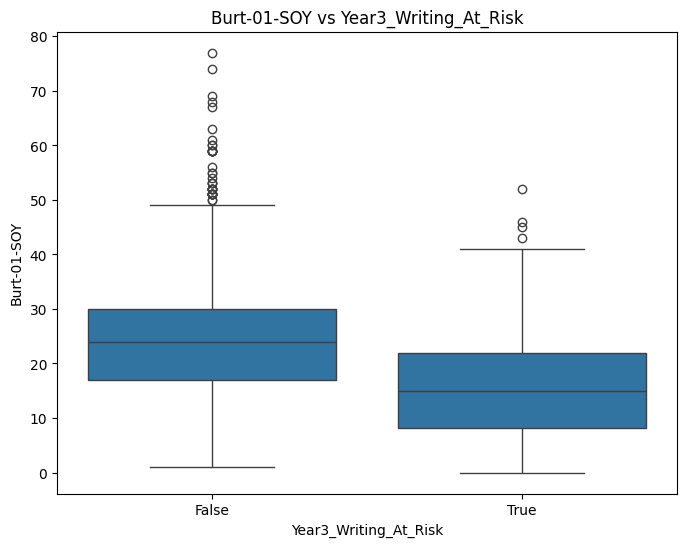

Descriptive statistics for Burt-01-EOY:
                         count   mean    std   min    25%    50%    75%  \
Year3_Writing_At_Risk                                                     
False                 1334.000 39.640 12.510 0.000 30.000 37.000 46.000   
True                   666.000 30.430  9.010 0.000 26.000 30.000 34.000   

                          max  
Year3_Writing_At_Risk          
False                 101.000  
True                   74.000  




/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


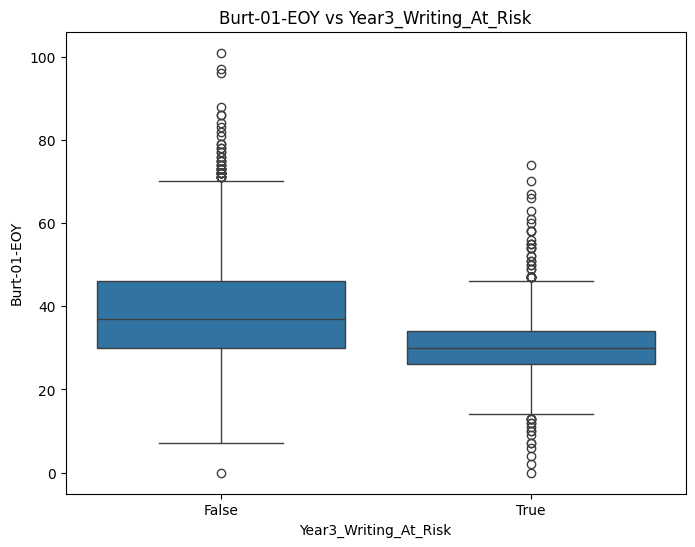

Descriptive statistics for Clay-01-SOY:
                         count  mean   std   min   25%   50%   75%   max
Year3_Writing_At_Risk                                                   
False                 1334.000 1.680 2.730 0.000 0.000 0.000 2.000 7.500
True                   666.000 2.360 2.760 0.000 0.000 1.000 4.000 7.500




/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


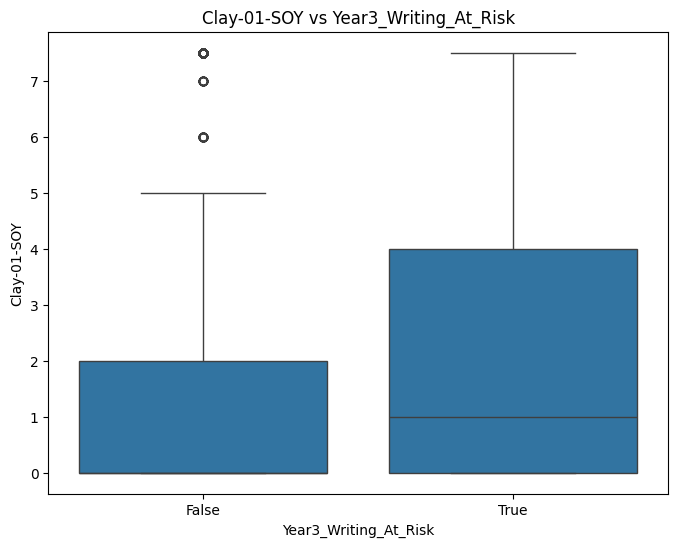

Descriptive statistics for Clay-01-EOY:
                         count  mean   std   min   25%    50%    75%    max
Year3_Writing_At_Risk                                                      
False                 1334.000 4.510 6.150 0.000 0.000  1.000 11.000 19.000
True                   666.000 7.980 6.490 0.000 0.000 11.000 14.000 20.000




/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


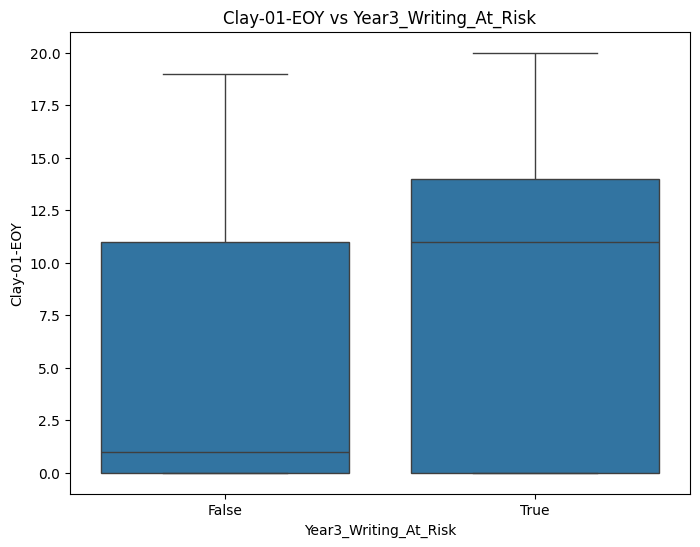

Descriptive statistics for TextLevel-01-SOY:
                         count   mean   std   min   25%    50%    75%    max
Year3_Writing_At_Risk                                                       
False                 1334.000 12.200 6.160 0.000 8.000 11.000 16.000 34.000
True                   666.000  7.730 4.660 0.000 4.000  7.000 11.000 30.000




/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


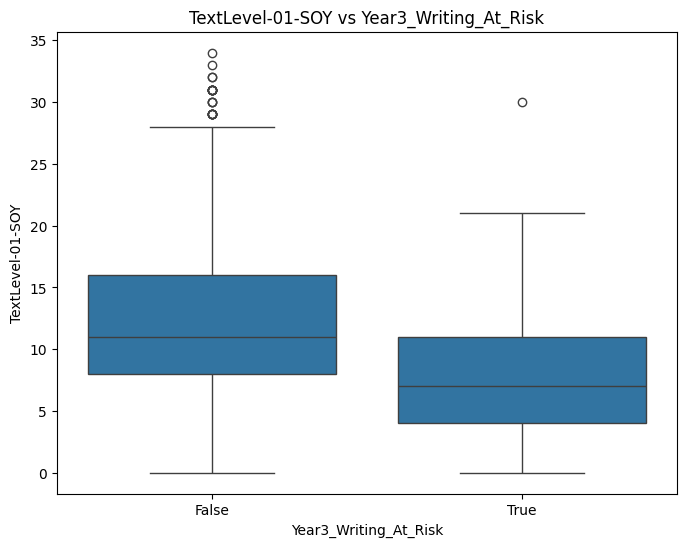

Descriptive statistics for TextLevel-01-MOY:
                         count   mean   std   min    25%    50%    75%    max
Year3_Writing_At_Risk                                                        
False                 1334.000 16.350 5.510 4.000 13.000 16.000 19.000 33.000
True                   666.000 12.290 4.330 0.000 10.000 12.000 15.000 32.000




/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


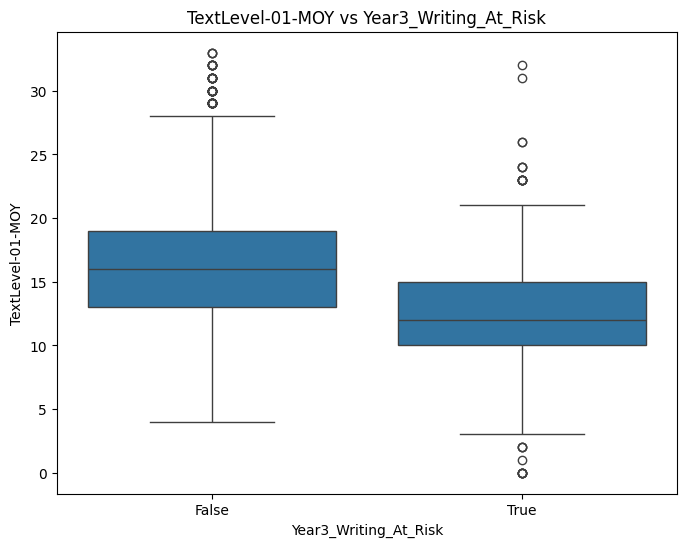

Descriptive statistics for TextLevel-01-EOY:
                         count   mean   std   min    25%    50%    75%    max
Year3_Writing_At_Risk                                                        
False                 1334.000 22.340 4.300 4.000 19.000 22.000 25.000 34.000
True                   666.000 18.710 4.150 4.000 17.000 19.000 21.000 32.000




/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


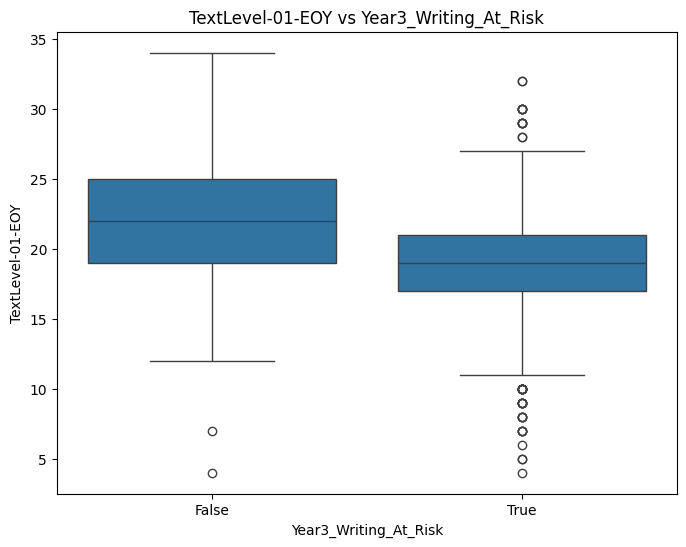

Descriptive statistics for TextLevel-02-SOY:
                         count   mean   std   min    25%    50%    75%    max
Year3_Writing_At_Risk                                                        
False                 1334.000 23.220 4.700 4.000 20.000 23.000 27.000 36.000
True                   666.000 18.920 5.020 2.000 16.000 19.000 22.000 32.000




/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


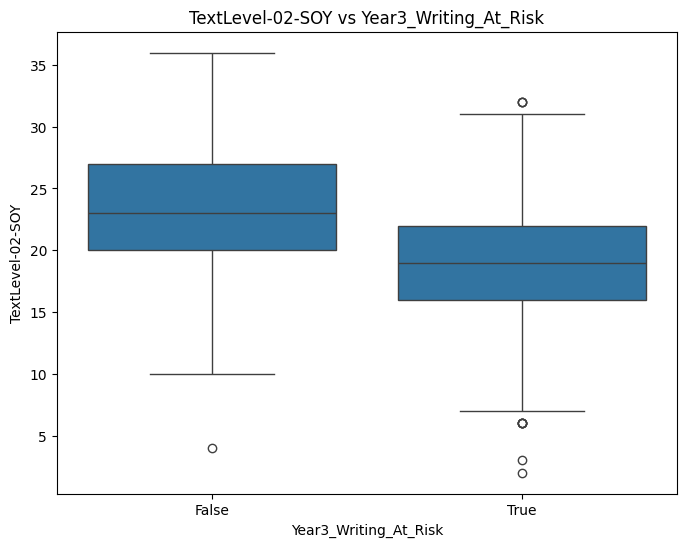

Descriptive statistics for TextLevel-02-MOY:
                         count   mean   std   min    25%    50%    75%    max
Year3_Writing_At_Risk                                                        
False                 1334.000 25.330 4.050 5.000 23.000 26.000 29.000 34.000
True                   666.000 21.560 4.880 5.000 19.000 22.000 25.000 32.000




/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


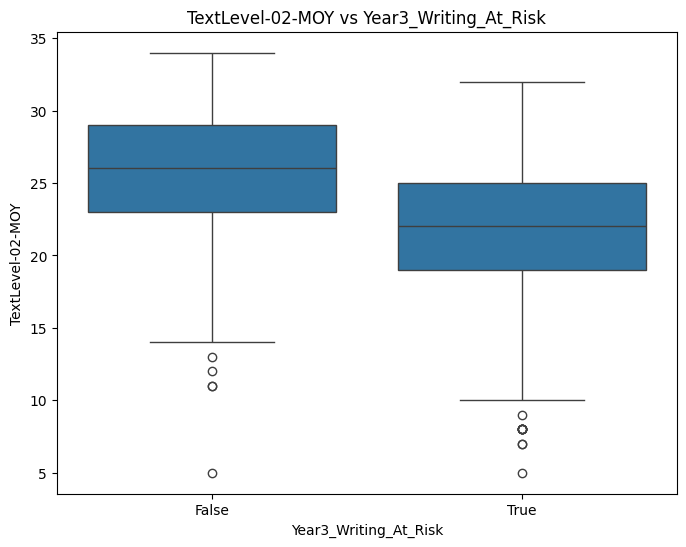

Descriptive statistics for TextLevel-02-EOY:
                         count   mean   std   min    25%    50%    75%    max
Year3_Writing_At_Risk                                                        
False                 1334.000 27.950 2.890 5.000 26.000 29.000 30.000 33.000
True                   666.000 25.100 4.520 6.000 23.000 26.000 28.000 33.000




/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


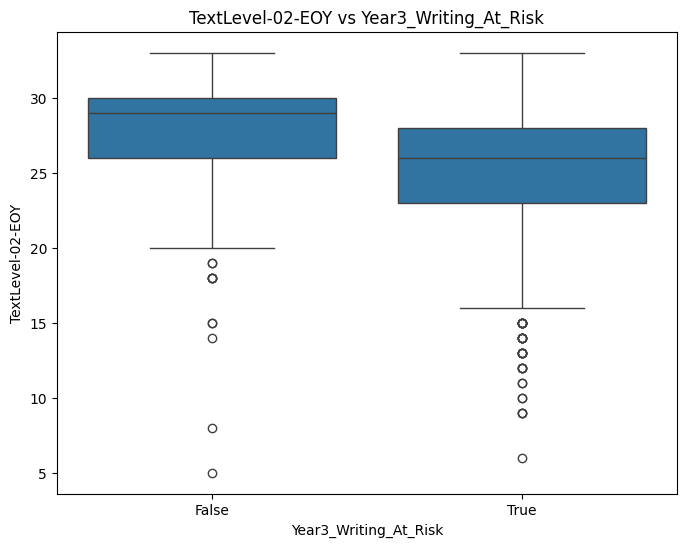

Descriptive statistics for WritingVocab-01-SOY:
                         count   mean    std   min    25%    50%    75%    max
Year3_Writing_At_Risk                                                         
False                 1334.000 25.130 12.770 0.000 16.000 23.000 33.000 95.000
True                   666.000 15.780  9.900 0.000  8.000 14.000 21.000 64.000




/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


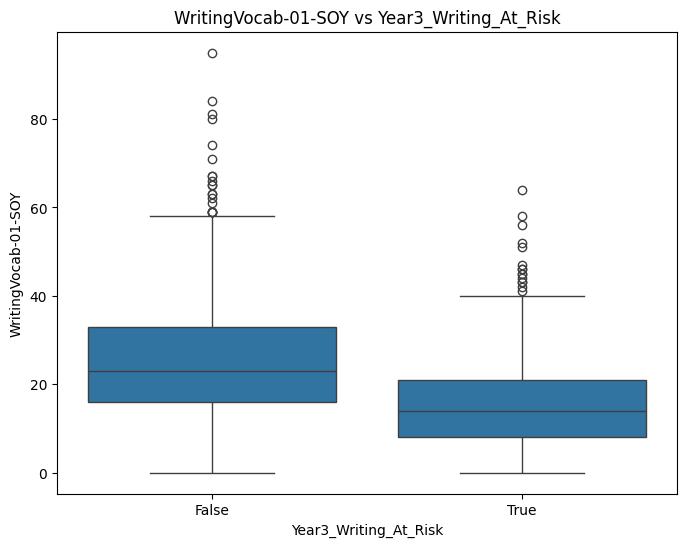

Descriptive statistics for HRSIW-01-SOY:
                         count   mean    std    min    25%    50%    75%  \
Year3_Writing_At_Risk                                                      
False                 1334.000 32.880  9.060 -2.000 28.000 33.000 39.000   
True                   666.000 25.750 10.160 -3.000 19.000 27.000 33.000   

                         max  
Year3_Writing_At_Risk         
False                 58.000  
True                  53.000  




/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


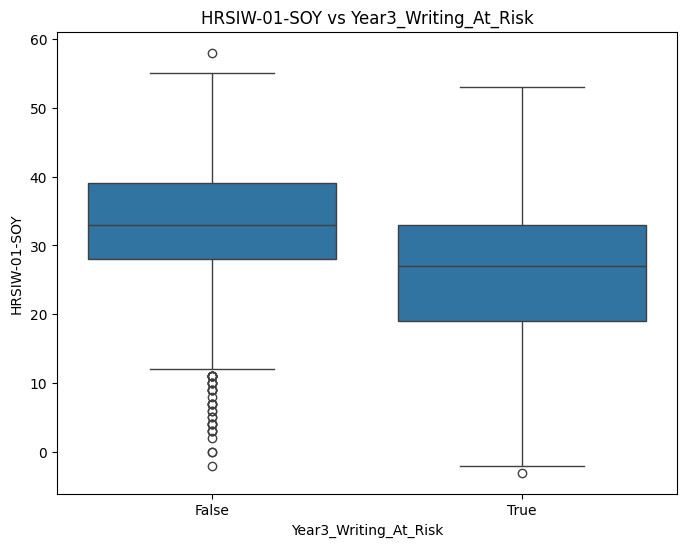

Descriptive statistics for Counting-01:
                         count  mean   std   min   25%   50%   75%   max
Year3_Writing_At_Risk                                                   
False                 1334.000 1.900 0.940 0.000 1.000 2.000 2.000 5.000
True                   666.000 1.480 0.860 0.000 1.000 2.000 2.000 4.000




/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


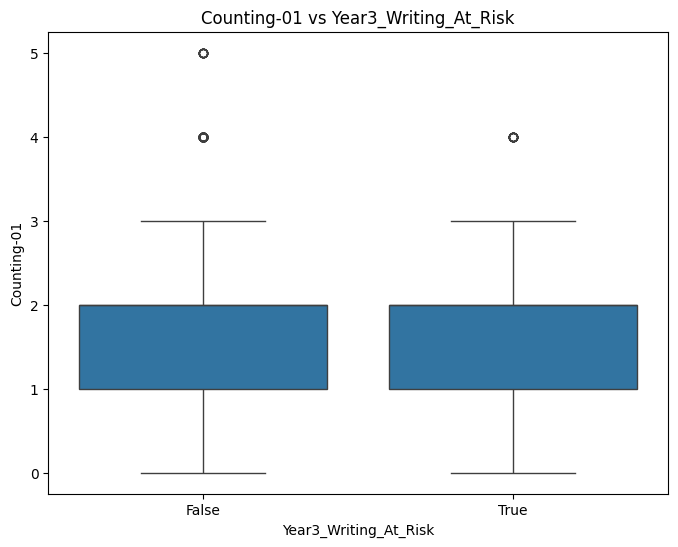

Descriptive statistics for Counting-02:
                         count  mean   std   min   25%   50%   75%   max
Year3_Writing_At_Risk                                                   
False                 1334.000 3.010 1.070 0.000 2.000 3.000 4.000 6.000
True                   666.000 2.530 1.000 0.000 2.000 2.000 3.000 5.000




/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


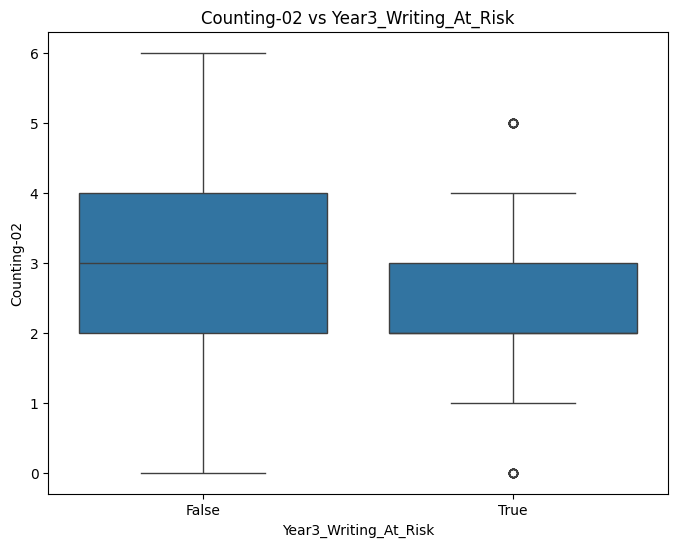

Descriptive statistics for Place Value-01:
                         count  mean   std   min   25%   50%   75%   max
Year3_Writing_At_Risk                                                   
False                 1334.000 1.100 0.520 0.000 1.000 1.000 1.000 4.000
True                   666.000 0.880 0.520 0.000 1.000 1.000 1.000 3.000




/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


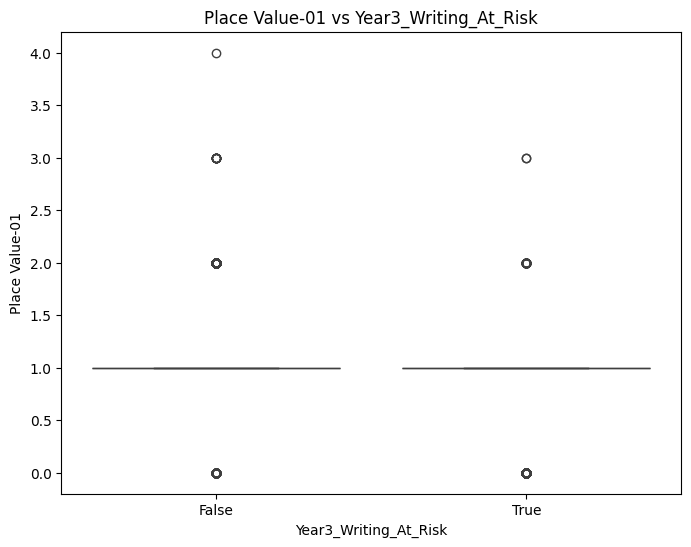

Descriptive statistics for Place Value-02:
                         count  mean   std   min   25%   50%   75%   max
Year3_Writing_At_Risk                                                   
False                 1334.000 1.770 0.640 0.000 1.000 2.000 2.000 5.000
True                   666.000 1.510 0.610 0.000 1.000 1.000 2.000 4.000




/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


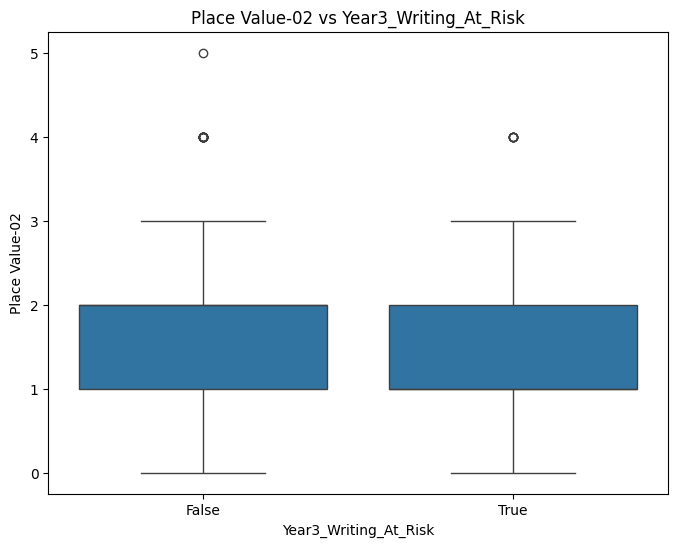

Descriptive statistics for Addition and Subtraction-01:
                         count  mean   std   min   25%   50%   75%   max
Year3_Writing_At_Risk                                                   
False                 1334.000 1.420 0.950 0.000 1.000 1.000 2.000 5.000
True                   666.000 1.040 0.850 0.000 0.000 1.000 2.000 4.000




/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


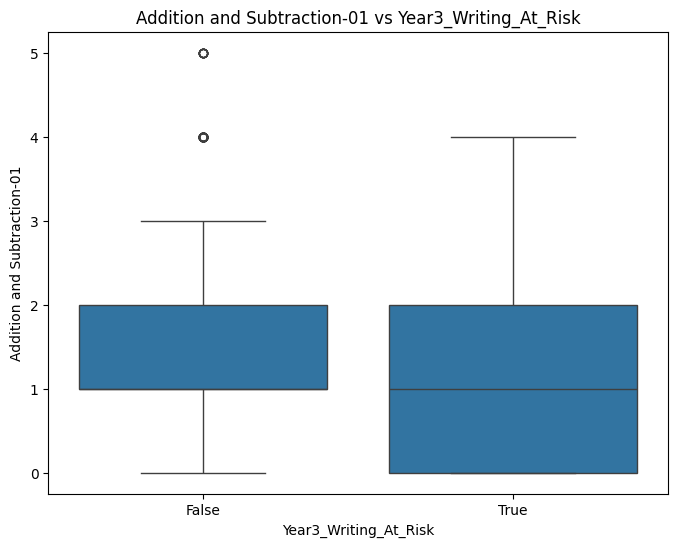

Descriptive statistics for Addition and Subtraction-02:
                         count  mean   std   min   25%   50%   75%   max
Year3_Writing_At_Risk                                                   
False                 1334.000 2.400 1.160 0.000 2.000 2.000 3.000 5.000
True                   666.000 1.960 1.080 0.000 1.000 2.000 2.000 6.000




/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


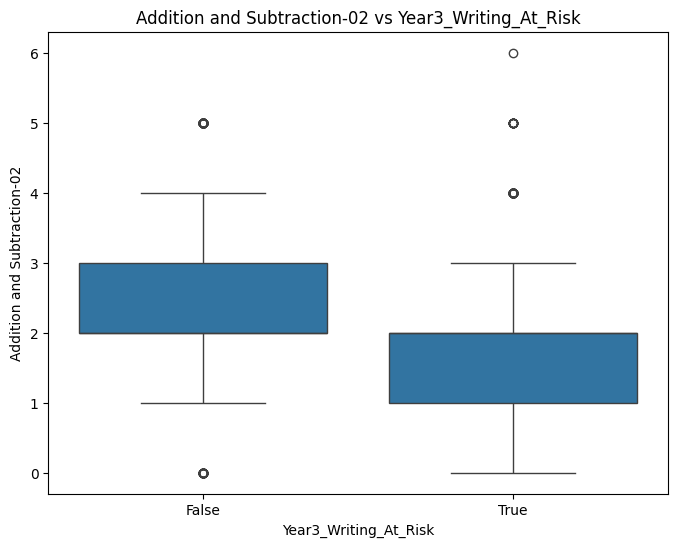

Descriptive statistics for Multiplication and Division-01:
                         count  mean   std   min   25%   50%   75%   max
Year3_Writing_At_Risk                                                   
False                 1334.000 1.160 0.840 0.000 0.000 1.000 2.000 4.000
True                   666.000 0.910 0.810 0.000 0.000 1.000 2.000 3.000




/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


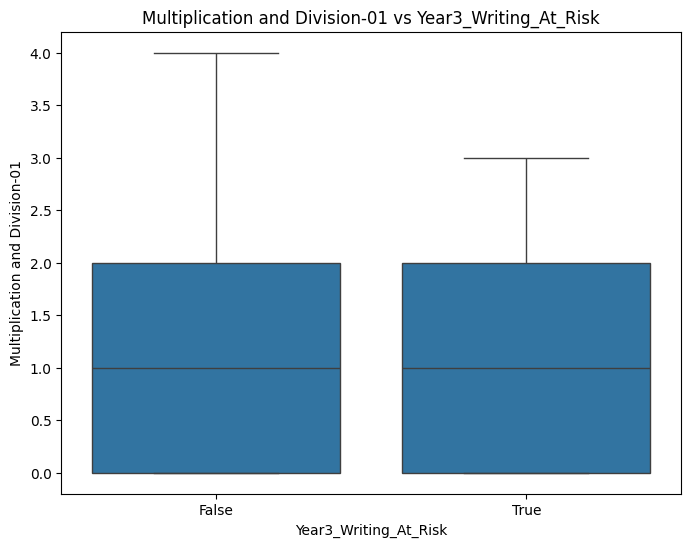

Descriptive statistics for Multiplication and Division-02:
                         count  mean   std   min   25%   50%   75%   max
Year3_Writing_At_Risk                                                   
False                 1334.000 1.870 0.770 0.000 2.000 2.000 2.000 5.000
True                   666.000 1.650 0.760 0.000 1.000 2.000 2.000 5.000




/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


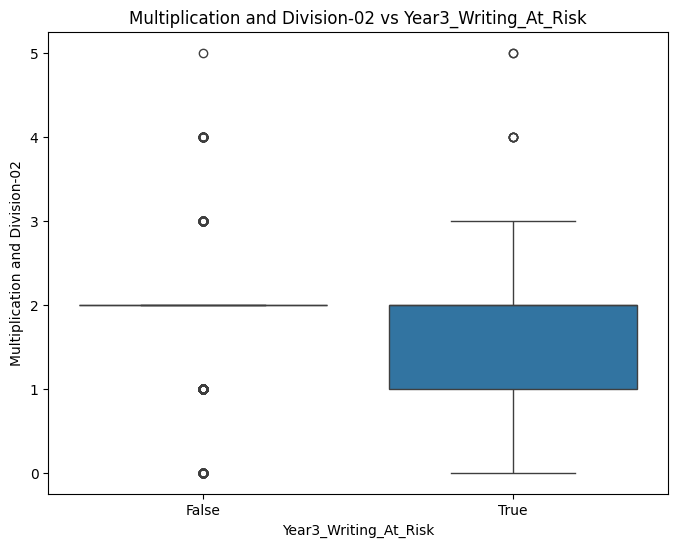

In [37]:
numerical_columns = [
    'Burt-01-SOY', 'Burt-01-EOY',
    'Clay-01-SOY', 'Clay-01-EOY',
    'TextLevel-01-SOY', 'TextLevel-01-MOY', 'TextLevel-01-EOY',
    'TextLevel-02-SOY', 'TextLevel-02-MOY', 'TextLevel-02-EOY',
    'WritingVocab-01-SOY',
    'HRSIW-01-SOY',
    'Counting-01', 'Counting-02',
    'Place Value-01', 'Place Value-02',
    'Addition and Subtraction-01', 'Addition and Subtraction-02',
    'Multiplication and Division-01', 'Multiplication and Division-02'
]

# Loop through the numerical columns and create a boxplot for each
for column in numerical_columns:
    # Calculate descriptive statistics
    stats = schools.groupby('Year3_Writing_At_Risk')[column].describe().round(2)
    print(f"Descriptive statistics for {column}:")
    print(stats)
    print("\n")

    # Create a boxplot for each variable
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=schools, x='Year3_Writing_At_Risk', y=column)
    plt.title(f'{column} vs Year3_Writing_At_Risk')
    plt.show()

                         count   mean    std   min    25%    50%    75%    max
Year3_Writing_At_Risk                                                         
False                 1334.000 25.130 12.770 0.000 16.000 23.000 33.000 95.000
True                   666.000 15.780  9.900 0.000  8.000 14.000 21.000 64.000


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


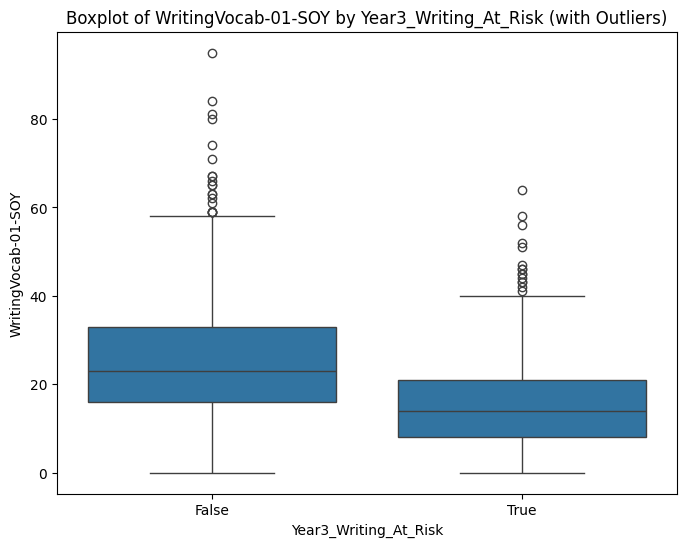

In [38]:
# Descriptive Statistics by Category (True/False)
descriptive_stats = schools.groupby('Year3_Writing_At_Risk')['WritingVocab-01-SOY'].describe().round(2)
print(descriptive_stats)

# Boxplot: WritingVocab-01-SOY split by Year3_Writing_At_Risk with outliers visible
plt.figure(figsize=(8, 6))
sns.boxplot(x='Year3_Writing_At_Risk', y='WritingVocab-01-SOY', data=schools)
plt.title('Boxplot of WritingVocab-01-SOY by Year3_Writing_At_Risk (with Outliers)')
plt.xlabel('Year3_Writing_At_Risk')
plt.ylabel('WritingVocab-01-SOY')
plt.show()

In [39]:
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Detecting outliers for each group
outliers_true = detect_outliers(schools[schools['Year3_Writing_At_Risk'] == True]['WritingVocab-01-SOY'])
outliers_false = detect_outliers(schools[schools['Year3_Writing_At_Risk'] == False]['WritingVocab-01-SOY'])

# Calculating descriptive statistics for outliers in both groups
outliers_true_stats = outliers_true.describe().reset_index()
outliers_false_stats = outliers_false.describe().reset_index()

# Displaying the statistics in table format
outliers_stats_combined = pd.concat([outliers_true_stats, outliers_false_stats], axis=1)
outliers_stats_combined.columns = ['Statistic', 'True Group', 'Statistic', 'False Group']

print("Descriptive Statistics for Outliers in 'True' and 'False' groups (Year3_Writing_At_Risk):")
print(outliers_stats_combined)

Descriptive Statistics for Outliers in 'True' and 'False' groups (Year3_Writing_At_Risk):
  Statistic  True Group Statistic  False Group
0     count      15.000     count       19.000
1      mean      48.200      mean       68.421
2       std       6.668       std       10.063
3       min      41.000       min       59.000
4       25%      43.500       25%       61.500
5       50%      46.000       50%       65.000
6       75%      51.500       75%       72.500
7       max      64.000       max       95.000


## **2.4. Data Conversion**

In [40]:
Year3_at_risk_mapping = {
    'False': 0,
    'True': 1
}
schools['Year3_Writing_At_Risk_N'] =schools['Year3_Writing_At_Risk'].replace(Year3_at_risk_mapping)

In [41]:
Gender_mapping = {
    'Male': 0,
    'Female': 1
}
schools['Gender_N'] =schools['Gender'].replace(Gender_mapping)

<ipython-input-41-aa2d6e561cae>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  schools['Gender_N'] =schools['Gender'].replace(Gender_mapping)


In [42]:
# Generate dummy variables for the 'Disability' column, using dtype=int to ensure 0/1 encoding
disability_dummies = pd.get_dummies(schools['Disability'], prefix='Disability', dtype=int)

# Concatenate the dummy variables with the original dataframe
schools = pd.concat([schools, disability_dummies], axis=1)

# Drop the original 'Disability' column if you no longer need it
schools.drop(columns=['Disability'], inplace=True)

# Display the updated dataframe to verify the changes
print(schools.head())

   Gender  Year_02  Kinder_Age  NCCD-Funded  01.SES  02.SES  NumSibling  \
0    Male     2020       5.500            0     104     104           3   
1  Female     2018       5.800            0     112     112           2   
2    Male     2021       5.900            0     120     109           2   
3    Male     2021       5.700            0      95      93           2   
4    Male     2021       5.800            0      98      98           1   

   SiblingOrder  NumAbvYear9  NumAbvDiploma  ...  \
0             3            2              1  ...   
1             2            2              2  ...   
2             2            2              0  ...   
3             1            0              0  ...   
4             1            2              0  ...   

   Multiplication and Division-02  Year3_Writing_At_Risk  Disability_Grouped  \
0                               2                  False         Non-disable   
1                               2                  False         Non-disable

In [43]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 40 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 2000 non-null   object 
 1   Year_02                                2000 non-null   int64  
 2   Kinder_Age                             2000 non-null   float64
 3   NCCD-Funded                            2000 non-null   int64  
 4   01.SES                                 2000 non-null   int64  
 5   02.SES                                 2000 non-null   int64  
 6   NumSibling                             2000 non-null   int64  
 7   SiblingOrder                           2000 non-null   int64  
 8   NumAbvYear9                            2000 non-null   int64  
 9   NumAbvDiploma                          2000 non-null   int64  
 10  NumProf                                2000 non-null   int64  
 11  Burt

## **2.5. Multivariate Analysis**

In [44]:
#define numeric variables of interest
numerical_variables  = ['Year3_Writing_At_Risk_N', 'Burt-01-SOY', 'Burt-01-EOY',
    'Clay-01-SOY', 'Clay-01-EOY',
    'TextLevel-01-SOY', 'TextLevel-01-MOY', 'TextLevel-01-EOY',
    'TextLevel-02-SOY', 'TextLevel-02-MOY', 'TextLevel-02-EOY',
    'HRSIW-01-SOY', 'WritingVocab-01-SOY',
    'Counting-01', 'Counting-02',
    'Place Value-01', 'Place Value-02',
    'Addition and Subtraction-01', 'Addition and Subtraction-02',
    'Multiplication and Division-01', 'Multiplication and Division-02']

In [45]:
numvlit_variables = ['Burt-01-SOY', 'Burt-01-EOY',
    'Clay-01-SOY', 'Clay-01-EOY',
    'TextLevel-01-SOY', 'TextLevel-01-MOY', 'TextLevel-01-EOY',
    'TextLevel-02-SOY', 'TextLevel-02-MOY', 'TextLevel-02-EOY',
    'HRSIW-01-SOY', 'WritingVocab-01-SOY',
    'Counting-01', 'Counting-02',
    'Place Value-01', 'Place Value-02',
    'Addition and Subtraction-01', 'Addition and Subtraction-02',
    'Multiplication and Division-01', 'Multiplication and Division-02']

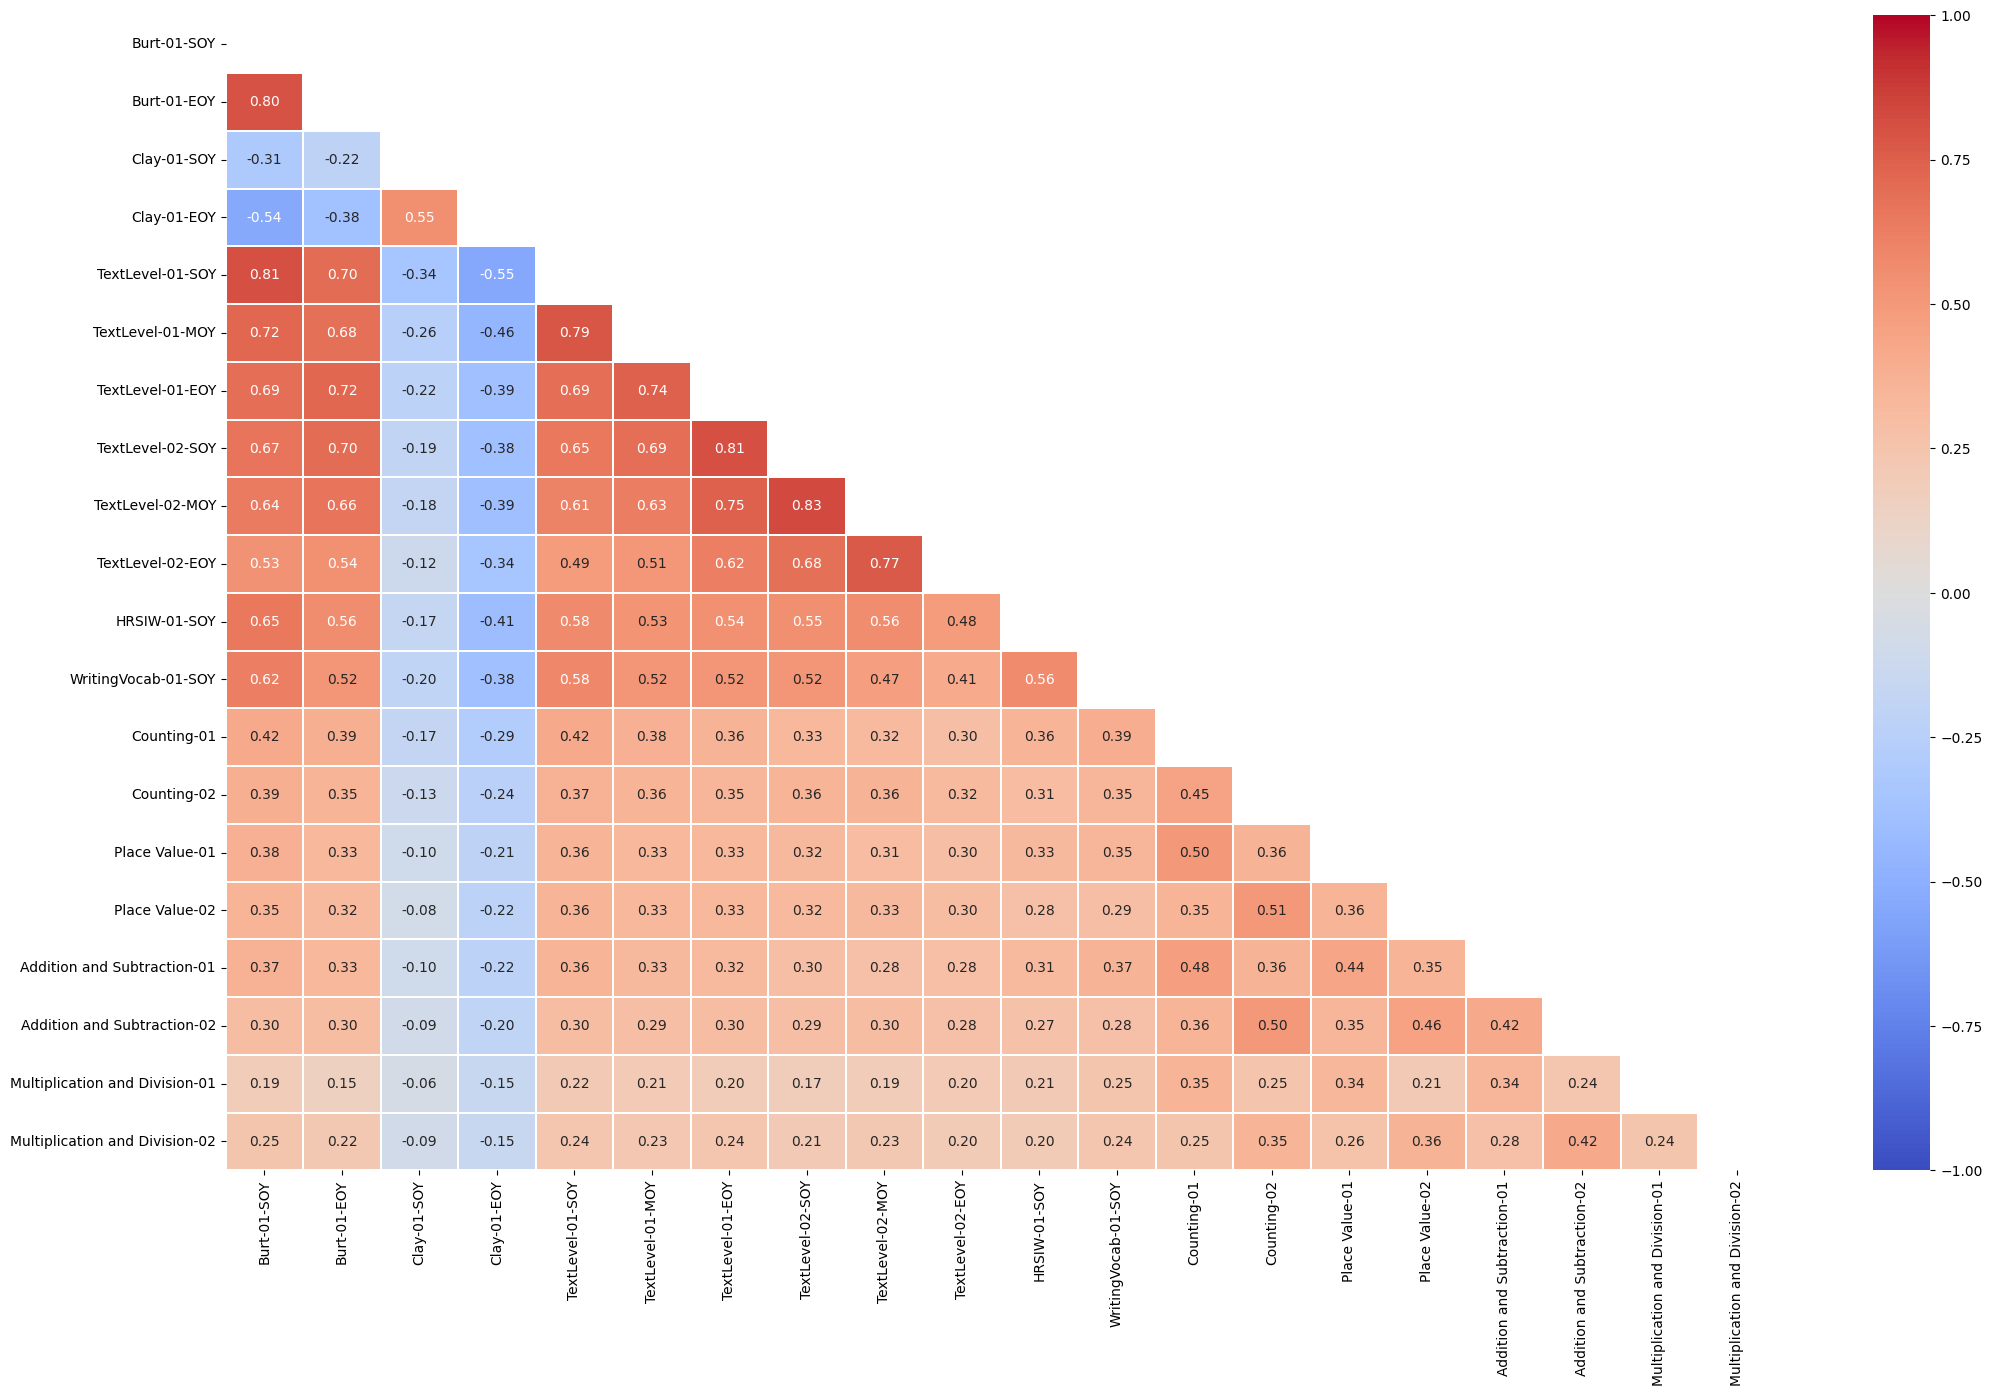

In [46]:
df_numvlit = schools[numvlit_variables]
corr = df_numvlit.corr()
mask = np.triu(np.ones_like(corr,dtype=bool))
plt.figure(figsize=(25,15))
ax = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

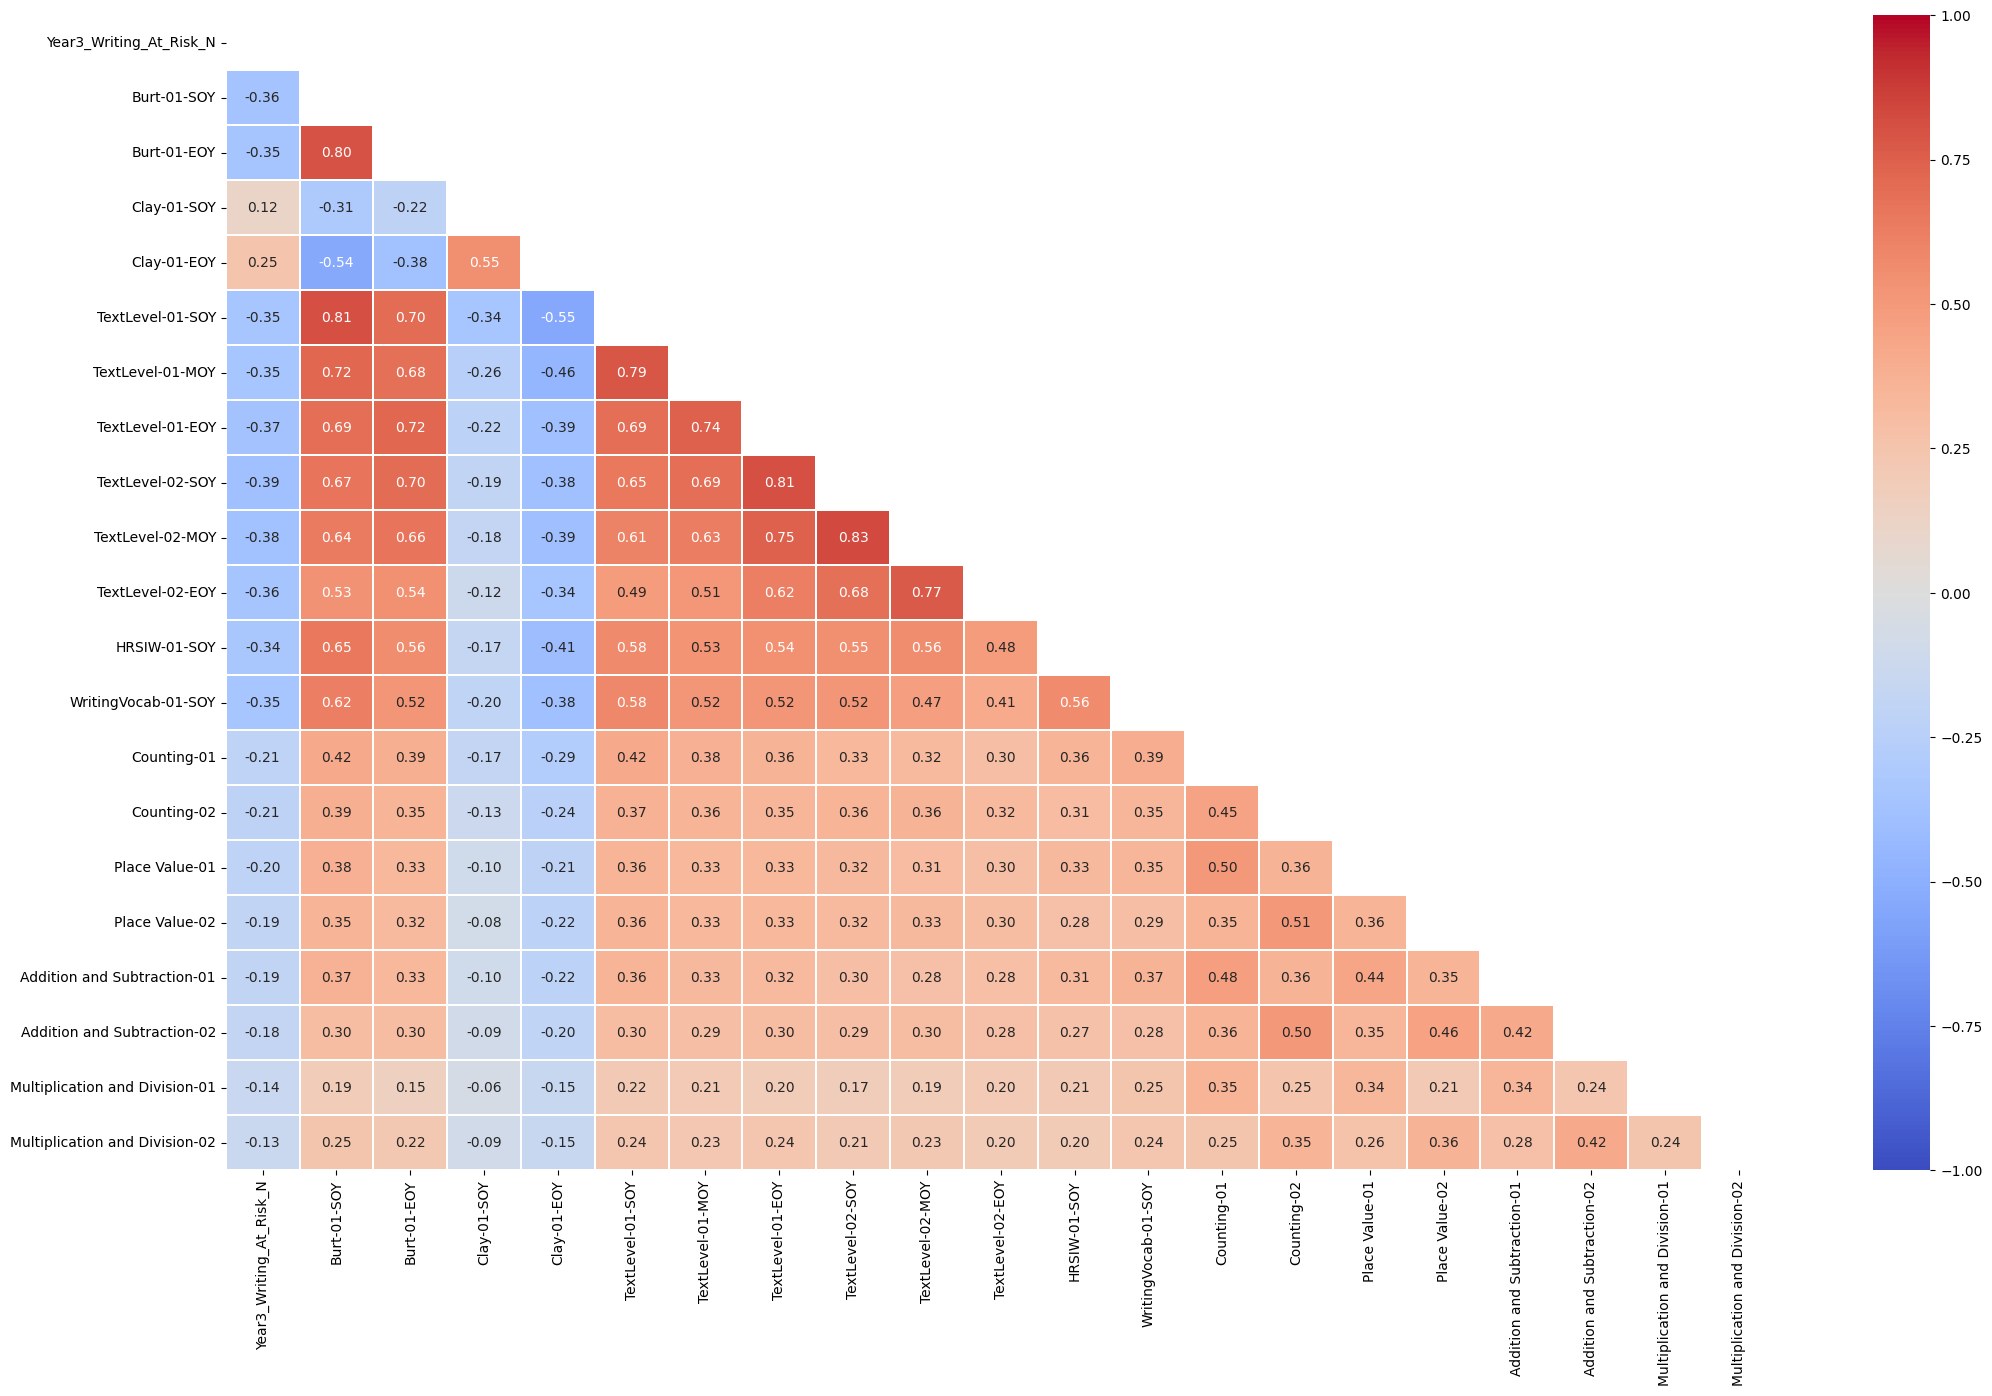

In [47]:
# Filter the schools dataset to include only the numeric variables of interest
df_numerical = schools[numerical_variables]

# Create a correlation matrix
corr = df_numerical.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(25, 15))

# Draw the heatmap with the mask
ax = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

# Show the plot
plt.show()

In [48]:
#define numeric variables of interest
numerical_variables2  = ['Year3_Writing_At_Risk_N',
                         'Disability_Disability_Cognitive', 'Disability_Disability_Physical',
                         'Disability_Disability_Sensory', 'Disability_Disability_SocialEmotional',
                         'Disability_Disability_Non-disable', 'NCCD-Funded','Gender_N',
                         '01.SES', '02.SES','SiblingOrder','NumAbvYear9',
                         'NumAbvDiploma', 'NumProf']

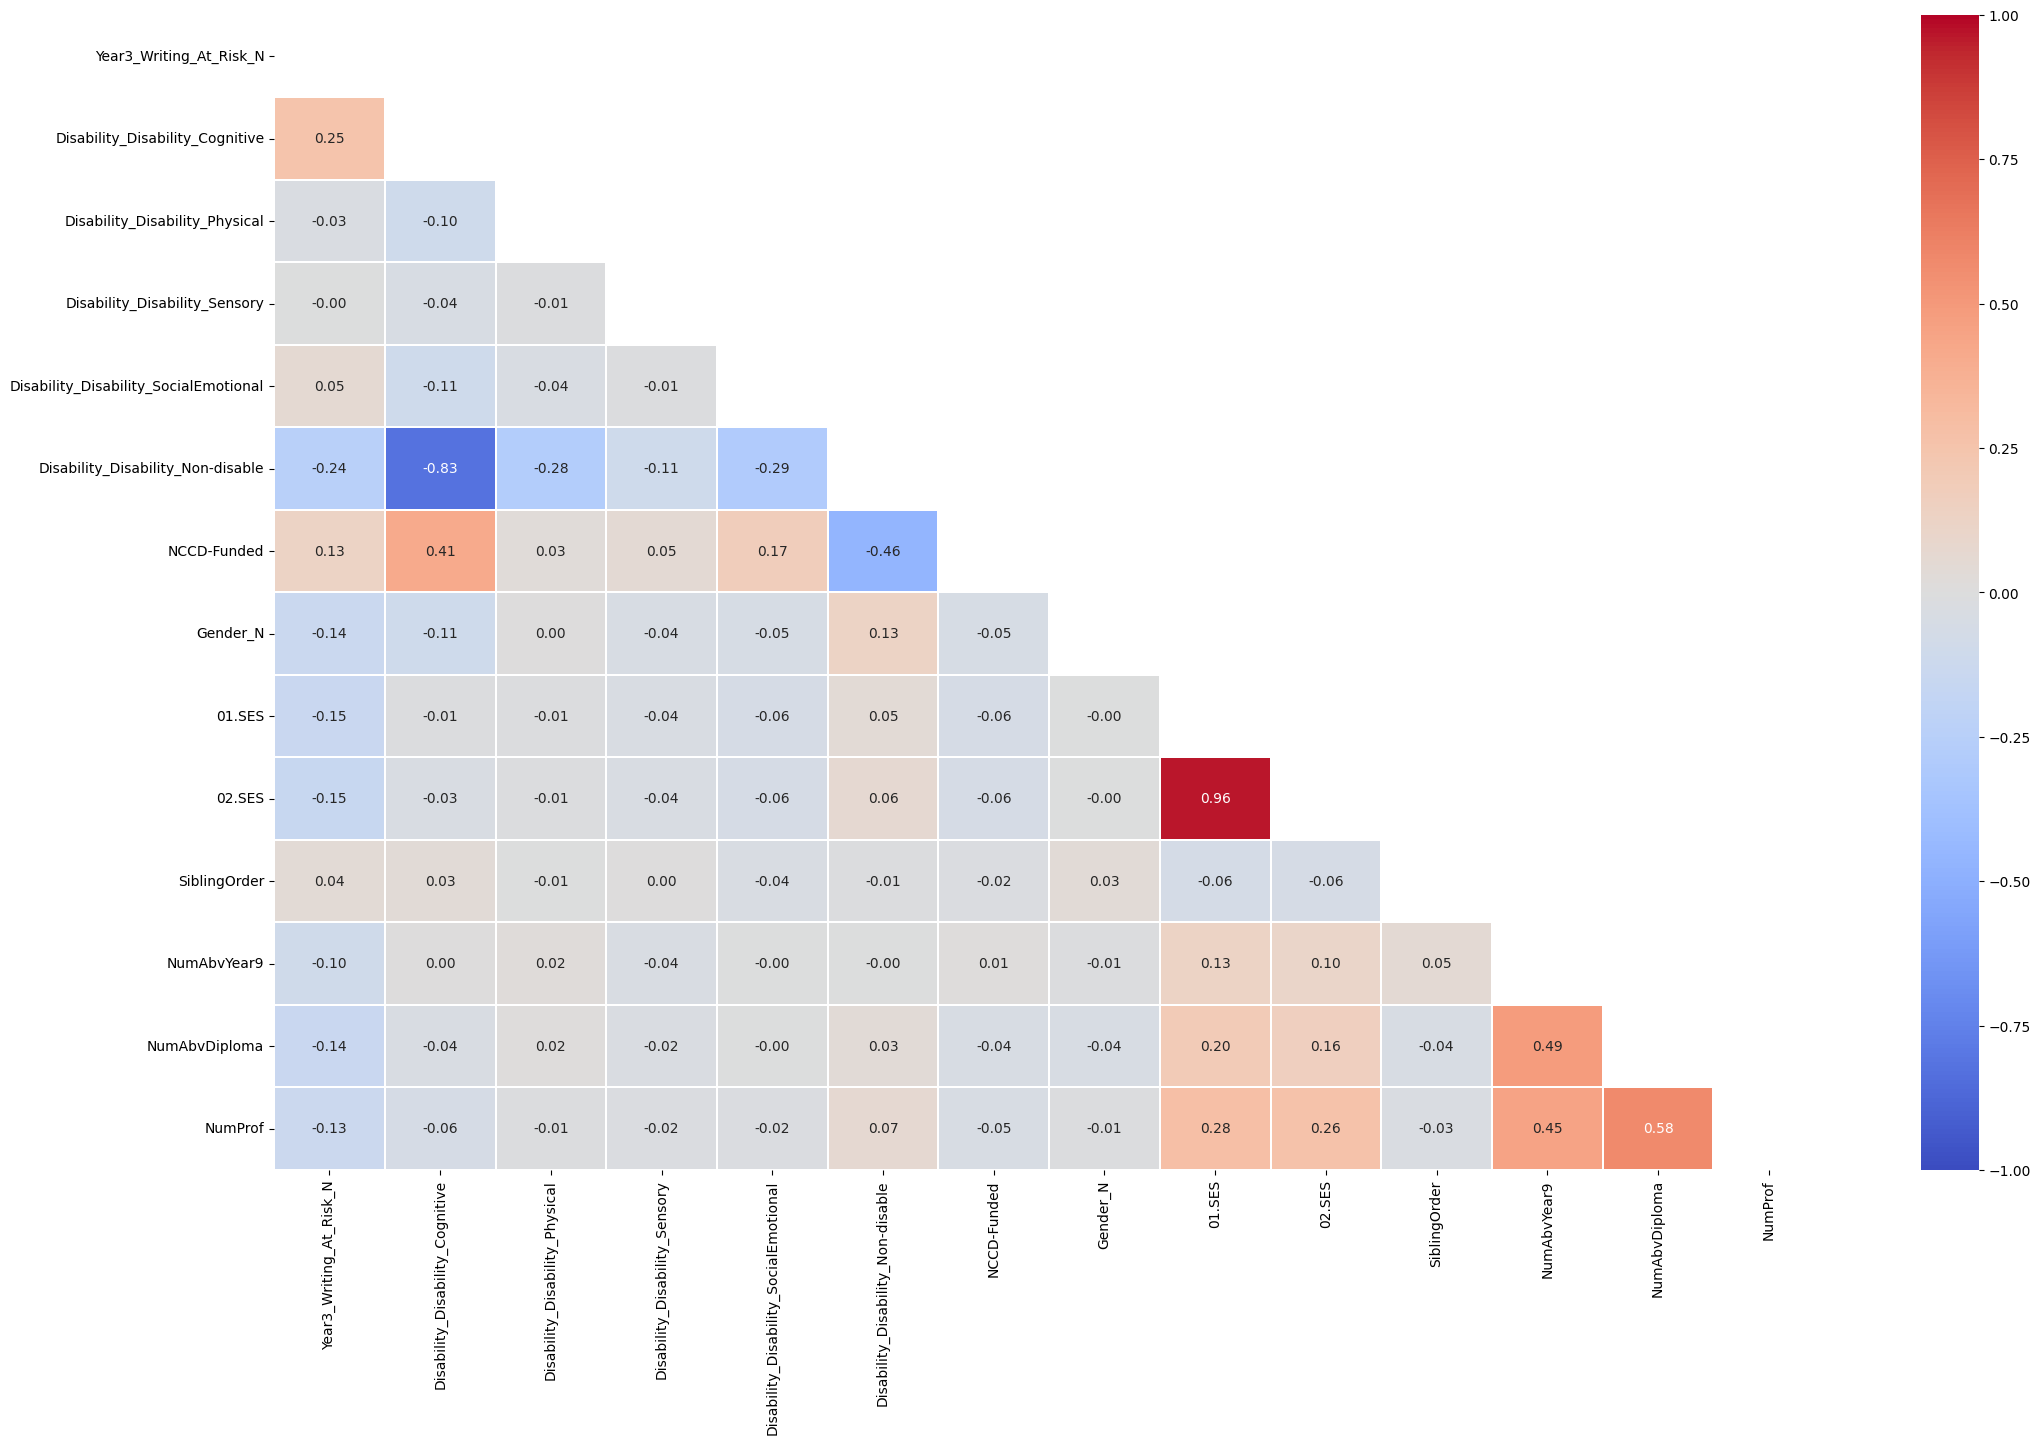

In [49]:
# Filter the schools dataset to include only the numeric variables of interest
df_numerical = schools[numerical_variables2]

# Create a correlation matrix
corr = df_numerical.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(25, 15))

# Draw the heatmap with the mask
ax = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

# Show the plot
plt.show()

# **3. Model Development**


## **3.1. Logistic Regression**

### a. Feature Selection


In [50]:
# Select predictors
features = ['Burt-01-SOY', 'Burt-01-EOY', 'TextLevel-01-SOY', 'TextLevel-01-MOY',
       'TextLevel-01-EOY', 'TextLevel-02-SOY', 'TextLevel-02-MOY',
       'TextLevel-02-EOY', 'Counting-02', 'Multiplication and Division-01']

# Specify X and y
X = schools[features]
y = schools.Year3_Writing_At_Risk_N

### b. Split Dataset


In [51]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2024)  # 80% training and 20% testing


In [52]:
# Inspect the split datasets
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 340 to 533
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Burt-01-SOY                     1600 non-null   int64
 1   Burt-01-EOY                     1600 non-null   int64
 2   TextLevel-01-SOY                1600 non-null   int64
 3   TextLevel-01-MOY                1600 non-null   int64
 4   TextLevel-01-EOY                1600 non-null   int64
 5   TextLevel-02-SOY                1600 non-null   int64
 6   TextLevel-02-MOY                1600 non-null   int64
 7   TextLevel-02-EOY                1600 non-null   int64
 8   Counting-02                     1600 non-null   int64
 9   Multiplication and Division-01  1600 non-null   int64
dtypes: int64(10)
memory usage: 137.5 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 815 to 941
Data columns (total 10 columns):
 #   Column                          Non-

### c. Train a Logistic Regression Model and Make Predictions

In [53]:
# Create an initial Logistic Regression model
logreg = LogisticRegression(max_iter=300)

In [54]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model on the scaled data
logreg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test_scaled)

In [55]:
# Complete the code to train Logistic Regression Classifer with the traning dataset
logreg = logreg.fit(X_train_scaled, y_train)

In [56]:
# Complete the code to make predictions for the test dataset
y_pred = logreg.predict(X_test_scaled)

In [57]:
# Join unseen y_test with predicted value into a data frame
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

# Join X_test with the new dataframe
inspection=pd.concat([X_test,inspection], axis=1)

inspection.head(20)

Burt-01-SOY  Burt-01-EOY  TextLevel-01-SOY  TextLevel-01-MOY  \
815             7           23                 4                10   
127            14           35                 8                17   
1484            3           14                 5                 9   
1560           22           33                14                14   
1653           11           36                 6                10   
494             9           30                 7                12   
1671            6           20                 0                 7   
540            24           30                15                17   
1161           29           58                17                18   
1592            7           21                 7                11   
103            15           26                 2                 8   
1187           32           47                21                27   
759            25           33                11                18   
71             20           33                13                15   
1101            8           21                 3                 6   
1507           14           40                 4                10   
781            30           45                17                21   
1122           37           57                18                19   
8              29           40                13                18   
260            10           27                 8                14   

      TextLevel-01-EOY  TextLevel-02-SOY  TextLevel-02-MOY  TextLevel-02-EOY  \
815                 21                16                23                25   
127                 22                25                23                 5   
1484                13                11                15                18   
1560                18                20                25                29   
1653                19                21                26                27   
494                 19                18                22                27   
1671                12                11                14                20   
540                 22                24                28                31   
1161                24                28                30                30   
1592                17                13                19                21   
103                 20                19                24                26   
1187                31                28                30                30   
759                 23                31                29                31   
71                  21                25                27                31   
1101                18                13                19                25   
1507                18                23                26                29   
781                 25                30                30                32   
1122                24                29                28                29   
8                   19                22                27                26   
260                 15                16                17                21   

      Counting-02  Multiplication and Division-01  Actual  Predicted  
815             4                               2   False       True  
127             2                               0   False       True  
1484            2                               0    True       True  
1560            2                               2   False      False  
1653            3                               1   False      False  
494             2                               1    True      False  
1671            1                               0    True       True  
540             3                               1   False      False  
1161            3                               0   False      False  
1592            3                               1    True       True  
103             2                               0   False       True  
11

### d. Model Performance

In [58]:
# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.74      0.88      0.80       267
        True       0.61      0.39      0.48       133

    accuracy                           0.71       400
   macro avg       0.68      0.63      0.64       400
weighted avg       0.70      0.71      0.70       400

[[234  33]
 [ 81  52]]


In [59]:
print("Accuracy: ", '%.3f' % metrics.accuracy_score(y_test,y_pred))
print("Precision: ",'%.3f' % metrics.precision_score(y_test,y_pred))
print("Recall: ", '%.3f' % metrics.recall_score(y_test,y_pred))
print("F1: ", '%.3f' % metrics.f1_score(y_test,y_pred))

Accuracy:  0.715
Precision:  0.612
Recall:  0.391
F1:  0.477


In [60]:
# First get the probabilities of the classes on the test set
probabilities = logreg.predict_proba(X_test_scaled)

In [61]:
y_prob_log = probabilities[:, 1]

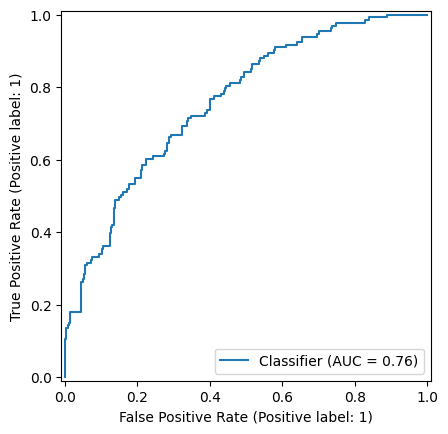

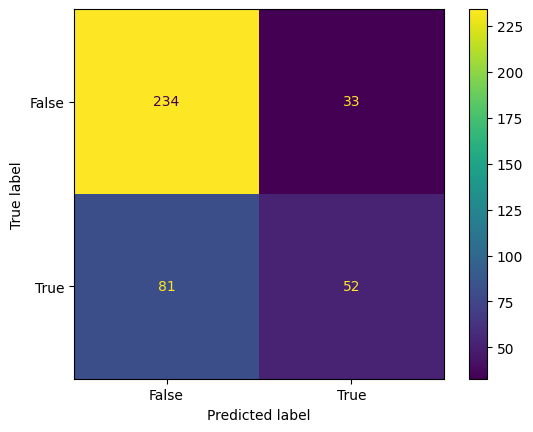

In [62]:
# Display RocCurve and Confusion Matrix
RocCurveDisplay.from_predictions(y_test, y_prob_log)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

Axes(0.125,0.11;0.775x0.77)


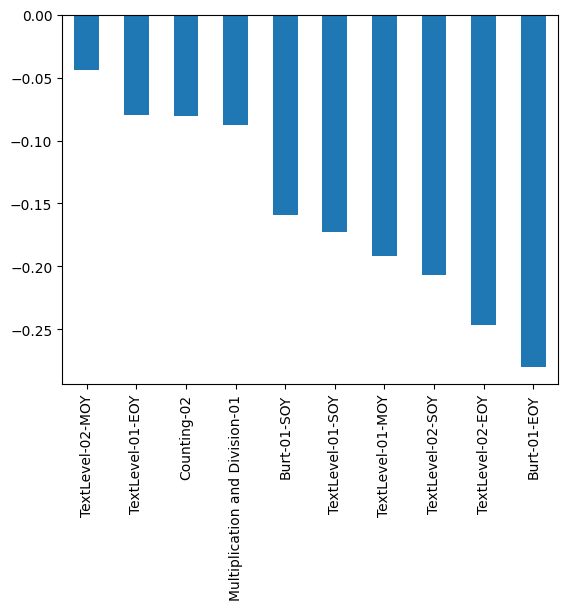

In [63]:
# Visualise the coefficients
coefs = pd.Series(logreg.coef_[0], index=X.columns.values)
print (coefs.sort_values(ascending = False).plot(kind='bar'))

In [64]:
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate a sequence of points along the x axis
x_vals = np.linspace(-10, 10, 100)

# Calculate the corresponding y values using the model coefficients
coef = logreg.coef_.flatten()
intercept = logreg.intercept_
y_vals = sigmoid(np.dot(X_test, coef) + intercept)

In [65]:
intercept = logreg.intercept_[0]

# Flatten the coefficients array to a 1D array
coef = logreg.coef_.flatten()

# Print the model formula
print('Year_3_At_Risk = ', '%.3f' % intercept,
      '+', '%.3f' % coef[0], '* Burt-01-SOY',
      '+', '%.3f' % coef[1], '* Burt-01-EOY',
      '+', '%.3f' % coef[2], '* TextLevel-01-SOY',
      '+', '%.3f' % coef[3], '* TextLevel-01-MOY',
      '+', '%.3f' % coef[4], '* TextLevel-01-EOY',
      '+', '%.3f' % coef[5], '* TextLevel-02-SOY',
      '+', '%.3f' % coef[6], '* TextLevel-02-MOY',
      '+', '%.3f' % coef[7], '* TextLevel-02-EOY',
      '+', '%.3f' % coef[8], '* Counting-02',
      '+', '%.3f' % coef[9], '* Multiplication and Division-01')

Year_3_At_Risk =  -0.893 + -0.159 * Burt-01-SOY + -0.280 * Burt-01-EOY + -0.173 * TextLevel-01-SOY + -0.192 * TextLevel-01-MOY + -0.080 * TextLevel-01-EOY + -0.206 * TextLevel-02-SOY + -0.044 * TextLevel-02-MOY + -0.247 * TextLevel-02-EOY + -0.080 * Counting-02 + -0.088 * Multiplication and Division-01


### e. Threshold

Best Threshold (based on F1 score): 0.29
Confusion Matrix:
[[160 107]
 [ 31 102]]

Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.60      0.70       267
        True       0.49      0.77      0.60       133

    accuracy                           0.66       400
   macro avg       0.66      0.68      0.65       400
weighted avg       0.72      0.66      0.66       400



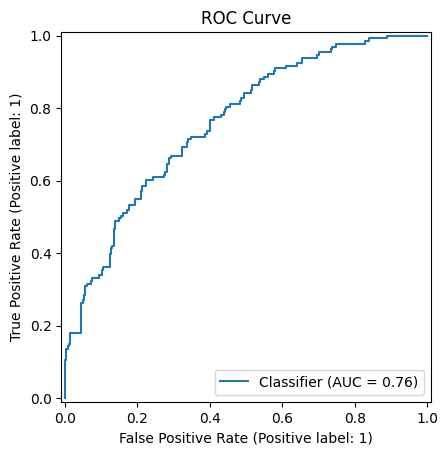

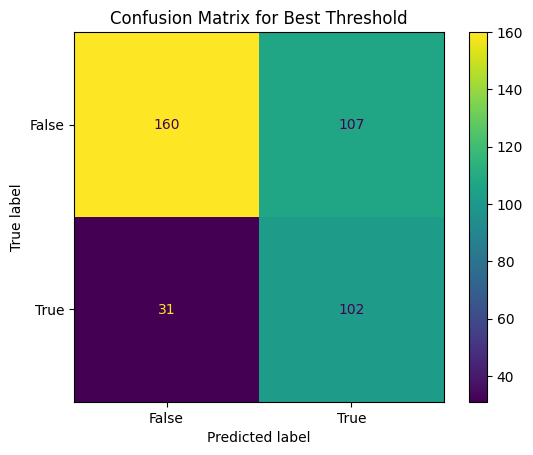

In [66]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_log)

# Find the best threshold based on F1 score
f1_scores = []
for threshold in thresholds:
    y_pred_t = [1 if prob >= threshold else 0 for prob in y_prob_log]
    f1_scores.append(f1_score(y_test, y_pred_t))

best_threshold = thresholds[f1_scores.index(max(f1_scores))]
print(f"Best Threshold (based on F1 score): {best_threshold:.2f}")

# Get predicted labels using the best threshold
y_pred_best = (y_prob_log >= best_threshold).astype(int)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Display ROC curve
RocCurveDisplay.from_predictions(y_test, y_prob_log)
plt.title('ROC Curve')
plt.show()

# Display the confusion matrix using the best predicted labels
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best)
plt.title('Confusion Matrix for Best Threshold')
plt.show()

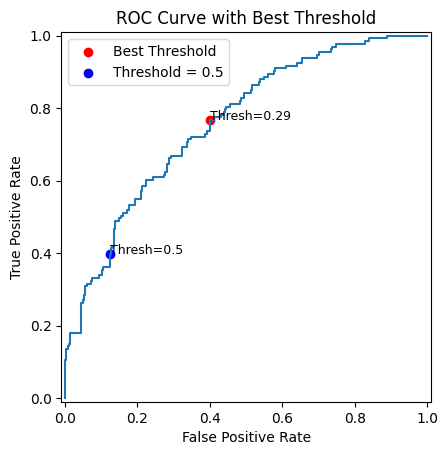

In [67]:
# Find indices for plotting the best threshold
threshold_0_5_idx = (abs(thresholds - 0.5)).argmin()
best_threshold_idx = (abs(thresholds - best_threshold)).argmin()

# Plot the ROC curve with the best threshold
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Mark and label the best threshold
plt.scatter(fpr[best_threshold_idx], tpr[best_threshold_idx], color='red', label='Best Threshold')
plt.text(fpr[best_threshold_idx], tpr[best_threshold_idx], f'Thresh={best_threshold:.2f}', fontsize=9)

# Mark and label the threshold = 0.5
plt.scatter(fpr[threshold_0_5_idx], tpr[threshold_0_5_idx], color='blue', label='Threshold = 0.5')
plt.text(fpr[threshold_0_5_idx], tpr[threshold_0_5_idx], 'Thresh=0.5', fontsize=9)

# Add labels and legend to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve with Best Threshold')
plt.show()

In [68]:
print("Accuracy: ", '%.3f' % metrics.accuracy_score(y_test,y_pred_best))
print("Precision: ",'%.3f' % metrics.precision_score(y_test,y_pred_best))
print("Recall: ", '%.3f' % metrics.recall_score(y_test,y_pred_best))
print("F1: ", '%.3f' % metrics.f1_score(y_test,y_pred_best))

Accuracy:  0.655
Precision:  0.488
Recall:  0.767
F1:  0.596


### f. k-fold Validation

In [69]:
# Function to calculate 95% confidence interval
def get_95ci(metric):
    n = len(metric)
    se = metric.std() / np.sqrt(n)
    t = 2.262  # t-value for 95% CI (for large n, you could use 1.96)
    ci = t * se
    return ci

In [70]:
# Perform 10-fold cross-validation
accuracy= cross_val_score(logreg, X, y, cv=10)
f1 = cross_val_score(logreg, X, y, cv=10, scoring=('f1'))

# Print the mean accuracy scores and 95%CI of the scores
print("Accuracy scores: %0.3f (+/- %0.3f)" % (accuracy.mean(), get_95ci(accuracy)))
# Print the mean F1 scores and 95%CI of the scores
print("F1 scores: %0.3f (+/- %0.3f)" % (f1.mean(), get_95ci(f1)))

Accuracy scores: 0.730 (+/- 0.012)
F1 scores: 0.506 (+/- 0.028)


### g. Hyperparmeter Optimisation

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
# Define the corrected parameter grid for hyperparameter optimization
param_grid = [
    {
        'penalty': ['l2'],  # Only 'l2' for newton-cg and lbfgs solvers
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
        'solver': ['newton-cg', 'lbfgs'],  # Solvers that support l2 penalty
        'max_iter': [100, 200, 300]  # Maximum iterations
    },
    {
        'penalty': ['l1'],  # Only 'l1' for liblinear solver
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear'],
        'max_iter': [100, 200, 300]
    },
    {
        'penalty': ['elasticnet'],  # Only elasticnet for saga solver
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['saga'],
        'l1_ratio': [0.1, 0.5, 0.9],  # Values for l1_ratio
        'max_iter': [100, 200, 300]
    }
]
# Perform grid search with cross-validation
grid_search = GridSearchCV(
    LogisticRegression(random_state=2024),  # Base model
    param_grid,  # Parameter grid
    cv=10,  # 10-fold cross-validation
    scoring='f1',  # Scoring metric
    n_jobs=-1  # Use all available CPU cores
)

# Fit grid search to the training data
grid_search.fit(X_train_scaled, y_train)  # Use scaled training data

# Select the best logistic regression classifier based on grid search results
best_clf = grid_search.best_estimator_

# Make predictions on testing data using the best logistic regression classifier
y_pred_optimized = best_clf.predict(X_test_scaled)  # Use scaled testing data

# Print the best hyperparameters found by grid search
print(f"\nBest Hyperparameters: {grid_search.best_params_}")

# Evaluate the accuracy of the best model
test_accuracy_optimized = accuracy_score(y_test, y_pred_optimized)

print(f"Test Accuracy of the Best Logistic Regression Model: {test_accuracy_optimized:.2f}")

# Print classification report for more detailed evaluation of the optimized model
print("\nClassification Report for Optimized Model:")
print(classification_report(y_test, y_pred_optimized))


Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Test Accuracy of the Best Logistic Regression Model: 0.71

Classification Report for Optimized Model:
              precision    recall  f1-score   support

       False       0.74      0.87      0.80       267
        True       0.60      0.38      0.47       133

    accuracy                           0.71       400
   macro avg       0.67      0.63      0.63       400
weighted avg       0.69      0.71      0.69       400



In [73]:
# Calculate accuracy and F1 score using cross-validation on the best model
accuracy = cross_val_score(best_clf, X_train_scaled, y_train, cv=10)
f1 = cross_val_score(best_clf, X_train_scaled, y_train, cv=10, scoring='f1')

# Print the mean accuracy scores and 95% CI of the scores
print("Accuracy scores: %0.3f (+/- %0.3f)" % (accuracy.mean(), get_95ci(accuracy)))

# Print the mean F1 scores and 95% CI of the scores
print("F1 scores: %0.3f (+/- %0.3f)" % (f1.mean(), get_95ci(f1)))

Accuracy scores: 0.734 (+/- 0.018)
F1 scores: 0.513 (+/- 0.034)


In [74]:
# Accuracy
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Accuracy: {accuracy_optimized:.3f}")

# Precision
precision_optimized = precision_score(y_test, y_pred_optimized)
print(f"Precision: {precision_optimized:.3f}")

# Recall
recall_optimized = recall_score(y_test, y_pred_optimized)
print(f"Recall: {recall_optimized:.3f}")

# F1 Score
f1_optimized = f1_score(y_test, y_pred_optimized)
print(f"F1: {f1_optimized:.3f}")

Accuracy: 0.710
Precision: 0.600
Recall: 0.383
F1: 0.468


In [75]:
# First get the probabilities of the classes on the test set
probabilities = best_clf.predict_proba(X_test_scaled)
y_prob_bestop = probabilities[:, 1]

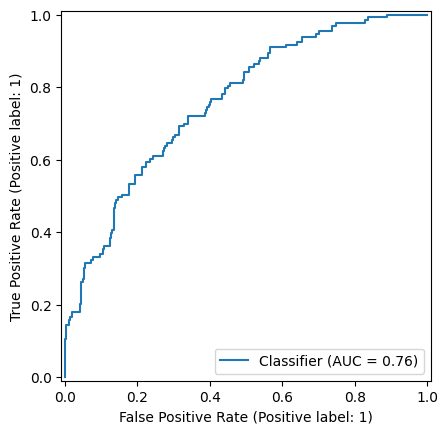

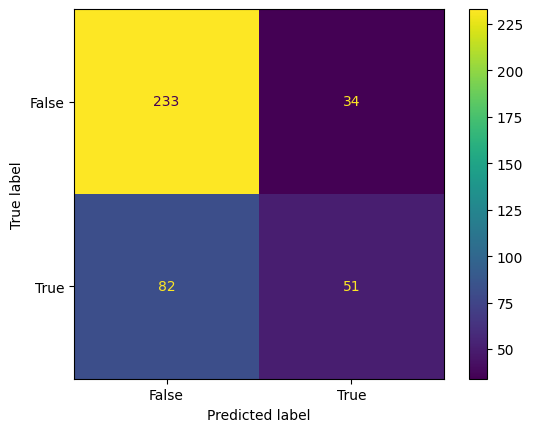

In [76]:
# Display RocCurve and Confusion Matrix
RocCurveDisplay.from_predictions(y_test, y_prob_bestop)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_optimized)
plt.show()

## **3.2. Logistic Regression RFE**

In [77]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Apply RFE
rfe = RFE(logreg, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

# Train the model on the scaled data with selected features
X_train_selected = X_train_scaled[:, rfe.support_]
logreg.fit(X_train_selected, y_train)

# Predict on the test set with selected features
X_test_selected = X_test_scaled[:, rfe.support_]
y_pred = logreg.predict(X_test_selected)

Selected Features: Index(['Burt-01-SOY', 'Burt-01-EOY', 'TextLevel-01-SOY', 'TextLevel-01-MOY',
       'TextLevel-01-EOY', 'TextLevel-02-SOY', 'TextLevel-02-MOY',
       'TextLevel-02-EOY', 'Counting-02', 'Multiplication and Division-01'],
      dtype='object')


In [78]:
# Join unseen y_test with predicted value into a data frame
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

# Join X_test with the new dataframe
inspection=pd.concat([X_test,inspection], axis=1)

inspection.head(20)

Burt-01-SOY  Burt-01-EOY  TextLevel-01-SOY  TextLevel-01-MOY  \
815             7           23                 4                10   
127            14           35                 8                17   
1484            3           14                 5                 9   
1560           22           33                14                14   
1653           11           36                 6                10   
494             9           30                 7                12   
1671            6           20                 0                 7   
540            24           30                15                17   
1161           29           58                17                18   
1592            7           21                 7                11   
103            15           26                 2                 8   
1187           32           47                21                27   
759            25           33                11                18   
71             20           33                13                15   
1101            8           21                 3                 6   
1507           14           40                 4                10   
781            30           45                17                21   
1122           37           57                18                19   
8              29           40                13                18   
260            10           27                 8                14   

      TextLevel-01-EOY  TextLevel-02-SOY  TextLevel-02-MOY  TextLevel-02-EOY  \
815                 21                16                23                25   
127                 22                25                23                 5   
1484                13                11                15                18   
1560                18                20                25                29   
1653                19                21                26                27   
494                 19                18                22                27   
1671                12                11                14                20   
540                 22                24                28                31   
1161                24                28                30                30   
1592                17                13                19                21   
103                 20                19                24                26   
1187                31                28                30                30   
759                 23                31                29                31   
71                  21                25                27                31   
1101                18                13                19                25   
1507                18                23                26                29   
781                 25                30                30                32   
1122                24                29                28                29   
8                   19                22                27                26   
260                 15                16                17                21   

      Counting-02  Multiplication and Division-01  Actual  Predicted  
815             4                               2   False       True  
127             2                               0   False       True  
1484            2                               0    True       True  
1560            2                               2   False      False  
1653            3                               1   False      False  
494             2                               1    True      False  
1671            1                               0    True       True  
540             3                               1   False      False  
1161            3                               0   False      False  
1592            3                               1    True       True  
103             2                               0   False       True  
11

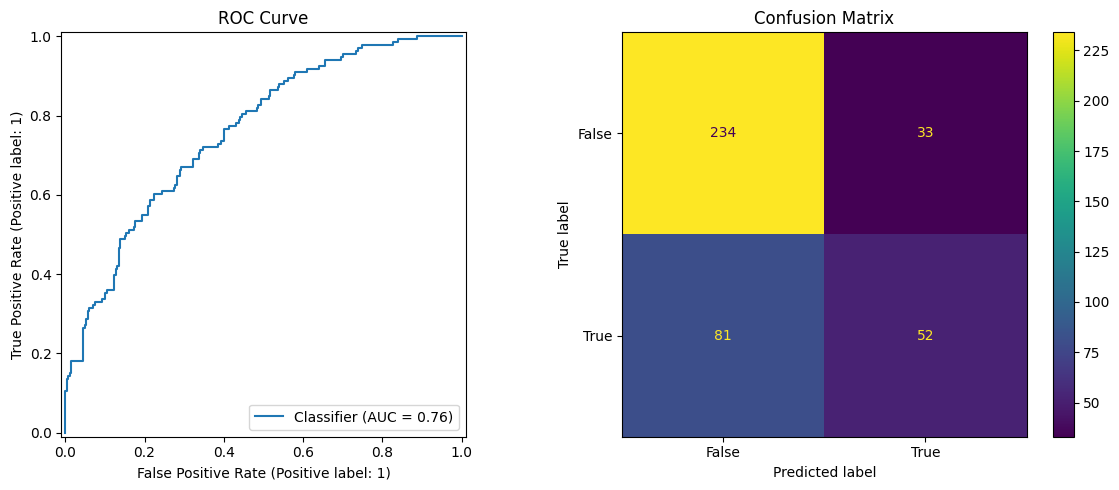

In [79]:
# First get the probabilities of the classes on the test set
probabilities = logreg.predict_proba(X_test_selected)  # Use selected features
# Now get the probabilities for the positive class
y_prob = probabilities[:, 1]

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Display the ROC Curve
RocCurveDisplay.from_predictions(y_test, y_prob, ax=ax[0])
ax[0].set_title('ROC Curve')

# Display the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax[1])
ax[1].set_title('Confusion Matrix')

plt.tight_layout()  # Adjust the layout
plt.grid(False)
plt.show()

In [80]:
print("Number of coefficients:", len(logreg.coef_[0]))
print("Number of features:", X.shape[1])

Number of coefficients: 10
Number of features: 10


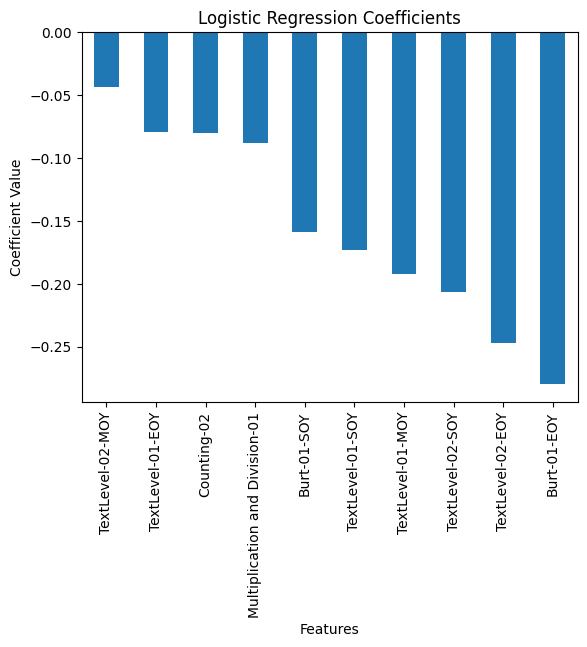

In [81]:
# Get the features selected by RFE
selected_features = X.columns[rfe.support_]

# Visualise the coefficients for the selected features
coefs = pd.Series(logreg.coef_[0], index=selected_features)
coefs.sort_values(ascending=False).plot(kind='bar')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

In [82]:
intercept = logreg.intercept_[0]  # Extract the scalar value from the array

# Print the model formula
intercept = logreg.intercept_[0]  # Extract the scalar value
coef = logreg.coef_.flatten()  # Flatten the coefficients array

print('Year_3_At_Risk = ', '%.3f' % intercept,
      '+', '%.3f' % coef[0], '* Burt-01-SOY',
      '+', '%.3f' % coef[1], '* Burt-01-EOY',
      '+', '%.3f' % coef[2], '* TextLevel-01-SOY',
      '+', '%.3f' % coef[3], '* TextLevel-01-MOY',
      '+', '%.3f' % coef[4], '* TextLevel-01-EOY',
      '+', '%.3f' % coef[5], '* TextLevel-02-SOY',
      '+', '%.3f' % coef[6], '* TextLevel-02-MOY',
      '+', '%.3f' % coef[7], '* TextLevel-02-EOY',
      '+', '%.3f' % coef[8], '* Counting-02',
      '+', '%.3f' % coef[9], '* Multiplication and Division-01'
)

Year_3_At_Risk =  -0.893 + -0.159 * Burt-01-SOY + -0.280 * Burt-01-EOY + -0.173 * TextLevel-01-SOY + -0.192 * TextLevel-01-MOY + -0.080 * TextLevel-01-EOY + -0.206 * TextLevel-02-SOY + -0.044 * TextLevel-02-MOY + -0.247 * TextLevel-02-EOY + -0.080 * Counting-02 + -0.088 * Multiplication and Division-01


## **3.3. KNN Classifier**

### a. Train a KNN Model and Make Predictions

In [83]:
# Select predictors
features_knn = ['Burt-01-SOY', 'Burt-01-EOY', 'TextLevel-01-SOY', 'TextLevel-01-MOY',
       'TextLevel-01-EOY', 'TextLevel-02-SOY', 'TextLevel-02-MOY',
       'TextLevel-02-EOY', 'Disability_Disability_Cognitive', 'Disability_Disability_Non-disable']

# Specify X and y
X = schools[features_knn]
y = schools.Year3_Writing_At_Risk_N

In [84]:
# Split dataset into training set and test set
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2024)  # 80% training and 20% testing


In [85]:
# Scale the features
scaler_knn = StandardScaler()
X_train_scaled_knn = scaler.fit_transform(X_train_knn)
X_test_scaled_knn = scaler.transform(X_test_knn)

In [86]:
# Initialise and train a KNN model
k = 10 # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k, p=2)

knn.fit(X_train_scaled_knn, y_train_knn)

# Make prediction on the testing set
y_pred_knn = knn.predict(X_test_scaled_knn)

inspection=pd.DataFrame({'Actual':y_test_knn, 'Predicted':y_pred_knn})
inspection=pd.concat([X_test_knn,inspection], axis=1)

inspection.sample(20)


Burt-01-SOY  Burt-01-EOY  TextLevel-01-SOY  TextLevel-01-MOY  \
1299           23           30                10                11   
1168           18           30                 8                12   
32             19           29                 8                17   
937             7           22                 5                12   
1059           15           33                 3                12   
495            43           55                22                29   
263            34           62                17                19   
1387           35           37                11                19   
1333           23           29                13                18   
84             28           45                21                21   
510            13           25                 4                 9   
459            20           27                 9                15   
1741           30           41                22                22   
1538           30           55                20                27   
1421           25           44                13                18   
231            16           30                 8                17   
1851            6           30                 1                12   
598            22           36                13                16   
855            25           30                 7                12   
97             40           70                26                29   

      TextLevel-01-EOY  TextLevel-02-SOY  TextLevel-02-MOY  TextLevel-02-EOY  \
1299                18                17                22                24   
1168                20                22                25                28   
32                  21                21                22                26   
937                 18                19                21                16   
1059                18                18                25                27   
495                 30                29                32                32   
263                 27                28                31                27   
1387                26                22                23                29   
1333                21                25                26                24   
84                  24                28                29                31   
510                 11                11                19                28   
459                 17                16                15                24   
1741                21                25                30                27   
1538                30                31                32                31   
1421                24                27                28                29   
231                 21                22                24                23   
1851                14                20                23                25   
598                 25                30                29                30   
855                 17                17                21                31   
97                  28                31                30                30   

      Disability_Disability_Cognitive  Disability_Disability_Non-disable  \
1299                                0                                  1   
1168                                0                                  1   
32                                  0                                  1   
937                                 1                                  0   
1059                                1                                  0   
495                                 0                                  1   
263                                 0                                  1   
1387                                0                                  1   
1333                                0                                  1   
84                                  0                                  0   
510               

### b. Model Performance

In [87]:
# Print the classification report
print(confusion_matrix(y_test_knn, y_pred_knn))
print(classification_report(y_test_knn, y_pred_knn))

[[234  33]
 [ 90  43]]
              precision    recall  f1-score   support

       False       0.72      0.88      0.79       267
        True       0.57      0.32      0.41       133

    accuracy                           0.69       400
   macro avg       0.64      0.60      0.60       400
weighted avg       0.67      0.69      0.67       400



In [88]:
#get predicted probabilities for the main class
y_pred_probs_knn = knn.predict_proba(X_test_scaled_knn)
y_pred_probs_knn = y_pred_probs_knn[:, 1]
print(y_pred_probs_knn)

[0.4 0.8 0.9 0.5 0.2 0.1 0.9 0.4 0.  1.  0.7 0.  0.  0.4 0.7 0.1 0.4 0.
 0.1 0.4 0.5 0.1 0.  0.2 0.2 0.  0.3 0.5 0.3 0.4 0.2 0.1 0.1 0.3 0.5 0.6
 0.5 0.2 0.5 0.4 0.1 0.1 0.5 0.3 0.6 0.5 0.4 0.3 0.5 0.3 0.1 0.6 0.1 0.5
 0.4 0.4 0.2 0.2 0.  0.5 0.1 0.1 0.6 0.2 0.5 0.  0.  0.4 0.6 0.  0.2 0.5
 0.2 0.1 0.4 0.4 0.  0.7 0.3 0.3 0.4 0.5 0.  0.7 0.2 0.  0.9 0.4 0.3 0.4
 0.  0.8 0.5 0.3 0.1 0.3 0.7 0.8 0.3 0.2 0.  0.6 0.5 0.6 0.5 0.  0.3 0.1
 0.2 0.  0.5 0.4 0.3 0.6 0.2 0.2 0.3 0.4 0.3 0.4 0.8 0.4 0.5 0.4 0.4 0.3
 0.7 0.2 0.1 0.4 0.3 0.  0.6 0.6 0.2 0.  0.3 0.1 0.3 0.4 0.1 0.7 0.2 0.9
 0.3 0.8 0.2 0.3 0.6 0.  0.  0.3 0.2 0.3 0.1 0.  0.3 0.  0.  0.4 0.3 0.1
 0.3 0.  0.5 0.9 0.7 0.  0.2 0.1 0.1 0.4 0.1 0.1 0.1 0.1 0.5 0.3 0.3 0.
 0.3 0.1 0.6 0.  0.  0.1 0.5 0.  0.3 0.  0.5 0.1 0.5 0.6 0.1 0.  0.9 0.4
 0.4 0.5 0.4 0.2 0.  0.4 0.2 0.2 0.  0.  0.6 0.7 0.4 0.6 0.5 0.6 0.  0.5
 0.  0.1 0.7 0.2 0.1 0.1 0.4 0.3 0.6 0.1 0.2 0.  0.5 0.  0.5 0.4 0.1 0.2
 0.  0.5 0.5 0.1 0.2 0.1 0.1 0.9 0.7 0.1 0.2 1.  0.3 

In [89]:
# Computer TN FP FN TP
tn, fp, fn, tp = confusion_matrix(y_test_knn, y_pred_knn).ravel()
# Compute FPT and TPR for this k
tpr_k = tp / (tp + fn)
fpr_k = fp / (fp + tn)

In [90]:
#fpr and tpr for all thresholders and plot the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_knn, y_pred_probs_knn)
print('AUC:', '%.3f' % metrics.auc(fpr, tpr))

AUC: 0.720


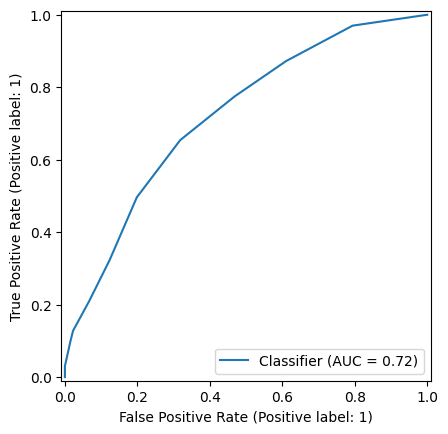

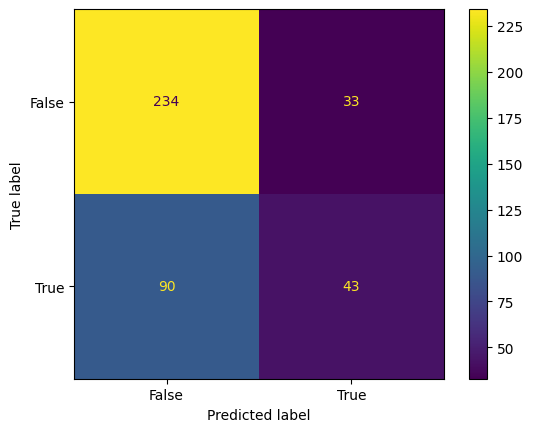

In [91]:
RocCurveDisplay.from_predictions(y_test_knn, y_pred_probs_knn)
ConfusionMatrixDisplay.from_predictions(y_test_knn, y_pred_knn)
plt.show()

In [92]:
inspection=pd.DataFrame({'Actual':y_test_knn, 'Predicted':y_pred_knn, 'Probability':y_pred_probs_knn})
inspection.head(10)

Actual  Predicted  Probability
815    False      False        0.400
127    False       True        0.800
1484    True       True        0.900
1560   False      False        0.500
1653   False      False        0.200
494     True      False        0.100
1671    True       True        0.900
540    False      False        0.400
1161   False      False        0.000
1592    True       True        1.000

### c. Optimising k

Best k value: 15
Best accuracy: 0.713
F1 score for best accuracy: 0.493


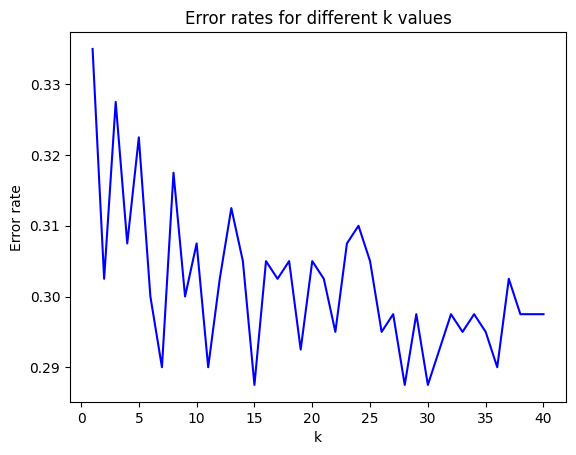

In [93]:
# Define a list of k values to test
k_values = list(range(1, 41))

# Train and evaluate KNN classifiers with different k values

best_k=0
best_accuracy=0
best_f1=0
accuracy_scores = []
accuracy = 0
error_rate=1-accuracy
error_rates=[]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled_knn, y_train_knn)
    y_pred_k=knn.predict(X_test_scaled_knn)
    accuracy = knn.score(X_test_scaled_knn, y_test_knn)
    accuracy_scores.append(accuracy)
    error_rates.append(1-accuracy)
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy
        best_f1 = metrics.f1_score(y_test_knn, y_pred_k)

# Find the best k value with highest accuracy score
#best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best k value: {best_k}")
print(f"Best accuracy: {best_accuracy:.3f}")
print(f"F1 score for best accuracy: {best_f1:.3f}")

# Plot k values against accuracy scores
#plt.plot(k_values, accuracy_scores, color='red')
plt.xlabel('k')
plt.ylabel('Error rate')
plt.title('Error rates for different k values')
plt.plot(k_values, error_rates, color='blue')
plt.show()

Best k value: 7
Best F1 score: 0.508
Accuracy for Best F1 score: 0.710


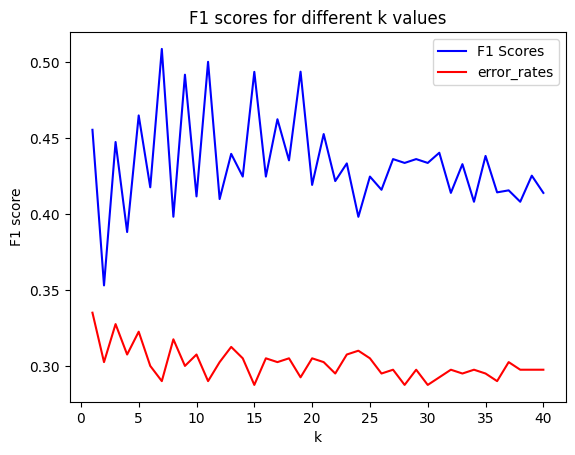

In [94]:
# Define a list of k values to test
k_values2 = list(range(1, 41))

# Train and evaluate KNN classifiers with different k values
best_k=0
best_f1=0
best_accuracy=0
f1_scores = []
f1 = 0
for k in k_values2:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled_knn, y_train_knn)
    y_pred_k=knn.predict(X_test_scaled_knn)
    f1 = metrics.f1_score(y_test_knn, y_pred_k)
    f1_scores.append(f1)
    accuracy_k=metrics.accuracy_score(y_test_knn, y_pred_k)
    if ((f1 > best_f1) ):
        best_k = k
        best_f1 = f1
        best_accuracy = metrics.accuracy_score(y_test_knn,y_pred_k)

# Find the best k value with highest f1 score
#best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best k value: {best_k}")
print(f"Best F1 score: {best_f1:.3f}")
print(f"Accuracy for Best F1 score: {best_accuracy:.3f}")

# Plot k values against accuracy scores
#plt.plot(k_values, accuracy_scores, color='red')
plt.xlabel('k')
plt.ylabel('F1 score')
plt.title('F1 scores for different k values')
plt.plot(k_values2, f1_scores, color='blue', label='F1 Scores')
plt.plot(k_values2, error_rates, color='red', label='error_rates')
plt.legend()
plt.show()

In [95]:
# Initialise and train a KNN model
k = 7 # Number of neighbors
knn_bestk_2 = KNeighborsClassifier(n_neighbors=k, p=2)

knn_bestk_2.fit(X_train_scaled_knn, y_train_knn)

# Make prediction on the testing set
y_pred_optimisedf1 = knn_bestk_2.predict(X_test_scaled_knn)

inspection=pd.DataFrame({'Actual':y_test_knn, 'Predicted':y_pred_optimisedf1})
inspection=pd.concat([X_test,inspection], axis=1)

inspection.sample(20)

Burt-01-SOY  Burt-01-EOY  TextLevel-01-SOY  TextLevel-01-MOY  \
374            13           30                 9                12   
1571           26           39                13                19   
1694            4           29                 9                 8   
8              29           40                13                18   
1507           14           40                 4                10   
1649           25           42                10                17   
1679            9           27                11                10   
1477            4           23                 1                12   
153            14           27                 0                 9   
832            10           40                 5                16   
1653           11           36                 6                10   
1098           33           49                21                19   
1600            4           30                 3                11   
1756           21           29                 8                16   
214            27           40                15                20   
878            21           28                 3                13   
1431           25           27                 9                11   
197            22           40                11                17   
506            20           31                 6                 7   
230            26          101                10                16   

      TextLevel-01-EOY  TextLevel-02-SOY  TextLevel-02-MOY  TextLevel-02-EOY  \
374                 20                18                21                20   
1571                28                29                28                30   
1694                16                18                19                23   
8                   19                22                27                26   
1507                18                23                26                29   
1649                22                25                25                31   
1679                18                20                20                27   
1477                12                16                10                25   
153                 17                15                17                18   
832                 27                25                25                30   
1653                19                21                26                27   
1098                28                31                30                31   
1600                21                22                21                23   
1756                22                19                25                30   
214                 30                29                30                32   
878                 18                14                23                25   
1431                17                16                18                26   
197                 25                25                24                25   
506                 24                18                23                28   
230                 26                27                30                30   

      Counting-02  Multiplication and Division-01  Actual  Predicted  
374             3                               2   False      False  
1571            3                               2   False      False  
1694            5                               2   False       True  
8               5                               2   False      False  
1507            2                               1   False      False  
1649            2                               0   False      False  
1679            2                               2   False      False  
1477            2                               0    True       True  
153             2                               2   False       True  
832             4                               2   False      False  
1653            3                               1   False      False  
10

In [96]:
print("Accuracy: ", '%.3f' % metrics.accuracy_score(y_test_knn,y_pred_optimisedf1))
print("Precision: ",'%.3f' % metrics.precision_score(y_test_knn,y_pred_optimisedf1))
print("Recall: ", '%.3f' % metrics.recall_score(y_test_knn,y_pred_optimisedf1))
print("F1: ", '%.3f' % metrics.f1_score(y_test_knn,y_pred_optimisedf1))

Accuracy:  0.710
Precision:  0.583
Recall:  0.451
F1:  0.508


In [97]:
#get predicted probabilities for the main class
y_pred_probs_normf1 = knn_bestk_2.predict_proba(X_test_scaled_knn)
y_pred_probs_normf1 = y_pred_probs_normf1[:, 1]
print(y_pred_probs_normf1)

[0.42857143 0.85714286 0.85714286 0.42857143 0.14285714 0.14285714
 0.85714286 0.28571429 0.         1.         0.57142857 0.
 0.         0.42857143 0.71428571 0.14285714 0.57142857 0.
 0.14285714 0.14285714 0.57142857 0.14285714 0.         0.14285714
 0.28571429 0.         0.28571429 0.57142857 0.42857143 0.28571429
 0.14285714 0.14285714 0.         0.42857143 0.57142857 0.71428571
 0.71428571 0.28571429 0.42857143 0.42857143 0.         0.14285714
 0.28571429 0.28571429 0.57142857 0.57142857 0.57142857 0.28571429
 0.42857143 0.28571429 0.14285714 0.57142857 0.14285714 0.42857143
 0.28571429 0.42857143 0.28571429 0.28571429 0.         0.42857143
 0.14285714 0.14285714 0.57142857 0.14285714 0.71428571 0.
 0.         0.42857143 0.42857143 0.         0.28571429 0.42857143
 0.         0.14285714 0.28571429 0.42857143 0.         0.85714286
 0.28571429 0.14285714 0.42857143 0.57142857 0.         0.85714286
 0.28571429 0.         0.85714286 0.42857143 0.28571429 0.42857143
 0.         0.85714

In [98]:
# Computer TN FP FN TP
tn, fp, fn, tp = confusion_matrix(y_test_knn, y_pred_optimisedf1).ravel()
# Compute FPT and TPR for this k
tpr_k = tp / (tp + fn)
fpr_k = fp / (fp + tn)

In [99]:
fpr, tpr, thresholds = roc_curve(y_test_knn, y_pred_probs_normf1)
print('AUC:', '%.3f' % metrics.auc(fpr, tpr))

AUC: 0.714


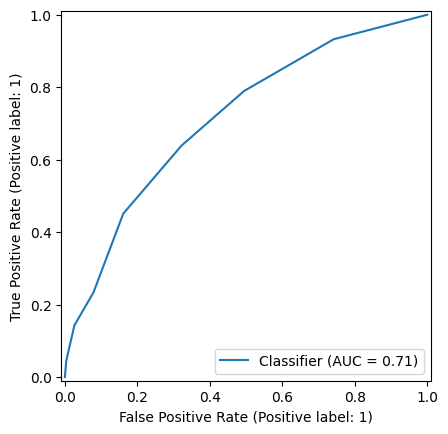

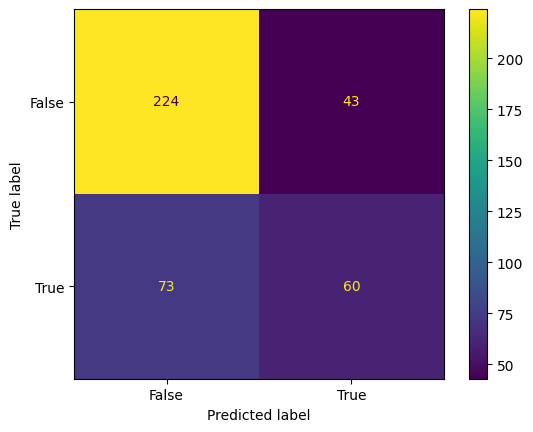

In [100]:
RocCurveDisplay.from_predictions(y_test_knn, y_pred_probs_normf1)
ConfusionMatrixDisplay.from_predictions(y_test_knn, y_pred_optimisedf1)
plt.show()

### d. Find the Best Threshold

Best Threshold based on F1 Score: 0.29
Performance Metrics at Best Threshold:
Accuracy: 0.600
Precision: 0.443
Recall: 0.789
F1 Score: 0.568


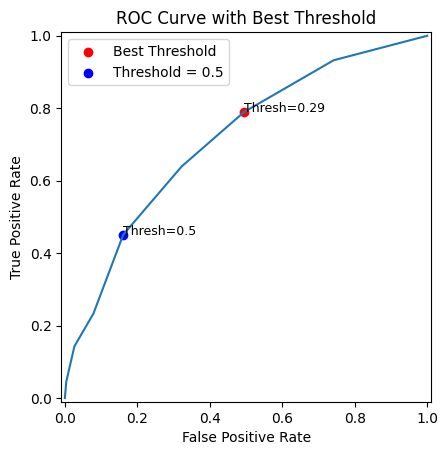

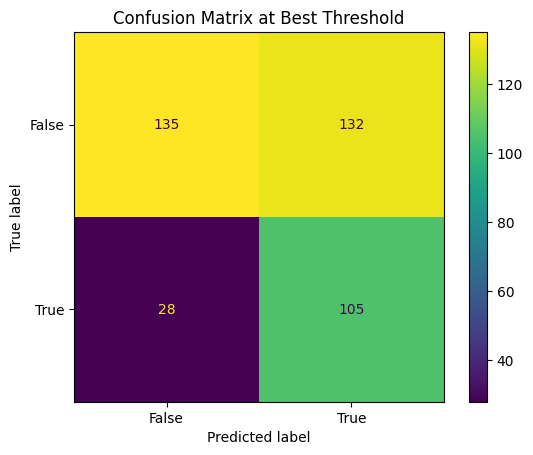

AUC: 0.714


In [101]:
# Get the predicted probabilities for the positive class (class 1)
y_pred_probs_normf1 = knn_bestk_2.predict_proba(X_test_scaled_knn)[:, 1]

# Compute FPR and TPR at various thresholds
fpr, tpr, thresholds = roc_curve(y_test_knn, y_pred_probs_normf1)

# Find the best threshold based on the F1 score
f1_scores = []
for threshold in thresholds:
    y_pred_t2 = [1 if prob >= threshold else 0 for prob in y_pred_probs_normf1]
    f1_scores.append(f1_score(y_test_knn, y_pred_t2))

# Best threshold with the highest F1 score
best_threshold = thresholds[f1_scores.index(max(f1_scores))]

# Print the best threshold
print(f"Best Threshold based on F1 Score: {best_threshold:.2f}")

# Make predictions with the best threshold
y_pred_best_threshold = [1 if prob >= best_threshold else 0 for prob in y_pred_probs_normf1]

# Evaluate performance metrics using the best threshold
accuracy = metrics.accuracy_score(y_test_knn, y_pred_best_threshold)
precision = metrics.precision_score(y_test_knn, y_pred_best_threshold)
recall = metrics.recall_score(y_test_knn, y_pred_best_threshold)
f1 = metrics.f1_score(y_test_knn, y_pred_best_threshold)

# Print the performance metrics
print("Performance Metrics at Best Threshold:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# Plot the ROC curve and visualize the best threshold

# Find indices for plotting the best threshold
threshold_0_5_idx = (abs(thresholds - 0.5)).argmin()  # Index for threshold 0.5
best_threshold_idx = (abs(thresholds - best_threshold)).argmin()  # Index for the best threshold

# Plot the ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Mark and label the best threshold
plt.scatter(fpr[best_threshold_idx], tpr[best_threshold_idx], color='red', label='Best Threshold')
plt.text(fpr[best_threshold_idx], tpr[best_threshold_idx], f'Thresh={best_threshold:.2f}', fontsize=9)

# Mark and label the threshold = 0.5
plt.scatter(fpr[threshold_0_5_idx], tpr[threshold_0_5_idx], color='blue', label='Threshold = 0.5')
plt.text(fpr[threshold_0_5_idx], tpr[threshold_0_5_idx], 'Thresh=0.5', fontsize=9)

# Add labels and legend to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve with Best Threshold')
plt.show()

# Confusion Matrix for best threshold
ConfusionMatrixDisplay.from_predictions(y_test_knn, y_pred_best_threshold)
plt.title('Confusion Matrix at Best Threshold')
plt.show()

# Print AUC
roc_auc = metrics.auc(fpr, tpr)
print(f"AUC: {roc_auc:.3f}")

### e. k-fold Validation

In [102]:
# Perform 10-fold cross-validation
accuracy= cross_val_score(knn_bestk_2, X, y, cv=10)
f1 = cross_val_score(knn_bestk_2, X, y, cv=10, scoring=('f1'))

# Print the mean accuracy scores and 95%CI of the scores
print("Accuracy scores: %0.3f (+/- %0.3f)" % (accuracy.mean(), get_95ci(accuracy)))
# Print the mean F1 scores and 95%CI of the scores
print("F1 scores: %0.3f (+/- %0.3f)" % (f1.mean(), get_95ci(f1)))

Accuracy scores: 0.701 (+/- 0.014)
F1 scores: 0.473 (+/- 0.030)


## **3.5. Clustering model**

### a. Building Model

In [103]:
# Define the feature set
features_to_scale = ['Burt-01-EOY', 'TextLevel-01-SOY', 'TextLevel-01-EOY',
                     'TextLevel-02-SOY', 'TextLevel-02-EOY']
disability_features = ['Disability_Disability_Cognitive', 'Disability_Disability_Non-disable']

# Step 1: Scale only the performance features using Min-Max scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(schools[features_to_scale])

# Step 2: Combine scaled performance features with the disability features
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)
disability_df = schools[disability_features].reset_index(drop=True)  # Keep disability features unchanged

# Step 3: Concatenate scaled and non-scaled features
X_scaled_combined = pd.concat([scaled_df, disability_df], axis=1)

# Display the first few rows of the scaled dataframe
print(X_scaled_combined.head())

   Burt-01-EOY  TextLevel-01-SOY  TextLevel-01-EOY  TextLevel-02-SOY  \
0        0.723             0.471             0.700             0.676   
1        0.287             0.235             0.433             0.500   
2        0.317             0.235             0.467             0.471   
3        0.485             0.324             0.700             0.735   
4        0.277             0.265             0.433             0.559   

   TextLevel-02-EOY  Disability_Disability_Cognitive  \
0             0.964                                0   
1             0.571                                0   
2             0.607                                0   
3             0.929                                0   
4             0.750                                0   

   Disability_Disability_Non-disable  
0                                  1  
1                                  1  
2                                  1  
3                                  1  
4                                  

In [104]:
# Fit K-means clustering model with a 'guessed' number of clusters
k=4
kmeans = KMeans(n_clusters=k, n_init=10,max_iter=300, random_state=2024)

#fit kmeans with X_scaled
kmeans.fit(X_scaled_combined)

# Add cluster labels to original dataset
schools['Cluster'] = kmeans.labels_

### b. Model Evaluation

In [105]:
# Evaluate the model using within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)

Within-Cluster Sum of Squares (WCSS): 136.473


In [106]:
# Compute the Davies-Bouldin index
dbs = davies_bouldin_score(X_scaled_combined, kmeans.labels_)
print("Davies Bouldin index:", '%.3f' % dbs)

Davies Bouldin index: 0.751


In [107]:
# Compute the Silhouette score for the clustering model
silhouette_avg = silhouette_score(X_scaled_combined, kmeans.labels_)

print('Silhouette score:', '%.3f' % silhouette_avg)

Silhouette score: 0.473


In [108]:
cluster_labels = kmeans.fit_predict(X_scaled_combined)

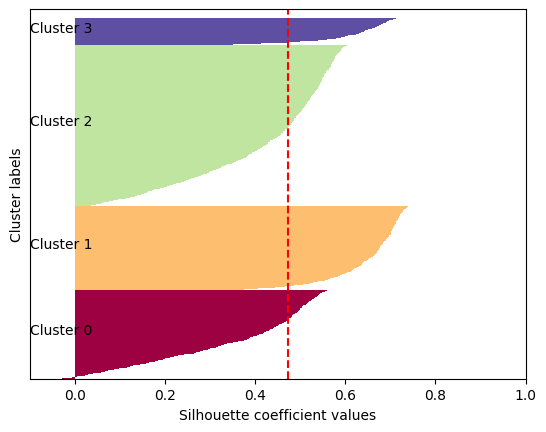

In [109]:
# Compute silhouette scores
silhouette_avg = silhouette_score(X_scaled_combined, cluster_labels)
sample_silhouette_values = silhouette_samples(X_scaled_combined, cluster_labels)

# Plot silhouette diagram
n_clusters = 4
fig, ax = plt.subplots()
y_lower, y_upper = 0, 0

# Define the colormap, options include: autumn, Spectral, viridis, plasma, cool, jet
cmap = cm.Spectral

# Create a list of evenly spaced values in the range [0, 1]
values = np.linspace(0, 1, n_clusters)

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper += size_cluster_i
    color = cmap(values[i])
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1.0,
            edgecolor='none', color=color)
    ax.text(-0.1, (y_lower + y_upper) / 2, 'Cluster ' + str(i), color='black', fontsize=10)
    y_lower += size_cluster_i

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster labels")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X_scaled_combined) + (n_clusters + 1) * 10])

plt.show()


### c. Optimising k

### **Use the elbow method based on the SSE (WCSS) score**

Best k1 (SSE): 40
Best SSE score: 35.151


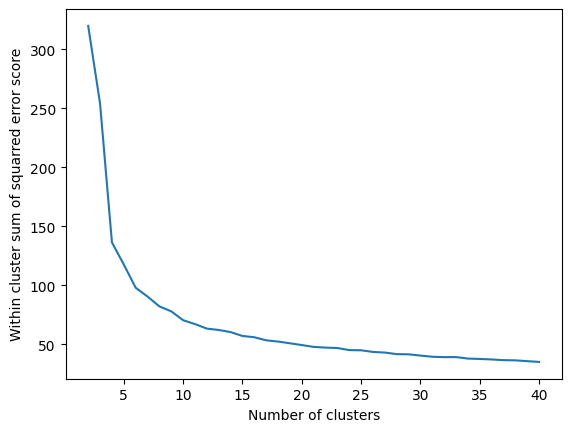

In [110]:
# Initialize list to hold SSE scores
sse_scores = []

# Determine optimal number of clusters using the SSE metric
best_k1, best_sse_score = None, float('inf')
for k in range(2, 41):
    kmeans = KMeans(n_clusters=k, n_init=2)
    kmeans.fit(X_scaled_combined)
    sse_score_i = kmeans.inertia_
    sse_scores.append(sse_score_i)
    if sse_score_i < best_sse_score:
        best_k1, best_sse_score = k, sse_score_i

print('Best k1 (SSE):', best_k1)
print('Best SSE score:', '%.3f' % best_sse_score)

# Plot the silhouette scores to determine optimal number of clusters
plt.plot(range(2,41), sse_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Within cluster sum of squarred error score")
plt.show()

###**Optimise the number of clusters based on davies_bouldin_score**

In [111]:
# Determine optimal number of clusters using the Davies-Bouldin index
dbs_scores = []
best_k2, best_dbs_score = None, float('inf')
for k in range(2, 41):
    kmeans = KMeans(n_clusters=k, n_init='auto', max_iter=300, random_state=2024)
    kmeans.fit(X_scaled_combined)
    dbs_score_k = davies_bouldin_score(X_scaled_combined, kmeans.labels_)
    dbs_scores.append(dbs_score_k)
    if dbs_score_k < best_dbs_score:  # Lower is better
        best_k2, best_dbs_score = k, dbs_score_k

print('Best k2 (Davies-Bouldin):', best_k2)
print('Best Davies-Bouldin index:', '%.3f' % best_dbs_score)

Best k2 (Davies-Bouldin): 3
Best Davies-Bouldin index: 0.563


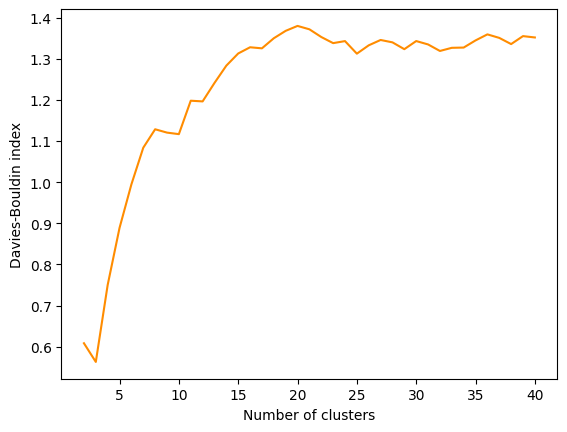

In [112]:
# Plot the Davies-Bouldin indices to determine optimal number of clusters
plt.plot(range(2,41), dbs_scores, color='darkorange', label='Davies Bouldin index')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin index')
plt.show()

### **Optimise the number of clusters based on the silhouette score**

In [113]:
# Determine optimal number of clusters using the silhouette score
sil_scores = []
best_k3, best_sil_score = None, -1
for k in range(2, 41):
    kmeans = KMeans(n_clusters=k, n_init=2)
    kmeans.fit(X_scaled_combined)
    sil_score_i = silhouette_score(X_scaled_combined, kmeans.labels_)
    sil_scores.append(sil_score_i)
    if sil_score_i > best_sil_score:  # Higher is better
        best_k3, best_sil_score = k, sil_score_i

print('Best k3 (Silhouette):', best_k3)
print('Best silhouette score:', '%.3f' % best_sil_score)

Best k3 (Silhouette): 2
Best silhouette score: 0.652


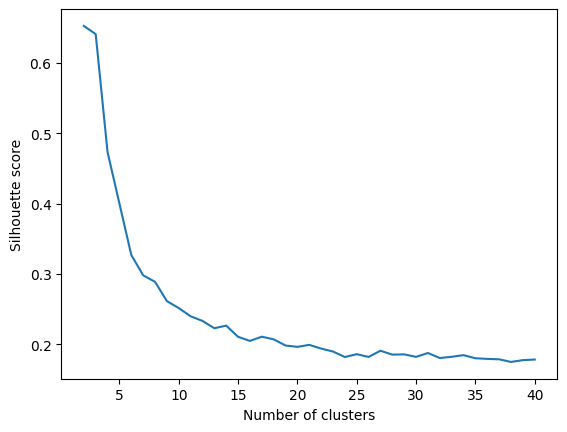

In [114]:
# Plot the silhouette scores to determine optimal number of clusters
plt.plot(range(2,41), sil_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

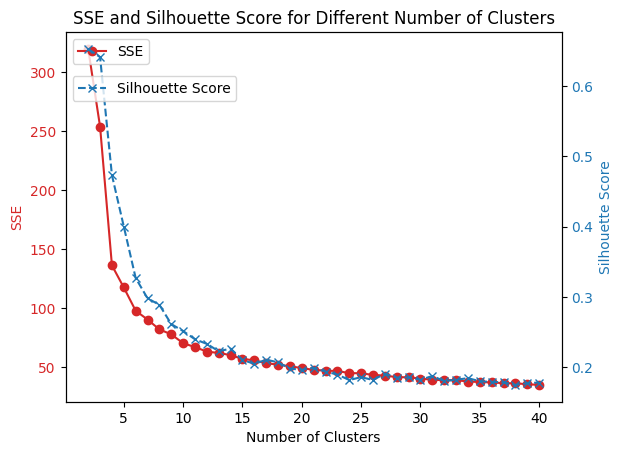

In [115]:
# Create a figure and a set of subplots (two y-axes)
fig, ax1 = plt.subplots()

cluster_range = range(2, 41)

# Plot SSE
color = 'tab:red'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('SSE', color=color)
ax1.plot(cluster_range, sse_scores, marker='o', label='SSE', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create the second y-axis to plot Silhouette Score
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(cluster_range, sil_scores, marker='x', linestyle='--', label='Silhouette Score', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show legend
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0.0, 0.9))

# Show plot
plt.title("SSE and Silhouette Score for Different Number of Clusters")
plt.show()

###**d. Model Selection**

In [116]:
# Initialize the KMeans model object
kmeans = KMeans(n_clusters=3, n_init=10, random_state=2024)  # Set n_init to 10

# Fit K-means clustering model with the selected number of clusters
kmeans.fit(X_scaled_combined)

KMeans(n_clusters=3, n_init=10, random_state=2024)

In [117]:
# Add cluster labels to original dataset
schools['Cluster'] = kmeans.labels_

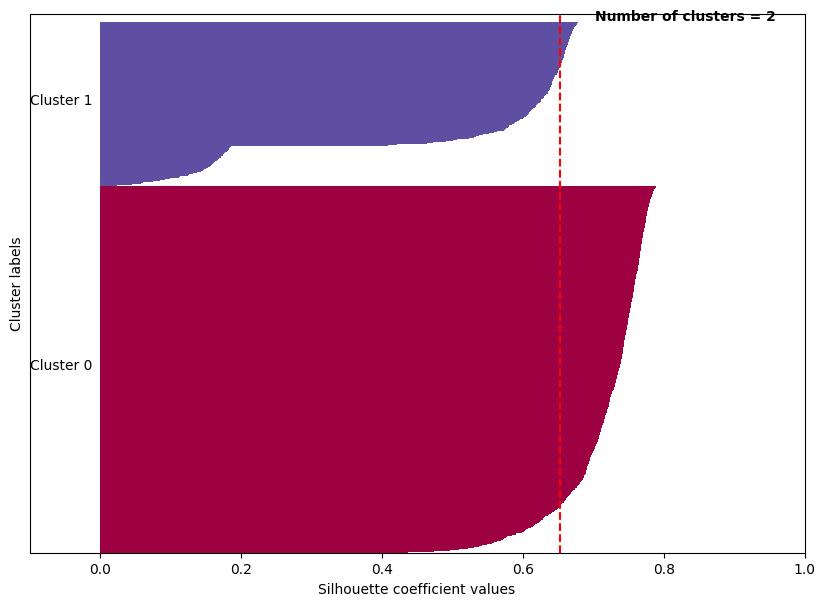

Within-Cluster Sum of Squares (WCSS): 319.968
Davies Bouldin index: 0.608
Silhouette score: 0.652


In [118]:
# Number of clusters for visualization
n_clusters = 2

# Initialize the KMeans model object
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=2024)  # Set n_init to 10

# Fit K-means clustering model with the selected number of clusters
kmeans.fit(X_scaled_combined)

# Add cluster labels to original dataset
schools['Cluster'] = kmeans.labels_

# Evaluate the model using within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_

# Compute sample silhouette scores
cluster_labels = kmeans.labels_
silhouette_avg = silhouette_score(X_scaled_combined, cluster_labels)
sample_silhouette_values = silhouette_samples(X_scaled_combined, cluster_labels)

# Create a color map
cmap = plt.get_cmap("Spectral")

# Create a list of evenly spaced values in the range [0, 1] for the color map
values = np.linspace(0, 1, n_clusters)

# Plot silhouette diagram
fig, ax = plt.subplots(figsize=(10, 7))  # Adjusted figure size for clarity
y_lower = 0
for i in range(n_clusters):
    # Aggregate silhouette scores for samples in each cluster
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cmap(values[i])  # Assign color to cluster
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1.0,
            edgecolor='none', color=color)
    ax.text(-0.1, (y_lower + y_upper) / 2, 'Cluster ' + str(i), color='black', fontsize=10)
    y_lower = y_upper

# Draw a vertical line for the average silhouette score
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

# Set axis labels and limits
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster labels")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])  # Silhouette score ranges from -1 to +1
ax.set_ylim([0, len(X_scaled_combined) + (n_clusters + 1) * 10])

# Add annotation for the number of clusters
ax.text(silhouette_avg + 0.05, len(X_scaled_combined) + 5, "Number of clusters = %d" % n_clusters,
        fontsize=10, fontweight='bold')

# Display the plot
plt.show()

# Print Within-Cluster Sum of Squares (WCSS)
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)

# Compute the Davies-Bouldin index
dbs = davies_bouldin_score(X_scaled_combined, kmeans.labels_)
print("Davies Bouldin index:", '%.3f' % dbs)

# Compute the Silhouette score for the clustering model
print('Silhouette score:', '%.3f' % silhouette_avg)


###**e. Post-analysis for Cluster profiling**

In [119]:
schools[['Burt-01-EOY', 'TextLevel-01-SOY', 'TextLevel-01-EOY',
                     'TextLevel-02-SOY', 'TextLevel-02-EOY',
                     'Disability_Disability_Cognitive',
                     'Disability_Disability_Non-disable','Cluster']]

Burt-01-EOY  TextLevel-01-SOY  TextLevel-01-EOY  TextLevel-02-SOY  \
0              73                16                25                25   
1              29                 8                17                19   
2              32                 8                18                18   
3              49                11                25                27   
4              28                 9                17                21   
...           ...               ...               ...               ...   
1995           31                11                21                21   
1996           67                25                29                34   
1997           55                12                27                30   
1998           35                12                26                22   
1999           25                 5                18                16   

      TextLevel-02-EOY  Disability_Disability_Cognitive  \
0                   32                                0   
1                   21                                0   
2                   22                                0   
3                   31                                0   
4                   26                                0   
...                ...                              ...   
1995                27                                1   
1996                31                                0   
1997                30                                0   
1998                31                                0   
1999                20                                1   

      Disability_Disability_Non-disable  Cluster  
0                                     1        0  
1                                     1        0  
2                                     1        0  
3                                     1        0  
4                                     1        0  
...                                 ...      ...  
1995                                  0        1  
1996                                  1        0  
1997                                  1        0  
1998                                  1        0  
1999                                  0        1  

[2000 rows x 8 columns]

In [120]:
cluster_count=schools.Cluster.value_counts()
cluster_count

Cluster
0    1381
1     619
Name: count, dtype: int64

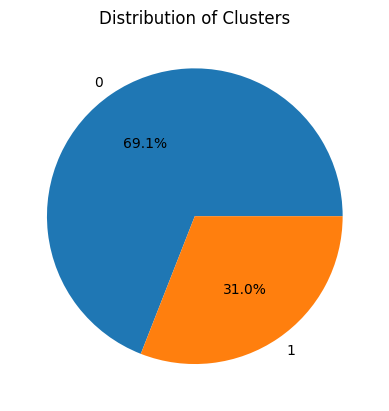

In [121]:
# Sort the index to ensure the clusters are in order
sorted_cluster_count = cluster_count.sort_index()

colours = sns.color_palette("tab10", n_colors=len(cluster_count))

plt.pie(cluster_count, labels=sorted_cluster_count.index, autopct='%1.1f%%', colors= colours)
plt.title('Distribution of Clusters')
plt.show()

In [122]:
# Get centroids of the clusters
centroids = kmeans.cluster_centers_

# Display the centroids
for idx, centroid in enumerate(centroids):
    print(f"Cluster {idx} centroid values:")
    for feature, value in zip(features_to_scale + disability_features, centroid):
        print(f"  {feature}: {value:.2f}")
    print("\n")

# To identify importance, you can look at the difference between centroids
# Use the combined feature list instead of just 'features'
combined_features = features_to_scale + disability_features

for idx, feature in enumerate(combined_features):
    if idx < centroids.shape[1]:  # Ensure the index is within bounds
        feature_range = max(centroid[idx] for centroid in centroids) - min(centroid[idx] for centroid in centroids)
        print(f"Range for {feature}: {feature_range:.2f}")

Cluster 0 centroid values:
  Burt-01-EOY: 0.38
  TextLevel-01-SOY: 0.35
  TextLevel-01-EOY: 0.60
  TextLevel-02-SOY: 0.61
  TextLevel-02-EOY: 0.81
  Disability_Disability_Cognitive: -0.00
  Disability_Disability_Non-disable: 1.00


Cluster 1 centroid values:
  Burt-01-EOY: 0.32
  TextLevel-01-SOY: 0.24
  TextLevel-01-EOY: 0.51
  TextLevel-02-SOY: 0.51
  TextLevel-02-EOY: 0.73
  Disability_Disability_Cognitive: 0.76
  Disability_Disability_Non-disable: 0.00


Range for Burt-01-EOY: 0.06
Range for TextLevel-01-SOY: 0.10
Range for TextLevel-01-EOY: 0.09
Range for TextLevel-02-SOY: 0.10
Range for TextLevel-02-EOY: 0.08
Range for Disability_Disability_Cognitive: 0.76
Range for Disability_Disability_Non-disable: 1.00


Burt-01-EOY:

           count   mean    std   min    25%    50%    75%     max
Cluster                                                          
0       1381.000 38.540 12.432 0.000 30.000 35.000 44.000 101.000
1        619.000 32.187 10.638 2.000 26.000 30.000 37.000  83.000




/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tu

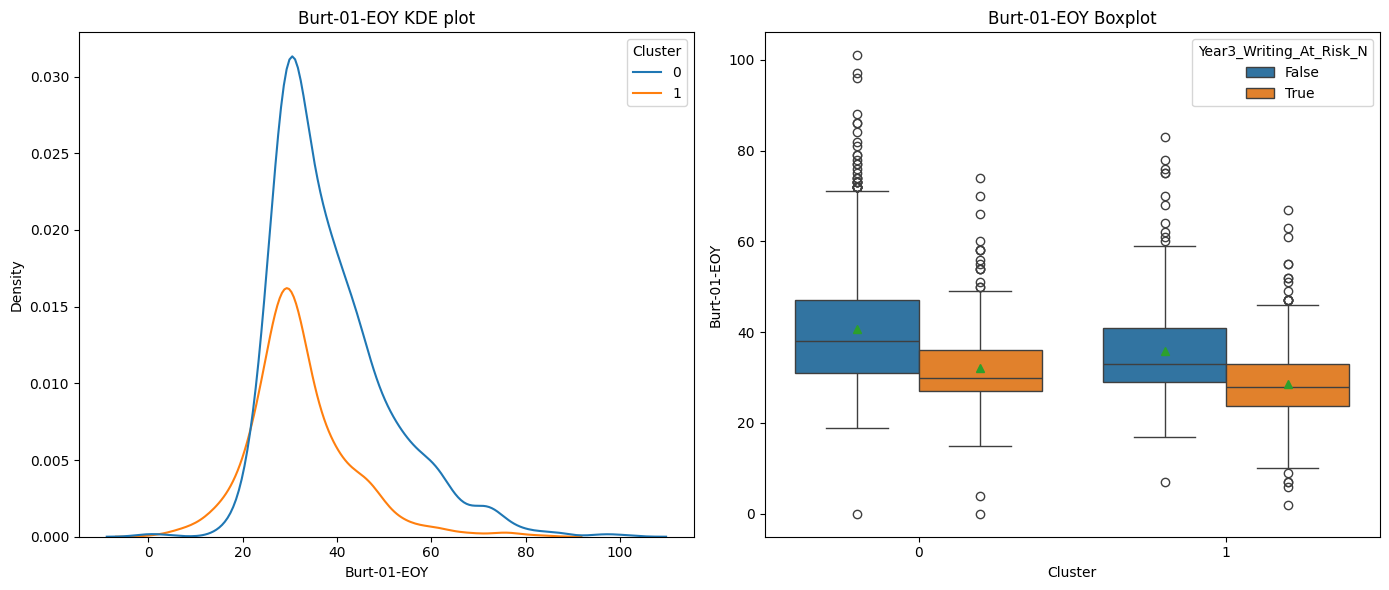

TextLevel-02-EOY:

           count   mean   std   min    25%    50%    75%    max
Cluster                                                        
0       1381.000 27.734 3.101 5.000 26.000 28.000 30.000 33.000
1        619.000 25.357 4.525 6.000 23.000 26.000 29.000 32.000




/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tu

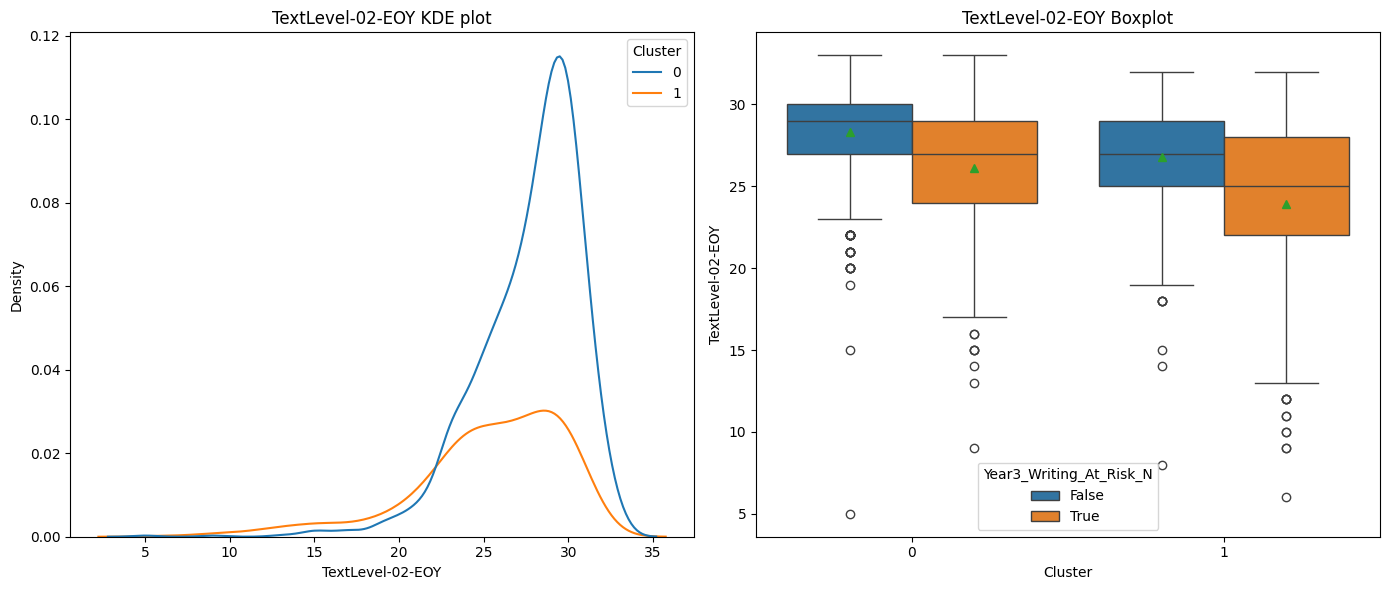

In [123]:
# List of numerical features to analyze
nums = ['Burt-01-EOY', 'TextLevel-02-EOY']

# Loop through each feature
for i in nums:
    print(f"{i}:\n")
    print(schools.groupby(('Cluster'))[i].describe())  # Pass as a tuple

    print('\n')

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot KDE on the first subplot
    sns.kdeplot(data=schools, x=i, hue='Cluster', palette='tab10', ax=axes[0])
    axes[0].set_title(f'{i} KDE plot')

    # Plot Boxplot on the second subplot
    sns.boxplot(data=schools, x='Cluster', y=i, hue='Year3_Writing_At_Risk_N', showmeans=True, ax=axes[1])
    axes[1].set_title(f'{i} Boxplot')

    plt.tight_layout()  # Adjust layout so plots do not overlap
    plt.show()

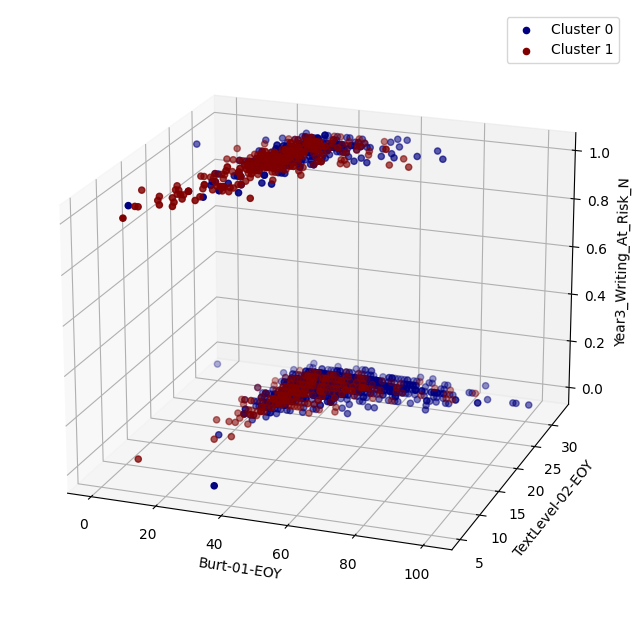

In [124]:
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure
fig = plt.figure(figsize=(12, 8))

# Add 3D subplot
# The '111' means 1x1 grid, first subplot, similar to MATLAB-style
ax = fig.add_subplot(111, projection='3d')

# Unique cluster labels
unique_clusters = schools['Cluster'].unique()

# Color map
colors = plt.cm.jet(np.linspace(0, 1, len(unique_clusters)))

# Adjusting the viewing angle for better visibility
ax.view_init(elev=20, azim=-70)  # Modify these values as needed

# Scatter plot for each cluster
for i, cluster in enumerate(unique_clusters):
    cluster_data = schools[schools['Cluster'] == cluster]
    ax.scatter(cluster_data['Burt-01-EOY'], cluster_data['TextLevel-02-EOY'], cluster_data['Year3_Writing_At_Risk_N'],
               label=f'Cluster {cluster}', c=[colors[i]])

# Legend and labels
ax.set_xlabel('Burt-01-EOY')
ax.set_ylabel('TextLevel-02-EOY')
ax.set_zlabel('Year3_Writing_At_Risk_N')
ax.legend()

# Show the plot
plt.show()

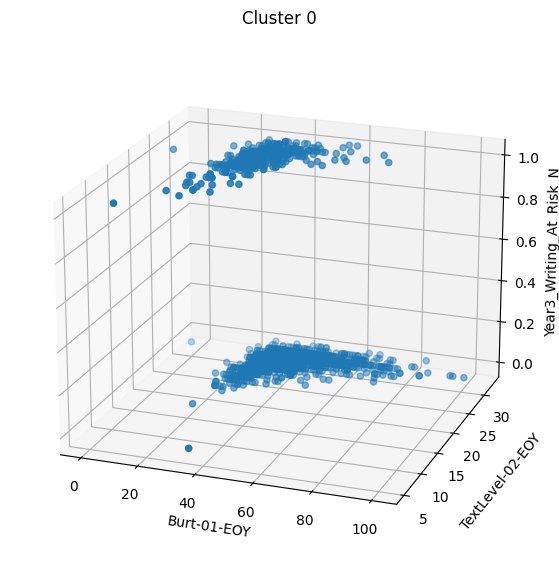

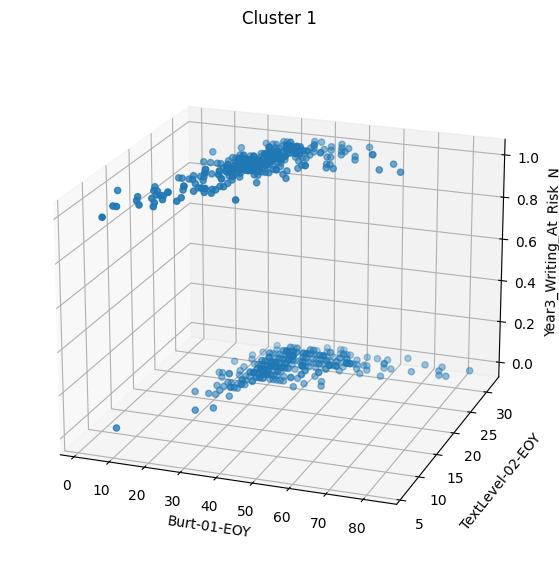

In [125]:
unique_clusters = schools['Cluster'].unique()

# Iterate over each unique cluster to create a 3D plot
for cluster in unique_clusters:
    fig = plt.figure(figsize=(12, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Filter data to include only the current cluster
    cluster_data = schools[schools['Cluster'] == cluster]

    # Create 3D scatter plot
    ax.scatter(cluster_data['Burt-01-EOY'], cluster_data['TextLevel-02-EOY'], cluster_data['Year3_Writing_At_Risk_N'])

    # Adjusting the viewing angle for better visibility
    ax.view_init(elev=20, azim=-70)  # Modify these values as needed

    # Adding title and labels
    ax.set_title(f'Cluster {cluster}')
    ax.set_xlabel('Burt-01-EOY')
    ax.set_ylabel('TextLevel-02-EOY', labelpad=10)
    ax.set_zlabel('Year3_Writing_At_Risk_N')

    plt.show()